In [1]:
import psycopg2
import codecs
import os
import csv
import pandas as pd
import numpy as np
import requests
import datetime

from datetime import datetime, timezone

from random import shuffle

In [2]:
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

matplotlib.rcParams['text.usetex']=False
matplotlib.rcParams['figure.dpi']= 150
# matplotlib.rcParams['text.latex.unicode']=True

matplotlib.rcParams['figure.autolayout'] = True

sb.set_style('ticks', {'xtick.bottom': True, "ytick.left": True, 'grid.color': '0.9'})

sb.set_context(
	"talk",
	font_scale=1,
	rc={
		"lines.linewidth": 2,
		"text.usetex": False,
		"font.family": 'Lato',
		"font.sans-serif": ['Palatino'],
		"font.weight": 'bold',
		"font.size": 16,
		"xtick.major.size": 6,
		"xtick.major.width": 2,
		"ytick.left": True
	})


In [3]:
import os
os.environ.setdefault('DJANGO_SETTINGS_MODULE','overcoming_thinking_traps.settings')
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

import django
django.setup()

from study.models import UserDetails, \
						Redcap_Last_Sync, \
						Redcap_Welcome_Landing_Page, \
						Redcap_Admin, \
						Redcap_Events_Log, \
						Redcap_Consent, \
						Redcap_Psychoed, \
						Redcap_Entry_Survey, \
						Redcap_PHQ9, \
						Redcap_GAD7, \
						Redcap_CR_Use, \
						Redcap_Hope, \
						Redcap_EM, \
						Redcap_CCTS, \
						Redcap_Exit, \
						Redcap_MiscQ, \
						Redcap_Post_Diy, \
						Redcap_Tool_Use, \
						Redcap_Week_No, \
						Redcap_Payments

from users.models import CustomUser
from study.assign_user_tasks import assign_tasks


In [4]:
redcap_consent = Redcap_Consent.objects.all()

redcap_consent_df = pd.DataFrame(list(redcap_consent.values()), columns=['created_at', 'updated_at', 'study_id', 'n8m95', 'redcap_event_name', 'consent_yn', 'consent_complete'])

consented_study_ids = redcap_consent_df[redcap_consent_df['consent_complete'] == '2']['study_id'].unique()

In [5]:
## get redcap data
RECAP_API_TOKEN = os.environ.get('RECAP_API_TOKEN')

fields = {
	'token': RECAP_API_TOKEN,
	'content': 'record',
	'format': 'json',
	'type': 'flat'
}


r = requests.post('https://redcap.iths.org/api/',data=fields)
records = eval(r.text)

In [6]:
STUDY_IDs = {}
TOOL_1 = {}

TOOL_WENT_WELL = {}
TOOL_DIDNT_WELL = {}
TOOL_OTHER_COMMENTS = {}

GENDER = {}

RACE = {}

PHQ_START = {}
PHQ_WEEK_1 = {}
PHQ_WEEK_2 = {}
PHQ_WEEK_3 = {}
PHQ_WEEK_4 = {}

for record in records:
	# get col values
	study_id = record['study_id']
	redcap_event_name = record['redcap_event_name']
	n8m95 = record['n8m95']
	# welcome_landing_page_complete = record['welcome_landing_page_complete']
	# trigger_consent = '' # record['trigger_consent']
	condition = record['usage']
	date_consent = record['date_consent']
	# start_date = record['start_date']
	# stop_1 = record['stop___1']
	# test = record['test']
	# admin_complete = record['admin_complete']
	# comms_log = record['comms_log']
	# withdraw = record['withdraw']
	# date_withdraw = record['date_withdraw']
	# notes_withdraw = record['notes_withdraw']
	# events_log_complete = record['events_log_complete']
	consent_yn = record['consent_yn']
	consent_complete = record['consent_complete']
	# psychoed_complete = '' # record['psychoed_complete']
	age = record['age']
	# us_res = record['us_res']
	# first_name = record['first_name']
	# last_name = record['last_name']
	email = record['email']
	# contact_pref = record['contact_pref']
	# phone = record['phone']
	# entry_survey_complete = record['entry_survey_complete']
	# phq_1 = record['phq_1']
	# phq_2 = record['phq_2']
	# phq_3 = record['phq_3']
	# phq_4 = record['phq_4']
	# phq_5 = record['phq_5']
	# phq_6 = record['phq_6']
	# phq_7 = record['phq_7']
	# phq_8 = record['phq_8']
	# phq_9 = record['phq_9']
	# phq_calc_1 = record['phq_calc_1']
	# phq_calc_2 = record['phq_calc_2']
	# phq_calc_3 = record['phq_calc_3']
	# phq_calc_4 = record['phq_calc_4']
	# phq_calc_5 = record['phq_calc_5']
	# phq_calc_6 = record['phq_calc_6']
	# phq_calc_7 = record['phq_calc_7']
	# phq_calc_8 = record['phq_calc_8']
	# phq_calc_9 = record['phq_calc_9']
	# phq_answered = record['phq_answered']
	phq_total = record['phq_total']
	# phq_difficult = record['phq_difficult']
	phq9_complete = record['phq9_complete']
	# gad7_q1 = record['gad7_q1']
	# gad7_q2 = record['gad7_q2']
	# gad7_q3 = record['gad7_q3']
	# gad7_q4 = record['gad7_q4']
	# gad7_q5 = record['gad7_q5']
	# gad7_q6 = record['gad7_q6']
	# gad7_q7 = record['gad7_q7']
	gad7_total = record['gad7_total']
	# gad7_q8 = record['gad7_q8']
	gad7_complete = record['gad7_complete']
	cr_use_q = record['cr_use_q']
	# cr_use_complete = record['cr_use_complete']
	hope_q = record['hope_q']
	hope_complete = record['hope_complete']
	# week_1_arm_1
	# phq9_complete
	# gad7_complete
	# hope_complete
	# em_complete
	# ccts_complete
	# em_1 = record['em_1']
	# em_2 = record['em_2']
	# em_3 = record['em_3']
	# em_4 = record['em_4']
	# em_5 = record['em_5']
	# em_6 = record['em_6']
	# em_complete = record['em_complete']
	ccts_20 = record['ccts_20']
	ccts_28 = record['ccts_28']
	ccts_21 = record['ccts_21']
	ccts_06 = record['ccts_06']
	ccts_24 = record['ccts_24']
	ccts_11 = record['ccts_11']
	ccts_elab = record['ccts_elab']
	ccts_wellbeing = record['ccts_wellbeing']
	ccts_other = record['ccts_other']
	ccts_complete = record['ccts_complete']
	# impact_diy = record['impact_diy']
	# use_diy = record['use_diy']
	# impact_y_diy = record['impact_y_diy']
	# impact_n_diy = record['impact_n_diy']
	# apply_diy = record['apply_diy']
	# apply_y_diy = record['apply_y_diy']
	# benefit_diy = record['benefit_diy']
	# benefit_y_diy = record['benefit_y_diy']
	# takeaways_diy = record['takeaways_diy']
	# future_diy = record['future_diy']
	# change_diy = record['change_diy']
	# like_diy = record['like_diy']
	# dislike_diy = record['dislike_diy']
	# exit_complete = record['exit_complete']
	# ther_yn = record['ther_yn']
	# mhmeds_yn = record['mhmeds_yn']
	# therapy_post_diy = record['therapy_post_diy']
	therapy = record['therapy_post_diy']
	talk = record['talk']
	seekmh = record['seekmh']
	# practice_cr = record['practice_cr']
	# excite_mhskill = record['excite_mhskill']
	# life_impact = record['life_impact']
	miscq_complete = record['miscq_complete']
	# post_1 = record['post_1']
	# post_2 = record['post_2']
	# post_3 = record['post_3']
	# post_4 = record['post_4']
	# post_5 = record['post_5']
	# post_6 = record['post_6']
	# post_7 = record['post_7']
	# post_diy_complete = record['post_diy_complete']
	# tool_1 = record['tool_1']
	# tool_2 = record['tool_2']
	# tool_3 = record['tool_3']
	# tool_4 = record['tool_4']
	# tool_5 = record['tool_5']
	# tool_use_complete = record['tool_use_complete']

	gender_0 = record["gender___0"]
	gender_1 = record["gender___1"]
	gender_2 = record["gender___2"]
	gender_3 = record["gender___3"]
	gender_4 = record["gender___4"]
	gender_5 = record["gender___5"]
	gender_6 = record["gender___6"]
	gender_7 = record["gender___7"]
	gender_8 = record["gender___8"]
	gender_9 = record["gender___9"]

	race_1 = record["race1___1"]
	race_2 = record["race1___2"]
	race_3 = record["race1___3"]
	race_4 = record["race1___4"]
	race_5 = record["race1___5"]
	race_6 = record["race1___6"]
	race_7 = record["race1___7"]
	race_8 = record["race1___8"]


	if study_id != '' and int(study_id) < 70:
		continue
	
	

	if study_id in consented_study_ids and redcap_event_name == 'baseline_arm_1' and email != '' and condition != '':
		study_id = int(study_id)
		if study_id not in STUDY_IDs:
			STUDY_IDs[study_id] = {}
		STUDY_IDs[study_id]['email'] = email
		STUDY_IDs[study_id]['condition'] = condition
		STUDY_IDs[study_id]['date_consent'] = date_consent
		STUDY_IDs[study_id]['consent_yn'] = consent_yn
		STUDY_IDs[study_id]['consent_complete'] = consent_complete
		try:
			STUDY_IDs[study_id]['age'] = int(age)
		except:
			STUDY_IDs[study_id]['age'] = None
		
		try:
			STUDY_IDs[study_id]['phq_total'] = int(phq_total)
		except:
			STUDY_IDs[study_id]['phq_total'] = None

		STUDY_IDs[study_id]['phq9_complete'] = phq9_complete

		try:
			STUDY_IDs[study_id]['gad7_total'] = int(gad7_total)
		except:
			STUDY_IDs[study_id]['gad7_total'] = None

		STUDY_IDs[study_id]['gad7_complete'] = gad7_complete

		try:
			STUDY_IDs[study_id]['hope_q'] = int(hope_q)
		except:
			STUDY_IDs[study_id]['hope_q'] = None

		
		STUDY_IDs[study_id]['hope_complete'] = hope_complete

		try:
			STUDY_IDs[study_id]['cr_use_q'] = int(cr_use_q)
		except:
			STUDY_IDs[study_id]['cr_use_q'] = None


		# try:
		# 	STUDY_IDs[study_id]['ccts_20'] = int(ccts_20)
		# except:
		# 	STUDY_IDs[study_id]['ccts_20'] = -1

		# try:
		# 	STUDY_IDs[study_id]['ccts_28'] = int(ccts_28)
		# except:
		# 	STUDY_IDs[study_id]['ccts_28'] = -1

		# try:
		# 	STUDY_IDs[study_id]['ccts_21'] = int(ccts_21)
		# except:
		# 	STUDY_IDs[study_id]['ccts_21'] = -1

		# try:
		# 	STUDY_IDs[study_id]['ccts_06'] = int(ccts_06)
		# except:
		# 	STUDY_IDs[study_id]['ccts_06'] = -1

		# try:
		# 	STUDY_IDs[study_id]['ccts_24'] = int(ccts_24)
		# except:
		# 	STUDY_IDs[study_id]['ccts_24'] = -1

		# try:
		# 	STUDY_IDs[study_id]['ccts_11'] = int(ccts_11)
		# except:
		# 	STUDY_IDs[study_id]['ccts_11'] = -1

		# try:
		# 	STUDY_IDs[study_id]['ccts_elab'] = int(ccts_elab)
		# except:
		# 	STUDY_IDs[study_id]['ccts_elab'] = -1

		# try:
		# 	STUDY_IDs[study_id]['ccts_wellbeing'] = int(ccts_wellbeing)
		# except:
		# 	STUDY_IDs[study_id]['ccts_wellbeing'] = -1

		# try:
		# 	STUDY_IDs[study_id]['ccts_other'] = int(ccts_other)
		# except:
		# 	STUDY_IDs[study_id]['ccts_other'] = -1

		
		# STUDY_IDs[study_id]['ccts_complete'] = ccts_complete

		try:
			STUDY_IDs[study_id]['therapy_post_diy'] = int(therapy)
		except:
			STUDY_IDs[study_id]['therapy_post_diy'] = None

		try:
			STUDY_IDs[study_id]['talk'] = int(talk)
		except:
			STUDY_IDs[study_id]['talk'] = None

		try:
			STUDY_IDs[study_id]['seekmh'] = int(seekmh)
		except:
			STUDY_IDs[study_id]['seekmh'] = None

		STUDY_IDs[study_id]['miscq_complete'] = miscq_complete

	if study_id in consented_study_ids and redcap_event_name == 'week_1_arm_1':
		
		tool_1 = record['tool_1']
		tool_2 = record['tool_2']
		tool_3 = record['tool_3']
		tool_5 = record['tool_5']
		try:
			TOOL_1[study_id] = int(tool_1)
		except:
			TOOL_1[study_id] = None
	

		TOOL_WENT_WELL[int(study_id)] = tool_2
		TOOL_DIDNT_WELL[int(study_id)] = tool_3
		TOOL_OTHER_COMMENTS[int(study_id)] = tool_5

		if gender_0 == '1':
			GENDER[int(study_id)] = 'Male'
		elif gender_1 == '1':
			GENDER[int(study_id)] = 'Female'
		elif gender_2 == '1' or gender_3 == '1' or gender_4 == '1' or gender_5 == '1' or gender_6 == '1' or gender_7 == '1' or gender_8 == '1' or gender_9 == '1':
			 GENDER[int(study_id)] = 'Other'
		'''
		1	race1___1	Asian
		2	race1___2	Black or African American
		3	race1___3	Native American, Alaskan Native, Indigenous or First Nation
		4	race1___4	Native Hawaiian or Other Pacific Islander
		5	race1___5	Middle Eastern or North African
		6	race1___6	White
		7	race1___7	Prefer to self-describe or provide additional information (e.g. tribal affiliation, country of origin, etc.): {dems_7}
		8	race1___8	Prefer not to say
		'''
		if race_1 == '1':
			RACE[int(study_id)] = 'Asian'
		
		if race_2 == '1':
			RACE[int(study_id)] = 'Black or African American'
		
		if race_3 == '1':
			RACE[int(study_id)] = 'Native American, Alaskan Native, Indigenous or First Nation'
		
		if race_4 == '1':
			RACE[int(study_id)] = 'Native Hawaiian or Other Pacific Islander'
		
		if race_5 == '1':
			RACE[int(study_id)] = 'Middle Eastern or North African'

		if race_6 == '1':
			RACE[int(study_id)] = 'White'

		elif race_7 == '1':
			RACE[int(study_id)] = 'Prefer to self-describe'
		
		elif race_8 == '1':
			RACE[int(study_id)] = 'Prefer not to say'

		study_id = int(study_id)
		if study_id not in STUDY_IDs:
			STUDY_IDs[study_id] = {}
		try:
			STUDY_IDs[study_id]['phq_week_1'] = int(phq_total)
		except:
			if study_id in STUDY_IDs:
				STUDY_IDs[study_id]['phq_week_1'] = None
		
		try:
			STUDY_IDs[study_id]['gad7_week_1'] = int(gad7_total)
		except:
			if study_id in STUDY_IDs:
				STUDY_IDs[study_id]['gad7_week_1'] = None


	if study_id in consented_study_ids and redcap_event_name == 'week_2_arm_1':
		study_id = int(study_id)
		if study_id not in STUDY_IDs:
			STUDY_IDs[study_id] = {}

		try:
			STUDY_IDs[study_id]['phq_week_2'] = int(phq_total)
		except:
			if study_id in STUDY_IDs:
				STUDY_IDs[study_id]['phq_week_2'] = None
		
		try:
			STUDY_IDs[study_id]['gad7_week_2'] = int(gad7_total)
		except:
			if study_id in STUDY_IDs:
				STUDY_IDs[study_id]['gad7_week_2'] = None


	if study_id in consented_study_ids and redcap_event_name == 'week_3_arm_1':
		study_id = int(study_id)
		if study_id not in STUDY_IDs:
			STUDY_IDs[study_id] = {}
		try:
			STUDY_IDs[study_id]['phq_week_3'] = int(phq_total)
		except:
			if study_id in STUDY_IDs:
				STUDY_IDs[study_id]['phq_week_3'] = None
		
		try:
			STUDY_IDs[study_id]['gad7_week_3'] = int(gad7_total)
		except:
			if study_id in STUDY_IDs:
				STUDY_IDs[study_id]['gad7_week_3'] = None

		
	if study_id in consented_study_ids and redcap_event_name == 'week_4_arm_1':
		study_id = int(study_id)
		if study_id not in STUDY_IDs:
			STUDY_IDs[study_id] = {}
		try:
			STUDY_IDs[study_id]['phq_week_4'] = int(phq_total)
		except:
			if study_id in STUDY_IDs:
				STUDY_IDs[study_id]['phq_week_4'] = None
		
		try:
			STUDY_IDs[study_id]['gad7_week_4'] = int(gad7_total)
		except:
			if study_id in STUDY_IDs:
				STUDY_IDs[study_id]['gad7_week_4'] = None




In [7]:
len(STUDY_IDs)

838

In [8]:

# convert dict to df
study_ids_df = pd.DataFrame.from_dict(STUDY_IDs, orient='index')

In [9]:
study_ids_df

email condition date_consent consent_yn  \
73        genesisaraujo16@gmail.com         0   2023-11-20              
75          josianrosa136@gmail.com         1   2023-11-29              
79               NBalakos@gmail.com         2   2023-11-28              
84             lyttles131@yahoo.com         1   2023-11-21              
87    chichang@mail.fresnostate.edu         2   2023-11-21              
...                             ...       ...          ...        ...   
3923        Jerimiahtutor@gmail.com         1   2024-03-17              
3925       Ourtravels2001@gmail.com         1   2024-03-17              
3928          mommadawn65@yahoo.com         1   2024-03-18              
3930     Lajean.faircloth@gmail.com         2   2024-03-17              
3933           kanmarie93@gmail.com         0   2024-03-17              

     consent_complete  age  phq_total phq9_complete  gad7_total gad7_complete  \
73                      22       25.0             2        19.0             2   
75                      48       22.0             2        17.0             2   
79                      54       12.0             2        10.0             2   
84                      38       16.0             2        12.0             2   
87                      30       14.0             2        16.0             2   
...               ...  ...        ...           ...         ...           ...   
3923                    32       16.0             2        16.0             2   
3925                    41       21.0             2        11.0             2   
3928                    58       15.0             2        10.0             2   
3930                    55       13.0             2        15.0             2   
3933                    30       20.0             2        19.0             2   

      ...  seekmh miscq_complete  phq_week_1  gad7_week_1  phq_week_2  \
73    ...    10.0              2        20.0         19.0        19.0   
75    ...     4.0              2         NaN          NaN         NaN   
79    ...     8.0              2        14.0         14.0         NaN   
84    ...     9.0              2        11.0          NaN         8.0   
87    ...    10.0              2         NaN          NaN         NaN   
...   ...     ...            ...         ...          ...         ...   
3923  ...     8.0              2         NaN          NaN         NaN   
3925  ...     6.0              2         NaN          NaN         NaN   
3928  ...     6.0              2         NaN          NaN         NaN   
3930  ...     2.0              2         NaN          NaN         NaN   
3933  ...    10.0              2         NaN          NaN         NaN   

      gad7_week_2 phq_week_3  gad7_week_3  phq_week_4  gad7_week_4  
73           18.0        NaN          NaN         NaN          NaN  
75            NaN        NaN          NaN         NaN          NaN  
79            NaN        7.0          8.0        10.0         10.0  
84            7.0       10.0          7.0         NaN          NaN  
87            NaN        NaN          NaN         NaN          NaN  
...           ...        ...          ...         ...          ...  
3923          NaN        NaN          NaN         NaN          NaN  
3925          NaN        NaN          NaN         NaN          NaN  
3928          NaN        NaN          NaN         NaN          NaN  
3930          NaN        NaN          NaN         NaN          NaN  
3933          NaN        NaN          NaN         NaN          NaN  

[838 rows x 25 columns]

In [10]:
# flatten, rename index to 'study_id'
study_ids_df = study_ids_df.reset_index().rename(columns={'index': 'study_id'})


In [11]:
# lowercase email and strip

study_ids_df['email'] = study_ids_df['email'].str.lower().str.strip()

In [12]:
import researchpy as rp


In [13]:
rp.codebook(study_ids_df)


Variable: study_id    Data Type: int64 

 Number of Obs.: 838 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 838 

 Range: [73, 3933] 
 Mean: 2031.99 
 Standard Deviation: 1317.08 
 Mode: 73 
 10th Percentile: 317.8 
 25th Percentile: 782.25 
 50th Percentile: 1670.0 
 75th Percentile: 3372.5 
 90th Percentile: 3726.600000000001 





Variable: email    Data Type: object 

 Number of Obs.: 838 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 838 

 Data Values and Counts: 
 
                             Values  Frequency
       06-turgid-uptake@icloud.com          1
               10212015m@gmail.com          1
            113916lesjls@gmail.com          1
          19daylemarie85@gmail.com          1
           2011ravenjade@gmail.com          1
                22aqua23@gmail.com          1
                 23wehog@gmail.com          1
                  28gt28@gmail.com          1
                 2vavoom@gmail.com          1

In [14]:
study_ids_df['phq_total']

0      25.0
1      22.0
2      12.0
3      16.0
4      14.0
       ... 
833    16.0
834    21.0
835    15.0
836    13.0
837    20.0
Name: phq_total, Length: 838, dtype: float64

In [18]:
PHQ_RANGES = {'0-4': 'minimal depression',
'5-9': 'mild',
'10-14': 'moderate',
'15-19': 'moderately severe',
'20-27': 'severe'}

GAD_RANGES = {'0-4': 'minimal anxiety',
'5-9': 'Mild Anxiety',
'10-14': 'Moderate Anxiety',
'greater than 15': 'Severe Anxiety'}

# compute number of users in each range

phq_ranges = {'0-4': 0, '5-9': 0, '10-14': 0, '15-19': 0, '20-27': 0}
gad_ranges = {'0-4': 0, '5-9': 0, '10-14': 0, 'greater than 15': 0}


for phq in study_ids_df['phq_total']:
	if phq is not None:
		if phq >= 0 and phq <= 4:
			phq_ranges['0-4'] += 1
		elif phq >= 5 and phq <= 9:
			phq_ranges['5-9'] += 1
		elif phq >= 10 and phq <= 14:
			phq_ranges['10-14'] += 1
		elif phq >= 15 and phq <= 19:
			phq_ranges['15-19'] += 1
		elif phq >= 20 and phq <= 27:
			phq_ranges['20-27'] += 1

for gad in study_ids_df['gad7_total']:
	if gad is not None:
		if gad >= 0 and gad <= 4:
			gad_ranges['0-4'] += 1
		elif gad >= 5 and gad <= 9:
			gad_ranges['5-9'] += 1
		elif gad >= 10 and gad <= 14:
			gad_ranges['10-14'] += 1
		elif gad >= 15:
			gad_ranges['greater than 15'] += 1


# pretty print
for key in phq_ranges:
	print(key, phq_ranges[key], round(phq_ranges[key] / len(study_ids_df) * 100, 2))

for key in gad_ranges:
	print(key, gad_ranges[key], round(gad_ranges[key] / len(study_ids_df) * 100, 2))

0-4 1 0.12
5-9 22 2.63
10-14 204 24.34
15-19 285 34.01
20-27 325 38.78
0-4 24 2.86
5-9 98 11.69
10-14 252 30.07
greater than 15 461 55.01


In [19]:
study_ids_df['phq_total_range'] = study_ids_df['phq_total'].apply(lambda x: '0-4' if x >= 0 and x <= 4 else ('5-9' if x >= 5 and x <= 9 else ('10-14' if x >= 10 and x <= 14 else ('15-19' if x >= 15 and x <= 19 else ('20-27' if x >= 20 and x <= 27 else None)))))

study_ids_df['gad7_total_range'] = study_ids_df['gad7_total'].apply(lambda x: '0-4' if x >= 0 and x <= 4 else ('5-9' if x >= 5 and x <= 9 else ('10-14' if x >= 10 and x <= 14 else ('greater than 15' if x >= 15 else None))))

In [20]:
CONDITION_MAP = {'0': 'Pure control', '1': 'DIY, without AI', '2': 'DIY, with AI'}

study_ids_df['condition_map'] = study_ids_df['condition'].map(CONDITION_MAP)

In [21]:
# plot phq_week_1, phq_week_2, phq_week_3, phq_week_4 for each condition on a single plot

plot_li = []
for index, row in study_ids_df.iterrows():
	plot_li.append([index, '0', row['phq_total'], row['condition_map']])
	plot_li.append([index, '1', row['phq_week_1'], row['condition_map']])
	plot_li.append([index, '2', row['phq_week_2'], row['condition_map']])
	plot_li.append([index, '3', row['phq_week_3'], row['condition_map']])
	plot_li.append([index, '4', row['phq_week_4'], row['condition_map']])

plot_df = pd.DataFrame(plot_li, columns=['study_id', 'week_no', 'phq_total', 'condition'])

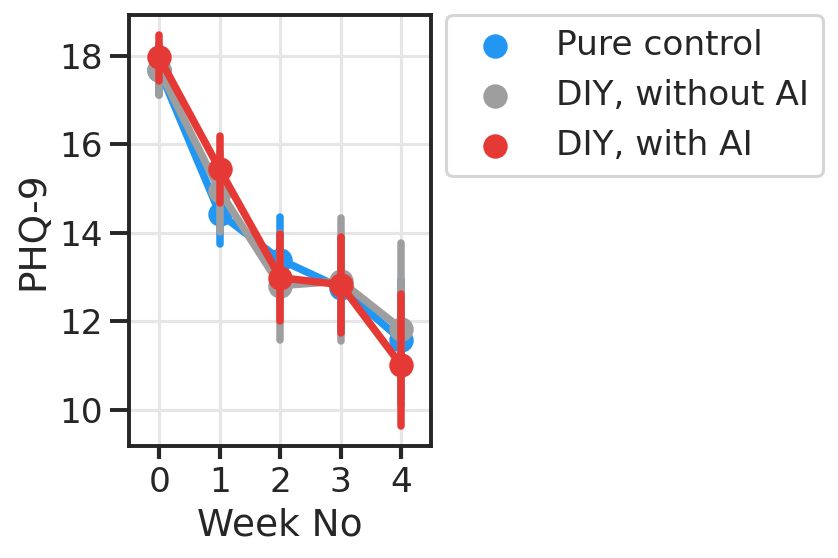

In [22]:
#plot

g = sb.pointplot(data=plot_df, x='week_no', y='phq_total', hue='condition', palette=['#2196f3', '#9e9e9e', '#e53935'])

axs = g.axes
axs.grid()

axs.set_xlabel('Week No')

axs.set_ylabel('PHQ-9')

# legend outside

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



In [23]:
# plot phq_week_1, phq_week_2, phq_week_3, phq_week_4 for each condition on a single plot

plot_li = []
for index, row in study_ids_df.iterrows():
	plot_li.append([index, '0', row['gad7_total'], row['condition_map']])
	plot_li.append([index, '1', row['gad7_week_1'], row['condition_map']])
	plot_li.append([index, '2', row['gad7_week_2'], row['condition_map']])
	plot_li.append([index, '3', row['gad7_week_3'], row['condition_map']])
	plot_li.append([index, '4', row['gad7_week_4'], row['condition_map']])

plot_df = pd.DataFrame(plot_li, columns=['study_id', 'week_no', 'gad_total', 'condition'])

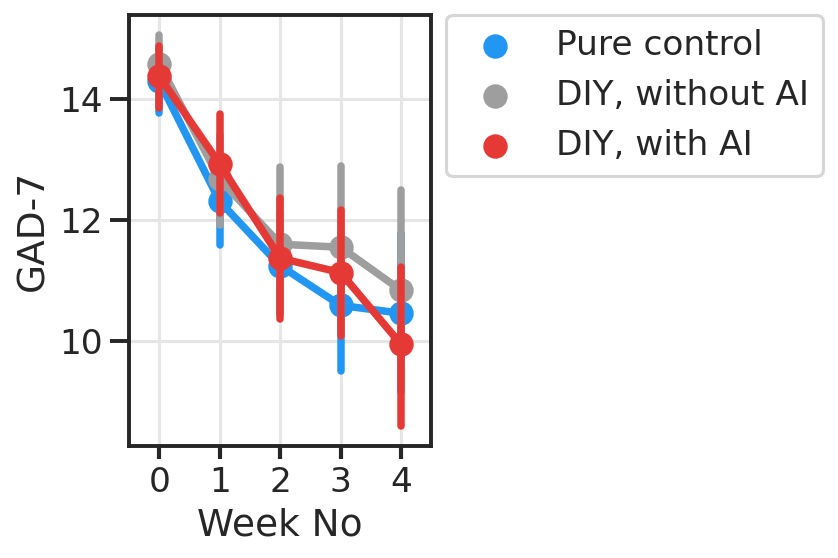

In [24]:
#plot

g = sb.pointplot(data=plot_df, x='week_no', y='gad_total', hue='condition', palette=['#2196f3', '#9e9e9e', '#e53935'])

axs = g.axes
axs.grid()

axs.set_xlabel('Week No')

axs.set_ylabel('GAD-7')

# legend outside

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



In [25]:
# age_range_w

study_ids_df

study_id                          email condition date_consent  \
0          73      genesisaraujo16@gmail.com         0   2023-11-20   
1          75        josianrosa136@gmail.com         1   2023-11-29   
2          79             nbalakos@gmail.com         2   2023-11-28   
3          84           lyttles131@yahoo.com         1   2023-11-21   
4          87  chichang@mail.fresnostate.edu         2   2023-11-21   
..        ...                            ...       ...          ...   
833      3923        jerimiahtutor@gmail.com         1   2024-03-17   
834      3925       ourtravels2001@gmail.com         1   2024-03-17   
835      3928          mommadawn65@yahoo.com         1   2024-03-18   
836      3930     lajean.faircloth@gmail.com         2   2024-03-17   
837      3933           kanmarie93@gmail.com         0   2024-03-17   

    consent_yn consent_complete  age  phq_total phq9_complete  gad7_total  \
0                                 22       25.0             2        19.0   
1                                 48       22.0             2        17.0   
2                                 54       12.0             2        10.0   
3                                 38       16.0             2        12.0   
4                                 30       14.0             2        16.0   
..         ...              ...  ...        ...           ...         ...   
833                               32       16.0             2        16.0   
834                               41       21.0             2        11.0   
835                               58       15.0             2        10.0   
836                               55       13.0             2        15.0   
837                               30       20.0             2        19.0   

     ... gad7_week_1  phq_week_2 gad7_week_2  phq_week_3  gad7_week_3  \
0    ...        19.0        19.0        18.0         NaN          NaN   
1    ...         NaN         NaN         NaN         NaN          NaN   
2    ...        14.0         NaN         NaN         7.0          8.0   
3    ...         NaN         8.0         7.0        10.0          7.0   
4    ...         NaN         NaN         NaN         NaN          NaN   
..   ...         ...         ...         ...         ...          ...   
833  ...         NaN         NaN         NaN         NaN          NaN   
834  ...         NaN         NaN         NaN         NaN          NaN   
835  ...         NaN         NaN         NaN         NaN          NaN   
836  ...         NaN         NaN         NaN         NaN          NaN   
837  ...         NaN         NaN         NaN         NaN          NaN   

     phq_week_4  gad7_week_4 phq_total_range  gad7_total_range  \
0           NaN          NaN           20-27   greater than 15   
1           NaN          NaN           20-27   greater than 15   
2          10.0         10.0           10-14             10-14   
3           NaN          NaN           15-19             10-14   
4           NaN          NaN           10-14   greater than 15   
..          ...          ...             ...               ...   
833         NaN          NaN           15-19   greater than 15   
834         NaN          NaN           20-27             10-14   
835         NaN          NaN           15-19             10-14   
836         NaN          NaN           10-14   greater than 15   
837         NaN          NaN           20-27   greater than 15   

       condition_map  
0       Pure control  
1    DIY, without AI  
2       DIY, with AI  
3    DIY, without AI  
4       DIY, with AI  
..               ...  
833  DIY, without AI  
834  DIY, without AI  
835  DIY, without AI  
836     DIY, with AI  
837     Pure control  

[838 rows x 29 columns]

In [26]:
tool_1_df = pd.DataFrame.from_dict(TOOL_1, orient='index').reset_index().rename(columns={'index': 'study_id', 0: 'tool_1'})

In [27]:
tool_1_df['study_id'] = tool_1_df['study_id'].astype(int)

In [28]:
# merge with study_ids_df
study_ids_df = study_ids_df.merge(tool_1_df, on='study_id', how='left')


In [29]:
# group by condition and compute mean tool_1

study_ids_df.groupby('condition_map')['tool_1'].mean()

condition_map
DIY, with AI       1.000000
DIY, without AI    1.013986
Pure control            NaN
Name: tool_1, dtype: float64

In [30]:
study_ids_df['study_id']

0        73
1        75
2        79
3        84
4        87
       ... 
833    3923
834    3925
835    3928
836    3930
837    3933
Name: study_id, Length: 838, dtype: int64

In [31]:
study_ids_df['date_consent'] = pd.to_datetime(study_ids_df['date_consent'])

In [32]:
pd.DataFrame.from_dict(GENDER, orient='index').reset_index()

index       0
0       73  Female
1       79  Female
2       84  Female
3       89  Female
4       91  Female
..     ...     ...
464   3747  Female
465   3749  Female
466   3757    Male
467   3782  Female
468   3808  Female

[469 rows x 2 columns]

In [33]:
len(study_ids_df)

838

In [34]:
# merge study_ids_df with GENDER

study_ids_df = study_ids_df.merge(pd.DataFrame.from_dict(GENDER, orient='index').reset_index().rename(columns={'index': 'study_id', 0: 'gender'}), on='study_id', how='left')



In [35]:
study_ids_df = study_ids_df.merge(pd.DataFrame.from_dict(RACE, orient='index').reset_index().rename(columns={'index': 'study_id', 0: 'race'}), on='study_id', how='left')

In [36]:
study_ids_df['gender'].value_counts(normalize=True)

Female    0.793177
Male      0.157783
Other     0.049041
Name: gender, dtype: float64

In [37]:
study_ids_df['race'].value_counts(normalize=True)

White                                                          0.809829
Prefer not to say                                              0.055556
Asian                                                          0.051282
Black or African American                                      0.036325
Prefer to self-describe                                        0.017094
Native American, Alaskan Native, Indigenous or First Nation    0.017094
Native Hawaiian or Other Pacific Islander                      0.006410
Middle Eastern or North African                                0.006410
Name: race, dtype: float64

In [38]:
rp.summary_cont(df.groupby(["condition_map", "phq_total"])["weight"])


NameError: name 'df' is not defined

In [ ]:
AGE_RANGES = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

In [39]:
def get_age_range(age):
	if age >= 13 and age <= 14:
		return '13-14'
	elif age >= 15 and age <= 17:
		return '15-17'
	elif age >= 18 and age <= 24:
		return '18-24'
	elif age >= 25 and age <= 34:
		return '25-34'
	elif age >= 35 and age <= 44:
		return '35-44'
	elif age >= 45 and age <= 54:
		return '45-54'
	elif age >= 55 and age <= 64:
		return '55-64'
	elif age >= 65:
		return '65+'
	else:
		return 'unknown'
		
study_ids_df['age_range'] = study_ids_df['age'].apply(get_age_range)

In [40]:
study_ids_df['age_range'].value_counts(normalize=True)

25-34    0.304296
35-44    0.247017
18-24    0.176611
45-54    0.170644
55-64    0.076372
65+      0.025060
Name: age_range, dtype: float64

In [41]:
# ordered category age_range
# study_ids_df['age_range'] = pd.Categorical(study_ids_df['age_range'], categories=AGE_RANGES, ordered=True)

In [42]:
output_df['age_range'] = pd.Categorical(output_df['age_range'], categories=AGE_RANGES, ordered=True)

NameError: name 'output_df' is not defined

In [43]:
# plot normalized value counts
# fig, ax = plt.subplots(figsize=(10, 5))

long_term_study_age_counts = study_ids_df['age_range'].value_counts(normalize=True).sort_index()

# plot(kind='bar', ax=ax)

In [44]:
diy_tool_age_counts = demographics_df['age_range'].value_counts(normalize=True).sort_index()

NameError: name 'demographics_df' is not defined

NameError: name 'diy_tool_age_counts' is not defined

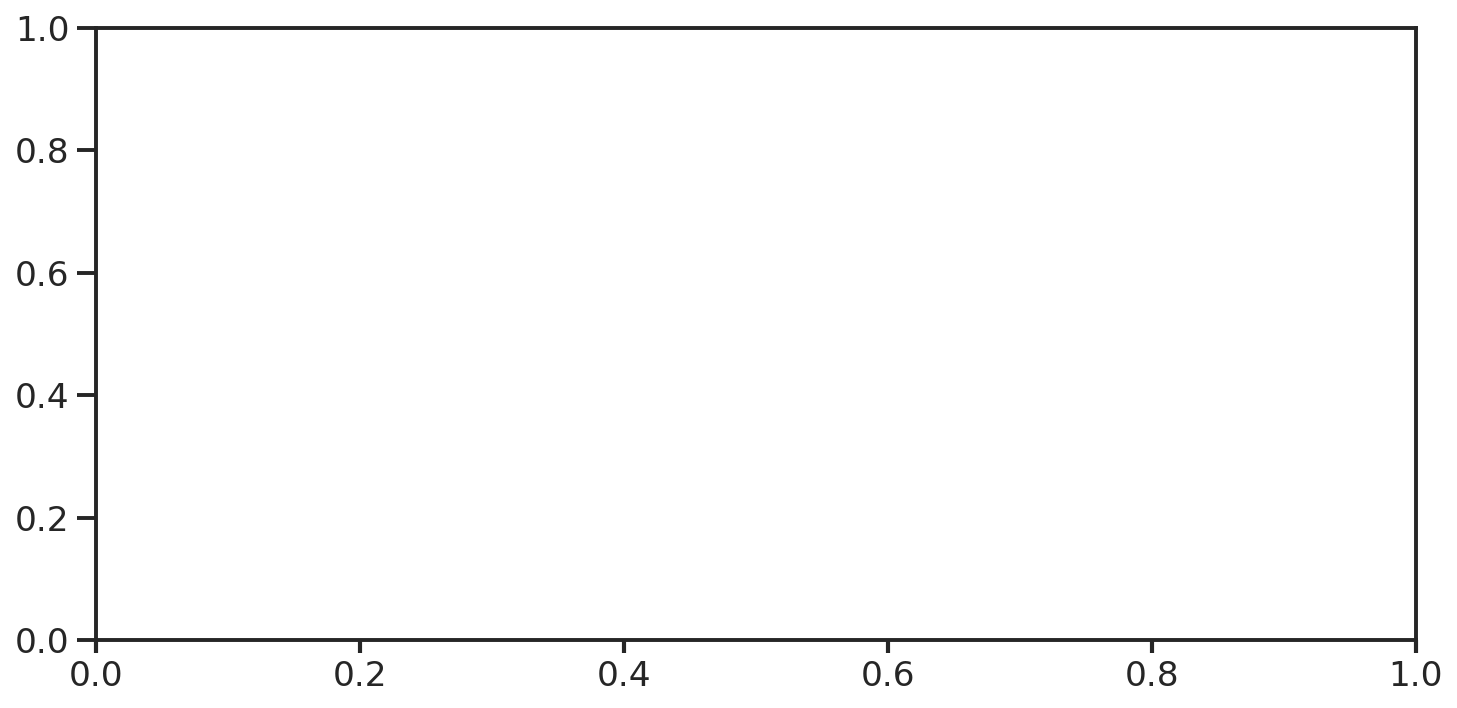

In [45]:
# merge and plot long_term_study_age_counts and diy_tool_age_counts on the same plot

fig, ax = plt.subplots(figsize=(10, 5))

plot_df = pd.DataFrame({'long_term_study': long_term_study_age_counts, 'online_tool': diy_tool_age_counts})

plot_df.plot(kind='bar', ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Percentage of Users')


In [46]:
# merge with TOOL_WENT_WELL, TOOL_DIDNT_WELL, TOOL_OTHER_COMMENTS

study_ids_df = study_ids_df.merge(pd.DataFrame.from_dict(TOOL_WENT_WELL, orient='index').reset_index().rename(columns={'index': 'study_id', 0: 'tool_went_well'}), on='study_id', how='left')

study_ids_df = study_ids_df.merge(pd.DataFrame.from_dict(TOOL_DIDNT_WELL, orient='index').reset_index().rename(columns={'index': 'study_id', 0: 'tool_didnt_well'}), on='study_id', how='left')

study_ids_df = study_ids_df.merge(pd.DataFrame.from_dict(TOOL_OTHER_COMMENTS, orient='index').reset_index().rename(columns={'index': 'study_id', 0: 'tool_other_comments'}), on='study_id', how='left')

In [47]:
study_ids_df

study_id                          email condition date_consent  \
0          73      genesisaraujo16@gmail.com         0   2023-11-20   
1          75        josianrosa136@gmail.com         1   2023-11-29   
2          79             nbalakos@gmail.com         2   2023-11-28   
3          84           lyttles131@yahoo.com         1   2023-11-21   
4          87  chichang@mail.fresnostate.edu         2   2023-11-21   
..        ...                            ...       ...          ...   
833      3923        jerimiahtutor@gmail.com         1   2024-03-17   
834      3925       ourtravels2001@gmail.com         1   2024-03-17   
835      3928          mommadawn65@yahoo.com         1   2024-03-18   
836      3930     lajean.faircloth@gmail.com         2   2024-03-17   
837      3933           kanmarie93@gmail.com         0   2024-03-17   

    consent_yn consent_complete  age  phq_total phq9_complete  gad7_total  \
0                                 22       25.0             2        19.0   
1                                 48       22.0             2        17.0   
2                                 54       12.0             2        10.0   
3                                 38       16.0             2        12.0   
4                                 30       14.0             2        16.0   
..         ...              ...  ...        ...           ...         ...   
833                               32       16.0             2        16.0   
834                               41       21.0             2        11.0   
835                               58       15.0             2        10.0   
836                               55       13.0             2        15.0   
837                               30       20.0             2        19.0   

     ... phq_total_range  gad7_total_range    condition_map  tool_1  gender  \
0    ...           20-27   greater than 15     Pure control     NaN  Female   
1    ...           20-27   greater than 15  DIY, without AI     NaN     NaN   
2    ...           10-14             10-14     DIY, with AI     1.0  Female   
3    ...           15-19             10-14  DIY, without AI     1.0  Female   
4    ...           10-14   greater than 15     DIY, with AI     NaN     NaN   
..   ...             ...               ...              ...     ...     ...   
833  ...           15-19   greater than 15  DIY, without AI     NaN     NaN   
834  ...           20-27             10-14  DIY, without AI     NaN     NaN   
835  ...           15-19             10-14  DIY, without AI     NaN     NaN   
836  ...           10-14   greater than 15     DIY, with AI     NaN     NaN   
837  ...           20-27   greater than 15     Pure control     NaN     NaN   

      race  age_range                                     tool_went_well  \
0    White      18-24                                                      
1      NaN      45-54                                                NaN   
2    White      45-54  Rationalized thinking was forced throughout ex...   
3    White      35-44                                            Is hard   
4      NaN      25-34                                                NaN   
..     ...        ...                                                ...   
833    NaN      25-34                                                NaN   
834    NaN      35-44                                                NaN   
835    NaN      55-64                                                NaN   
836    NaN      55-64                                                NaN   
837    NaN      25-34                                                NaN   

     tool_didnt_well  tool_other_comments  
0                                          
1                NaN                  NaN  
2               N\/A   None at this time   
3           One time                 Nobe  
4                NaN                  NaN  
..               ...                  ...  
833              NaN                  NaN  
834          

In [48]:
# tool_went_well, condition_wise

study_ids_df.loc[(~study_ids_df['tool_went_well'].isna()) & (study_ids_df['condition_map'] == 'DIY, with AI')]['tool_went_well'].to_csv('outputs/tool_went_well_diy_with_ai.csv', index=False)
study_ids_df.loc[(~study_ids_df['tool_went_well'].isna()) & (study_ids_df['condition_map'] == 'DIY, without AI')]['tool_went_well'].to_csv('outputs/tool_went_well_diy_without_ai.csv', index=False)

# tool_didnt_well, condition_wise

study_ids_df.loc[(~study_ids_df['tool_didnt_well'].isna()) & (study_ids_df['condition_map'] == 'DIY, with AI')]['tool_didnt_well'].to_csv('outputs/tool_didnt_well_diy_with_ai.csv', index=False)
study_ids_df.loc[(~study_ids_df['tool_didnt_well'].isna()) & (study_ids_df['condition_map'] == 'DIY, without AI')]['tool_didnt_well'].to_csv('outputs/tool_didnt_well_diy_without_ai.csv', index=False)

# tool_other_comments, condition_wise

study_ids_df.loc[(~study_ids_df['tool_other_comments'].isna()) & (study_ids_df['condition_map'] == 'DIY, with AI')]['tool_other_comments'].to_csv('outputs/tool_other_comments_diy_with_ai.csv', index=False)
study_ids_df.loc[(~study_ids_df['tool_other_comments'].isna()) & (study_ids_df['condition_map'] == 'DIY, without AI')]['tool_other_comments'].to_csv('outputs/tool_other_comments_diy_without_ai.csv', index=False)

In [49]:
# conn = psycopg2.connect(database=os.environ['OTT_DBNAME'], user = os.environ['OTT_DBUSER'], password = os.environ['OTT_DBPASS'], host = os.environ['OTT_DBHOST'] + ".postgres.database.azure.com", port = "5432")
conn = psycopg2.connect(database=os.environ['OTT_DBNAME'], user = os.environ['OTT_DBUSER'], password = os.environ['OTT_DBPASS'], host = os.environ['OTT_DBHOST'], port = "5432")


In [50]:
cur = conn.cursor()

In [51]:
Q = '''SELECT * FROM public.diy_tool_demographics
ORDER BY id ASC'''

cur.execute(Q)
records = cur.fetchall()

demographics_df = pd.DataFrame(records, columns = ['id', 'created_at', 'updated_at', 'thought_record_id',
       'reframe_final_id', 'age_range', 'gender', 'race', 'income',
       'population', 'problems', 'treatment', 'education', 'prior_experience'])

In [52]:
demographics_df['age_range']

0        25-34
1        25-34
2          65+
3        25-34
4        25-34
         ...  
17692    55-64
17693    35-44
17694    25-34
17695    35-44
17696      65+
Name: age_range, Length: 17697, dtype: object

In [53]:
demographics_df['age_range'] = pd.Categorical(demographics_df['age_range'], categories=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'], ordered=True)

In [54]:
demographics_df['age_range'].value_counts(normalize=True)

18-24    0.369272
25-34    0.262611
35-44    0.178283
45-54    0.094083
55-64    0.066487
65+      0.029265
Name: age_range, dtype: float64

In [55]:
Q = """SELECT username,study_id,condition FROM study_userdetails ORDER BY study_userdetails.id ASC"""

cur.execute(Q)
records = cur.fetchall()

userdetails_df = pd.DataFrame(records, columns = ['username','study_id', 'condition'])

In [56]:
userdetails_df['study_id'] = userdetails_df['study_id'].astype('int')

In [57]:
discard_usernames = userdetails_df.loc[userdetails_df['study_id'] < 70]['username'].tolist()

In [58]:
Q = 'SELECT study_thoughtrecord.created_at, study_outcome.updated_at, study_thoughtrecord.thought_record_id, study_thoughtrecord.username, study_thoughtrecord.remove_negative_feeling, study_thoughtrecord.skip_step, study_thoughtrecord.prompt_to_use, study_thoughtrecord.more_suggestions_btn, study_thoughtrecord.multiple_cognitive_distortions, study_thoughtrecord.ai, study_thoughtrecord.emotion_questions , study_thoughtrecord.personalize , study_thoughtrecord.readable, study_thoughtrecord.psychoeducation, believable, stickiness, helpfulness, learnability, belief_1, emotion_strength_1, belief_2, emotion_strength_2 FROM study_thoughtrecord, study_outcome WHERE study_thoughtrecord.thought_record_id = study_outcome.thought_record_id ORDER BY study_thoughtrecord.thought_record_id ASC;'

cur.execute(Q)
records = cur.fetchall()

thought_records_with_outcomes_df = pd.DataFrame(records, columns=['start_time',
                                'end_time',
                                'thought_record_id', \
								'username', \
                                'remove_negative_feeling', \
								'skip_step', \
								'prompt_to_use', \
								'more_suggestions_btn', \
								'multiple_cognitive_distortions', \
								'Human\n+AI', \
								'emotion_questions', \
								'personalize', \
								'readable', \
								'psychoeducation', \
                                'believable', 'stickiness', 'helpfulness', 'learnability','belief_1', 'emotion_strength_1', 'belief_2', 'emotion_strength_2'])



In [59]:
# Deduplicate by thought_record_id, keep last
thought_records_with_outcomes_df = thought_records_with_outcomes_df.drop_duplicates(subset=['thought_record_id'], keep='last')

In [60]:
thought_records_with_outcomes_df = thought_records_with_outcomes_df.loc[~thought_records_with_outcomes_df['username'].isin(discard_usernames)]

In [61]:
len(set(thought_records_with_outcomes_df['username']))

466

In [62]:
thought_records_with_outcomes_df['believable'] = pd.to_numeric(thought_records_with_outcomes_df['believable']) #.mean()
thought_records_with_outcomes_df['stickiness'] = pd.to_numeric(thought_records_with_outcomes_df['stickiness'])
thought_records_with_outcomes_df['helpfulness'] = pd.to_numeric(thought_records_with_outcomes_df['helpfulness'])
thought_records_with_outcomes_df['learnability'] = pd.to_numeric(thought_records_with_outcomes_df['learnability'])

In [63]:
thought_records_with_outcomes_df['believable'] = thought_records_with_outcomes_df['believable'] + 3.0
thought_records_with_outcomes_df['stickiness'] = thought_records_with_outcomes_df['stickiness'] + 3.0
thought_records_with_outcomes_df['helpfulness'] = thought_records_with_outcomes_df['helpfulness'] + 3.0
thought_records_with_outcomes_df['learnability'] = thought_records_with_outcomes_df['learnability'] + 3.0



In [64]:
CONDITION_MAP = {'0': 'Pure\ncontrol', '1': 'Without\nAI', '2': 'With\nAI'}

thought_records_with_outcomes_df['condition'] = thought_records_with_outcomes_df['username'].map(userdetails_df.set_index('username')['condition'])

thought_records_with_outcomes_df['condition_map'] = thought_records_with_outcomes_df['condition'].map(CONDITION_MAP)

In [65]:
from scipy.stats import ttest_ind


print('Reframe Relatibility:', thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '2']['believable'].mean(), thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '1']['believable'].mean(), ttest_ind(thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '2']['believable'], thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '1']['believable']))
print('Reframe Helpfulness:', thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '2']['helpfulness'].mean(), thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '1']['helpfulness'].mean(), ttest_ind(thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '2']['helpfulness'], thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '1']['helpfulness']))
print('Reframe Stickiness:', thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '2']['stickiness'].mean(), thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '1']['stickiness'].mean(), ttest_ind(thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '2']['stickiness'], thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '1']['stickiness']))
print('Skill Learnability:', thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '2']['learnability'].mean(), thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '1']['learnability'].mean(), ttest_ind(thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '2']['learnability'], thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '1']['learnability']))


Reframe Relatibility: 4.060963114754099 4.184159690920798 Ttest_indResult(statistic=-3.581386267582854, pvalue=0.0003464200406301904)
Reframe Helpfulness: 3.7925204918032787 3.6767546683837735 Ttest_indResult(statistic=2.852339745088439, pvalue=0.0043652985313445405)
Reframe Stickiness: 3.9887295081967213 3.9555698647778494 Ttest_indResult(statistic=0.889794799606902, pvalue=0.3736371810005804)
Skill Learnability: 3.9139344262295084 3.854475209272376 Ttest_indResult(statistic=1.5076071014552634, pvalue=0.13174528879829922)


In [66]:
# compute cohen's d

def cohen_d(x,y):
	nx = len(x)
	ny = len(y)
	dof = nx + ny - 2
	return (x.mean() - y.mean()) / np.sqrt(((nx-1)*x.var() + (ny-1)*y.var()) / dof)

print('Reframe Relatibility:', cohen_d(thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '2']['believable'], thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '1']['believable']))
print('Reframe Helpfulness:', cohen_d(thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '2']['helpfulness'], thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '1']['helpfulness']))
print('Reframe Stickiness:', cohen_d(thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '2']['stickiness'], thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '1']['stickiness']))
print('Skill Learnability:', cohen_d(thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '2']['learnability'], thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['condition'] == '1']['learnability']))

Reframe Relatibility: -0.12177819724519916
Reframe Helpfulness: 0.09698836320220157
Reframe Stickiness: 0.0302557720721407
Skill Learnability: 0.05126329897199062


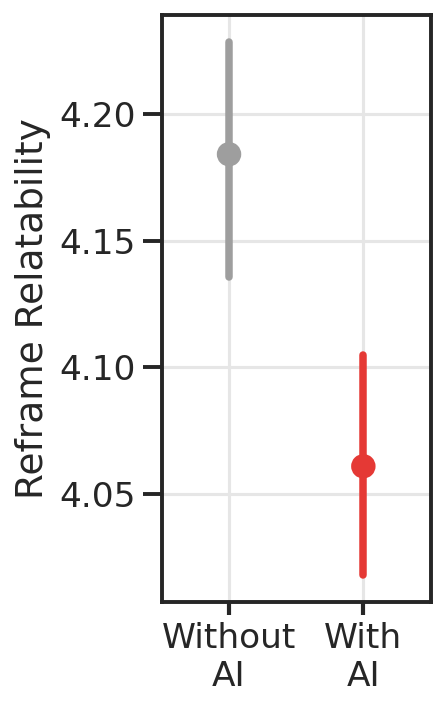

In [67]:
# PLot more_suggestions_btn vs. beelievable
g = sb.pointplot(data=thought_records_with_outcomes_df, x='condition_map', y='believable', palette=['#9e9e9e', '#e53935'])


axs = g.axes
axs.grid()
axs.set_ylabel('Reframe Relatability', fontsize=18)
axs.set_xlabel('', fontsize=18)
# axs.tick_params(axis='both', which='major', labelsize=18)

# axs.set_ylim([3.66, 3.94])

# axs.set_yticks(np.arange(3.7, 3.90, 0.01), minor=True)
# axs.set_yticks(np.arange(3.7, 3.91, 0.05), minor=False)


# axs.text(-0.5, 3.9, "N=2,415", fontsize=14)
# axs.set_yticklabels(['25%', '30%', '35%', '40%', '45%'])


fig = g.get_figure()
fig.set_size_inches(3.25, 5)

fig.tight_layout()

# fig.savefig('Plots/AI-relatability.svg')



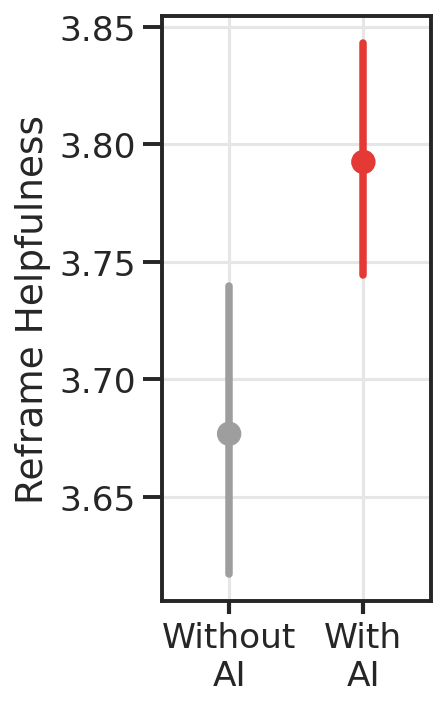

In [68]:
# PLot more_suggestions_btn vs. beelievable
g = sb.pointplot(data=thought_records_with_outcomes_df, x='condition_map', y='helpfulness', palette=['#9e9e9e', '#e53935'])


axs = g.axes
axs.grid()
axs.set_ylabel('Reframe Helpfulness', fontsize=18)
axs.set_xlabel('', fontsize=18)
# axs.tick_params(axis='both', which='major', labelsize=18)

# axs.set_ylim([3.66, 3.94])

# axs.set_yticks(np.arange(3.7, 3.90, 0.01), minor=True)
# axs.set_yticks(np.arange(3.7, 3.91, 0.05), minor=False)


# axs.text(-0.5, 3.9, "N=2,415", fontsize=14)
# axs.set_yticklabels(['25%', '30%', '35%', '40%', '45%'])


fig = g.get_figure()
fig.set_size_inches(3.25, 5)

fig.tight_layout()

# fig.savefig('Plots/AI-relatability.svg')



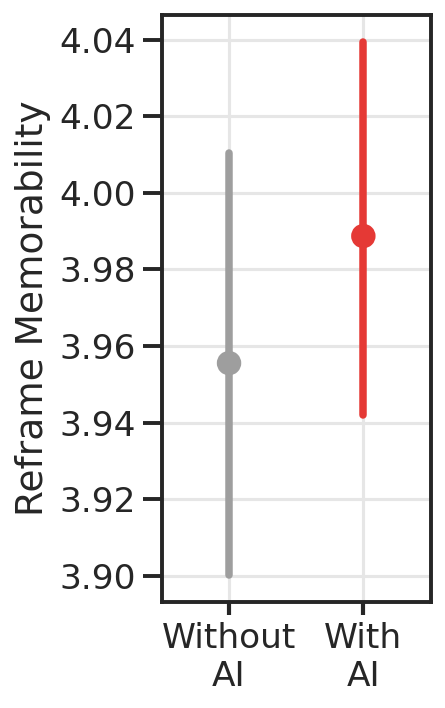

In [69]:
# PLot more_suggestions_btn vs. beelievable
g = sb.pointplot(data=thought_records_with_outcomes_df, x='condition_map', y='stickiness', palette=['#9e9e9e', '#e53935'])


axs = g.axes
axs.grid()
axs.set_ylabel('Reframe Memorability', fontsize=18)
axs.set_xlabel('', fontsize=18)
# axs.tick_params(axis='both', which='major', labelsize=18)

# axs.set_ylim([3.66, 3.94])

# axs.set_yticks(np.arange(3.7, 3.90, 0.01), minor=True)
# axs.set_yticks(np.arange(3.7, 3.91, 0.05), minor=False)


# axs.text(-0.5, 3.9, "N=2,415", fontsize=14)
# axs.set_yticklabels(['25%', '30%', '35%', '40%', '45%'])


fig = g.get_figure()
fig.set_size_inches(3.25, 5)

fig.tight_layout()

# fig.savefig('Plots/AI-relatability.svg')



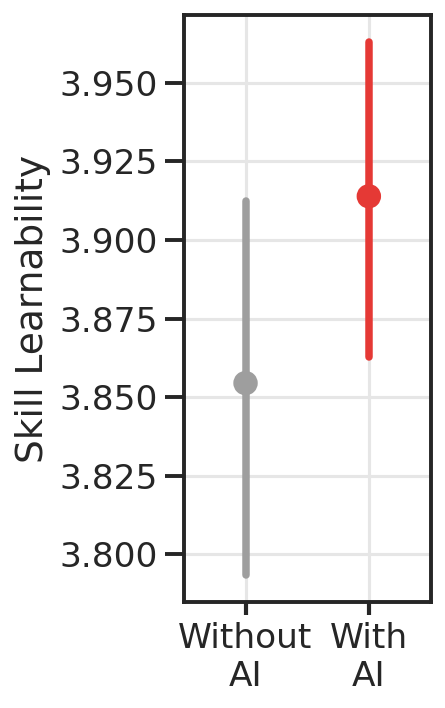

In [70]:
# PLot more_suggestions_btn vs. beelievable
g = sb.pointplot(data=thought_records_with_outcomes_df, x='condition_map', y='learnability', palette=['#9e9e9e', '#e53935'])


axs = g.axes
axs.grid()
axs.set_ylabel('Skill Learnability', fontsize=18)
axs.set_xlabel('', fontsize=18)
# axs.tick_params(axis='both', which='major', labelsize=18)

# axs.set_ylim([3.66, 3.94])

# axs.set_yticks(np.arange(3.7, 3.90, 0.01), minor=True)
# axs.set_yticks(np.arange(3.7, 3.91, 0.05), minor=False)


# axs.text(-0.5, 3.9, "N=2,415", fontsize=14)
# axs.set_yticklabels(['25%', '30%', '35%', '40%', '45%'])


fig = g.get_figure()
fig.set_size_inches(3.25, 5)

fig.tight_layout()

# fig.savefig('Plots/AI-relatability.svg')



In [71]:
thought_records_with_emotion_outcomes_df = thought_records_with_outcomes_df[['start_time', 'end_time', 'thought_record_id', 'username', 'condition', 'believable', 'helpfulness', 'stickiness', 'learnability', 'belief_1', 'emotion_strength_1', 'belief_2', 'emotion_strength_2']] 

In [72]:
Q = """SELECT * FROM study_emotion
ORDER BY thought_record_id DESC"""

cur.execute(Q)
emotion = cur.fetchall()

emotion_df = pd.DataFrame(emotion, columns = ['emotion_id', \
    										'created_at', \
                                            'updated_at', \
                                            'thought_record_id', \
                                            'thought_id', \
                                            'belief', \
                                            'emotion', \
                                            'emotion_strength'])
                                              


In [73]:
thought_records_with_emotion_outcomes_df = thought_records_with_emotion_outcomes_df.loc[thought_records_with_emotion_outcomes_df['thought_record_id'] >= emotion_df['thought_record_id'].min()]

In [74]:
thought_records_with_emotion_outcomes_df['belief_1'] = pd.to_numeric(thought_records_with_emotion_outcomes_df['belief_1'], errors='coerce')
thought_records_with_emotion_outcomes_df['belief_2'] = pd.to_numeric(thought_records_with_emotion_outcomes_df['belief_2'], errors='coerce')
thought_records_with_emotion_outcomes_df['emotion_strength_1'] = pd.to_numeric(thought_records_with_emotion_outcomes_df['emotion_strength_1'], errors='coerce')
thought_records_with_emotion_outcomes_df['emotion_strength_2'] = pd.to_numeric(thought_records_with_emotion_outcomes_df['emotion_strength_2'], errors='coerce')


In [75]:
thought_records_with_emotion_outcomes_df = thought_records_with_emotion_outcomes_df.fillna('')

In [76]:
thought_records_with_emotion_outcomes_df['all_belief'] = thought_records_with_emotion_outcomes_df.apply(lambda row: row['belief_1'] if row['belief_1'] != '' else row['belief_2'], axis=1)

In [77]:
thought_records_with_emotion_outcomes_df['all_emotion_strength'] = thought_records_with_emotion_outcomes_df.apply(lambda row: row['emotion_strength_1'] if row['emotion_strength_1'] != '' else row['emotion_strength_2'], axis=1)

In [78]:
# Remove discarded usernames
thought_records_with_emotion_outcomes_df = thought_records_with_emotion_outcomes_df[~thought_records_with_emotion_outcomes_df['username'].isin(discard_usernames)]

In [79]:
thought_records_with_emotion_outcomes_df = pd.merge(thought_records_with_emotion_outcomes_df, emotion_df[['thought_record_id', 'emotion_strength', 'belief']], on='thought_record_id', how='left')

In [80]:
thought_records_with_emotion_outcomes_df = thought_records_with_emotion_outcomes_df.loc[~thought_records_with_emotion_outcomes_df['emotion_strength'].isna()]

In [81]:
thought_records_with_emotion_outcomes_df['emotion_strength'] = pd.to_numeric(thought_records_with_emotion_outcomes_df['emotion_strength'])
thought_records_with_emotion_outcomes_df['belief'] = pd.to_numeric(thought_records_with_emotion_outcomes_df['belief'])

thought_records_with_emotion_outcomes_df['all_emotion_strength'] = pd.to_numeric(thought_records_with_emotion_outcomes_df['all_emotion_strength'])
thought_records_with_emotion_outcomes_df['all_belief'] = pd.to_numeric(thought_records_with_emotion_outcomes_df['all_belief'])


In [82]:
# change in belief

thought_records_with_emotion_outcomes_df['belief_change'] = thought_records_with_emotion_outcomes_df.apply(lambda row: row['belief'] - row['all_belief'], axis=1)

In [83]:
thought_records_with_emotion_outcomes_df['emotion_change'] = thought_records_with_emotion_outcomes_df.apply(lambda row: row['emotion_strength'] - row['all_emotion_strength'], axis=1)

In [84]:
thought_records_with_emotion_outcomes_df

start_time                         end_time  \
0    2023-11-21 20:45:48.139754+00:00 2023-11-21 20:51:08.777235+00:00   
1    2023-11-21 20:51:30.889579+00:00 2023-11-21 20:53:39.364902+00:00   
2    2023-11-22 03:57:21.853551+00:00 2023-11-22 04:03:24.755023+00:00   
3    2023-11-22 04:58:52.296187+00:00 2023-11-22 05:09:09.184732+00:00   
4    2023-11-22 05:09:54.598337+00:00 2023-11-22 05:15:54.564080+00:00   
...                               ...                              ...   
3565 2024-03-20 06:59:00.401977+00:00 2024-03-20 07:04:55.942033+00:00   
3567 2024-03-20 07:42:07.002902+00:00 2024-03-20 07:45:56.942713+00:00   
3568 2024-03-20 14:14:03.469428+00:00 2024-03-20 14:20:41.585146+00:00   
3569 2024-03-20 16:13:17.289375+00:00 2024-03-20 16:27:22.119730+00:00   
3570 2024-03-20 16:48:06.398933+00:00 2024-03-20 16:50:36.208971+00:00   

      thought_record_id                           username condition  \
0                    47               lyttles131@yahoo.com         1   
1                    48               lyttles131@yahoo.com         1   
2                    50             abbylange024@gmail.com         1   
3                    51  xxxmorganscrighton93xxx@gmail.com         2   
4                    52  xxxmorganscrighton93xxx@gmail.com         2   
...                 ...                                ...       ...   
3565               5199             rockyroxie15@gmail.com         2   
3567               5201            hayliebutcher@gmail.com         1   
3568               5203             rockyroxie15@gmail.com         2   
3569               5204            demo@beeline-online.net         1   
3570               5205            hnrutten74@spectrum.net         1   

      believable  helpfulness  stickiness  learnability belief_1  \
0            5.0          4.0         5.0           5.0            
1            5.0          4.0         4.0           5.0            
2            5.0          4.0         4.0           4.0            
3            5.0          5.0         5.0           5.0            
4            4.0          5.0         5.0           5.0            
...          ...          ...         ...           ...      ...   
3565         5.0          5.0         5.0           5.0            
3567         4.0          4.0         4.0           4.0            
3568         4.0          5.0         4.0           5.0            
3569         5.0          4.0         4.0           4.0            
3570         4.0          4.0         4.0           4.0            

     emotion_strength_1 belief_2 emotion_strength_2  all_belief  \
0                            6.0                6.0         6.0   
1                            6.0                6.0         6.0   
2                            4.0                5.0         4.0   
3                            7.0                7.0         7.0   
4                            6.0                6.0         6.0   
...                 ...      ...                ...         ...   
3565                         4.0                1.0         4.0   
3567                         3.0                3.0         3.0   
3568                         4.0                3.0         4.0   
3569                         3.0                2.0         3.0   
3570                         5.0                4.0         5.0   

      all_emotion_strength  emotion_strength  belief  belief_change  \
0                      6.0                 7       5           -1.0   
1                      6.0                 6       4           -2.0   
2                      5.0                 6       4            0.0   
3                      7.0                 6       5           -2.0   
4                      6.0                 7       7            1.0   
...                    ...               ...     ...            ...   
3565                   1.0                 7       7            3.0   
3567                   3.0                 5       3            0.0   
3568        

In [85]:
thought_records_with_emotion_outcomes_df['condition_map'] = thought_records_with_emotion_outcomes_df['condition'].map(CONDITION_MAP)

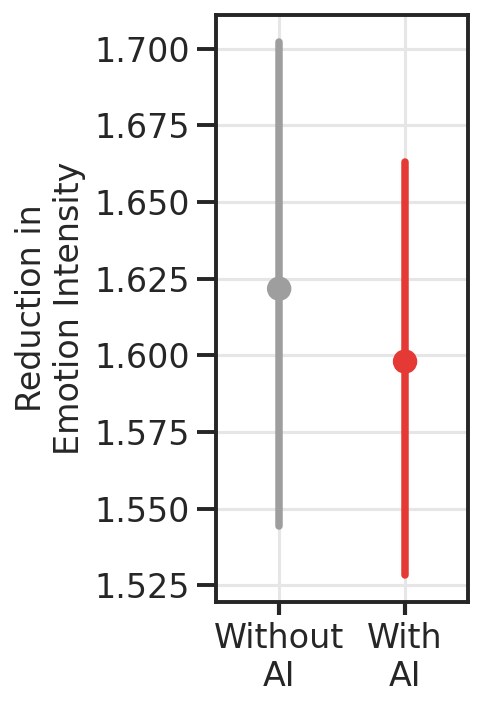

In [86]:
# PLot more_suggestions_btn vs. beelievable
g = sb.pointplot(data=thought_records_with_emotion_outcomes_df, x='condition_map', y='emotion_change', palette=['#9e9e9e', '#e53935'] )


axs = g.axes
axs.grid()
axs.set_ylabel('Reduction in\nEmotion Intensity', fontsize=16)
axs.set_xlabel('', fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)

# axs.set_ylim([3.66, 3.94])

# axs.set_yticks(np.arange(1.6, 2.40, 0.04), minor=True)
# axs.set_yticks(np.arange(1.6, 2.41, 0.2), minor=False)

# axs.set_yticklabels(['25%', '30%', '35%', '40%', '45%'])


fig = g.get_figure()
fig.set_size_inches(3.5, 5)

fig.tight_layout()

# fig.savefig('Plots/ai-emotion_change.svg')

In [87]:
cohen_d(thought_records_with_emotion_outcomes_df.loc[thought_records_with_emotion_outcomes_df['condition'] == '2']['emotion_change'], thought_records_with_emotion_outcomes_df.loc[thought_records_with_emotion_outcomes_df['condition'] == '1']['emotion_change'])

-0.015135307941013516

In [88]:
len(set(thought_records_with_emotion_outcomes_df['username']))

466

In [89]:
# remove na
thought_records_with_emotion_outcomes_df = thought_records_with_emotion_outcomes_df.loc[~thought_records_with_emotion_outcomes_df['emotion_change'].isna()]

In [90]:
print('reduction_in_emotion_intensity:', thought_records_with_emotion_outcomes_df.loc[thought_records_with_emotion_outcomes_df['condition'] == '2']['emotion_change'].mean(), thought_records_with_emotion_outcomes_df.loc[thought_records_with_emotion_outcomes_df['condition'] == '1']['emotion_change'].mean(), ttest_ind(thought_records_with_emotion_outcomes_df.loc[thought_records_with_emotion_outcomes_df['condition'] == '2']['emotion_change'], thought_records_with_emotion_outcomes_df.loc[thought_records_with_emotion_outcomes_df['condition'] == '1']['emotion_change']))

reduction_in_emotion_intensity: 1.5979643765903309 1.6217252396166135 Ttest_indResult(statistic=-0.44674166402582627, pvalue=0.6550890164520216)


In [91]:
Q = """SELECT * FROM study_step_logs
ORDER BY thought_record_id DESC"""

cur.execute(Q)
steplogs = cur.fetchall()

steplogs_df = pd.DataFrame(steplogs, columns = ['id', \
                                               'created_at', \
                                               'updated_at', \
                                               'thought_record_id', \
                                               'step_number_from', \
                                               'step_number_to'])

In [92]:
Q = """SELECT * FROM study_thoughtrecord
ORDER BY thought_record_id DESC"""

cur.execute(Q)
thoughtrecord = cur.fetchall()

thoughtrecord_df = pd.DataFrame(thoughtrecord, columns = ['created_at', \
                                                         'updated_at', \
                                                         'thought_record_id', \
                                                         'username', \
                                                         'referral_code', \
														 'week_no', \
                                                            'skip_step', \
                                                            'remove_negative_feeling', \
															'prompt_to_use', \
                                                            'refresh_btn', \
                                                            'more_suggestions_btn', \
                                                            'descriptive_thought_Q', \
                                                            'loading_time', 'A_A', 'multiple_cd', 'extra_q', 'emotion_questions', \
															'personalize', 'readable', 'psychoeducation', 'ai', 'include_emotions'])

In [93]:
# Join with userdetails_df
thoughtrecord_df = pd.merge(thoughtrecord_df, userdetails_df, on='username', how='left')

In [92]:
thoughtrecords_df = thoughtrecord_df

In [93]:
# discared usernames

thoughtrecords_df = thoughtrecords_df.loc[~thoughtrecords_df['username'].isin(discard_usernames)]

In [94]:
steplogs_df_max = steplogs_df.groupby('thought_record_id').agg({'step_number_to':'max'})

In [95]:
steplogs_df_max = steplogs_df_max.reset_index()


In [86]:
thoughtrecord_maxsteps = thoughtrecords_df.merge(steplogs_df_max, on=['thought_record_id'], how='left')

In [87]:
thoughtrecord_maxsteps = thoughtrecord_maxsteps.fillna(0)

In [88]:
ab_0_max_steps = thoughtrecord_maxsteps.loc[( (thoughtrecord_maxsteps['condition'] == '1'))]

ab_1_max_steps = thoughtrecord_maxsteps.loc[(thoughtrecord_maxsteps['condition'] == '2')]

In [89]:
ab_0_max_steps

created_at                       updated_at  \
0    2024-02-28 15:05:03.119359+00:00 2024-02-28 15:05:03.119382+00:00   
2    2024-02-28 12:38:50.433147+00:00 2024-02-28 12:38:50.433172+00:00   
5    2024-02-28 07:43:43.609036+00:00 2024-02-28 07:43:43.609057+00:00   
6    2024-02-28 07:39:34.748775+00:00 2024-02-28 07:39:34.748796+00:00   
7    2024-02-28 07:36:06.667042+00:00 2024-02-28 07:36:06.667065+00:00   
...                               ...                              ...   
3854 2023-11-22 08:13:41.433518+00:00 2023-11-22 08:13:41.433540+00:00   
3858 2023-11-22 03:57:21.853551+00:00 2023-11-22 03:57:21.853570+00:00   
3859 2023-11-21 20:54:39.045967+00:00 2023-11-21 20:54:39.045988+00:00   
3860 2023-11-21 20:51:30.889579+00:00 2023-11-21 20:51:30.889600+00:00   
3861 2023-11-21 20:45:48.139754+00:00 2023-11-21 20:45:48.139778+00:00   

      thought_record_id                      username referral_code week_no  \
0                  3914  christiejohnson226@gmail.com                     9   
2                  3912       mary.shaw1998@gmail.com                     9   
5                  3909         kalomax2019@gmail.com                     9   
6                  3908         kalomax2019@gmail.com                     9   
7                  3907       robertseriq@outlook.com                     9   
...                 ...                           ...           ...     ...   
3854                 54         oumaima2030@gmail.com                     9   
3858                 50        abbylange024@gmail.com                     9   
3859                 49          lyttles131@yahoo.com                     9   
3860                 48          lyttles131@yahoo.com                     9   
3861                 47          lyttles131@yahoo.com                     9   

      skip_step remove_negative_feeling  prompt_to_use  refresh_btn  ...  \
0             0              expert_new              0            1  ...   
2             0              expert_new              0            1  ...   
5             0              expert_new              0            1  ...   
6             0              expert_new              0            1  ...   
7             0              expert_new              0            1  ...   
...         ...                     ...            ...          ...  ...   
3854          0              expert_new              0            1  ...   
3858          0              expert_new              0            1  ...   
3859          0              expert_new              0            1  ...   
3860          0              expert_new              0            1  ...   
3861          0              expert_new              0            1  ...   

      extra_q  emotion_questions  personalize  readable  psychoeducation ai  \
0      second                  1            0         1                1  2   
2      second                  1            0         1                1  2   
5      second                  1            0         1                1  2   
6      second                  1            0         1                1  2   
7      second                  1            0         1                1  2   
...       ...                ...          ...       ...              ... ..   
3854   second                  1            0         1                1  2   
3858   second                  1            0         1                1  2   
3859   second                  1            0         1                1  2   
3860   second                  1            0         1                1  2   
3861   second                  1            0         1                1  2   

      include_emotions  study_id  condition  step_number_to  
0                    0      3218          1             0.0  
2                    0      3281          1             0.0  
5                    0      3290          1            10.0  
6                    0      3290          1            10.0  
7                

In [90]:
step_counts_ab_0 = ab_0_max_steps['step_number_to'].value_counts().sort_index(ascending=False).rename_axis('steps').reset_index(name='counts')

step_counts_ab_1 = ab_1_max_steps['step_number_to'].value_counts().sort_index(ascending=False).rename_axis('steps').reset_index(name='counts')

In [91]:
step_counts_ab_0['cum_counts'] = step_counts_ab_0['counts'].cumsum()

step_counts_ab_1['cum_counts'] = step_counts_ab_1['counts'].cumsum()


In [92]:
step_counts_ab_0['cum_perc'] = step_counts_ab_0.apply(lambda x: x.cum_counts * 100 / step_counts_ab_0['counts'].sum(), axis=1)

step_counts_ab_1['cum_perc'] = step_counts_ab_1.apply(lambda x: x.cum_counts * 100 / step_counts_ab_1['counts'].sum(), axis=1)

In [93]:
# Compute the percentage of users who transition to the next step relative to the previous step

def compute_next_step_perc(steps, cum_counts, ab=0):
	try:
		if ab == 0:
			return step_counts_ab_0.loc[step_counts_ab_0['steps'] == steps + 1]['cum_counts'].values[0] * 100 / cum_counts
		elif ab == 1:
			return step_counts_ab_1.loc[step_counts_ab_1['steps'] == steps + 1]['cum_counts'].values[0] * 100 / cum_counts
	except:
		return None
	
def compute_next_step_CI(steps, cum_counts, ab=0):
	try:
		if ab == 0:
			return proportion_confint(count=step_counts_ab_0.loc[step_counts_ab_0['steps'] == steps + 1]['cum_counts'].values[0], nobs=cum_counts, alpha = 0.05)
		elif ab == 1:
			return proportion_confint(count=step_counts_ab_1.loc[step_counts_ab_1['steps'] == steps + 1]['cum_counts'].values[0], nobs=cum_counts, alpha = 0.05)
	except:
		return None

def compute_next_step_lower_CI(steps, cum_counts, ab=0):
	try:
		if ab == 0:
			return proportion_confint(count=step_counts_ab_0.loc[step_counts_ab_0['steps'] == steps + 1]['cum_counts'].values[0], nobs=cum_counts, alpha = 0.05)[0]*100.0
		elif ab == 1:
			return proportion_confint(count=step_counts_ab_1.loc[step_counts_ab_1['steps'] == steps + 1]['cum_counts'].values[0], nobs=cum_counts, alpha = 0.05)[0]*100.0
	except:
		return None

def compute_next_step_upper_CI(steps, cum_counts, ab=0):
	try:
		if ab == 0:
			return proportion_confint(count=step_counts_ab_0.loc[step_counts_ab_0['steps'] == steps + 1]['cum_counts'].values[0], nobs=cum_counts, alpha = 0.05)[1]*100.0
		elif ab == 1:
			return proportion_confint(count=step_counts_ab_1.loc[step_counts_ab_1['steps'] == steps + 1]['cum_counts'].values[0], nobs=cum_counts, alpha = 0.05)[1]*100.0
	except:
		return None

step_counts_ab_0['next_step_perc'] = step_counts_ab_0.apply(lambda x: compute_next_step_perc(x.steps, x.cum_counts, ab=0), axis=1)
step_counts_ab_1['next_step_perc'] = step_counts_ab_1.apply(lambda x: compute_next_step_perc(x.steps, x.cum_counts, ab=1), axis=1)

step_counts_ab_0['next_step_lower_CI'] = step_counts_ab_0.apply(lambda x: compute_next_step_lower_CI(x.steps, x.cum_counts, ab=0), axis=1)
step_counts_ab_1['next_step_lower_CI'] = step_counts_ab_1.apply(lambda x: compute_next_step_lower_CI(x.steps, x.cum_counts, ab=1), axis=1)

step_counts_ab_0['next_step_upper_CI'] = step_counts_ab_0.apply(lambda x: compute_next_step_upper_CI(x.steps, x.cum_counts, ab=0), axis=1)
step_counts_ab_1['next_step_upper_CI'] = step_counts_ab_1.apply(lambda x: compute_next_step_upper_CI(x.steps, x.cum_counts, ab=1), axis=1)

step_counts_ab_0['next_step_CI'] = step_counts_ab_0.apply(lambda x: compute_next_step_CI(x.steps, x.cum_counts, ab=0), axis=1)
step_counts_ab_1['next_step_CI'] = step_counts_ab_1.apply(lambda x: compute_next_step_CI(x.steps, x.cum_counts, ab=1), axis=1)

In [94]:
step_counts_ab_0 = step_counts_ab_0[::-1]

step_counts_ab_1 = step_counts_ab_1[::-1]

In [95]:
from statsmodels.stats.proportion import proportion_confint


step_counts_ab_0['CI'] = step_counts_ab_0.apply(lambda x: proportion_confint(count=x.cum_counts, nobs=step_counts_ab_0['counts'].sum(), alpha = 0.05), axis=1)
step_counts_ab_0['lower_CI'] = step_counts_ab_0.apply(lambda x: proportion_confint(count=x.cum_counts, nobs=step_counts_ab_0['counts'].sum(), alpha = 0.05)[0]*100.0, axis=1)
step_counts_ab_0['upper_CI'] = step_counts_ab_0.apply(lambda x: proportion_confint(count=x.cum_counts, nobs=step_counts_ab_0['counts'].sum(), alpha = 0.05)[1]*100.0, axis=1)

step_counts_ab_1['CI'] = step_counts_ab_1.apply(lambda x: proportion_confint(count=x.cum_counts, nobs=step_counts_ab_1['counts'].sum(), alpha = 0.05), axis=1)
step_counts_ab_1['lower_CI'] = step_counts_ab_1.apply(lambda x: proportion_confint(count=x.cum_counts, nobs=step_counts_ab_1['counts'].sum(), alpha = 0.05)[0]*100.0, axis=1)
step_counts_ab_1['upper_CI'] = step_counts_ab_1.apply(lambda x: proportion_confint(count=x.cum_counts, nobs=step_counts_ab_1['counts'].sum(), alpha = 0.05)[1]*100.0, axis=1)


In [96]:
STEPS_MAP = {0: 'Landing', \
            1: 'Consent', \
            2: 'Thought', \
            3: 'Emotion', \
            4: 'Situation', \
            5: 'Thinking Trap', \
            6: 'Reframe Select', \
            7: 'Reframe Edit', \
            8: 'Outcome', \
            9: 'Demographic', \
            10: 'Summary'}

In [97]:
step_counts_ab_0['step_name'] = step_counts_ab_0.apply(lambda x: STEPS_MAP[x.steps], axis=1)

step_counts_ab_1['step_name'] = step_counts_ab_1.apply(lambda x: STEPS_MAP[x.steps], axis=1)

In [98]:
step_counts_ab_0['AI?'] = 'No'
step_counts_ab_1['AI?'] = 'Yes'

# Concatenate the two dataframes
step_counts = pd.concat([step_counts_ab_0, step_counts_ab_1])

In [99]:
# Make step_name a categorical and ordered variable

step_counts['step_name'] = pd.Categorical(step_counts['step_name'], categories=STEPS_MAP.values(), ordered=True)

In [100]:
step_counts['steps'] = step_counts['steps'].astype(int)

In [101]:
cum_percs_0 = step_counts_ab_0['cum_perc'].tolist()

cum_percs_1 = step_counts_ab_1['cum_perc'].tolist()

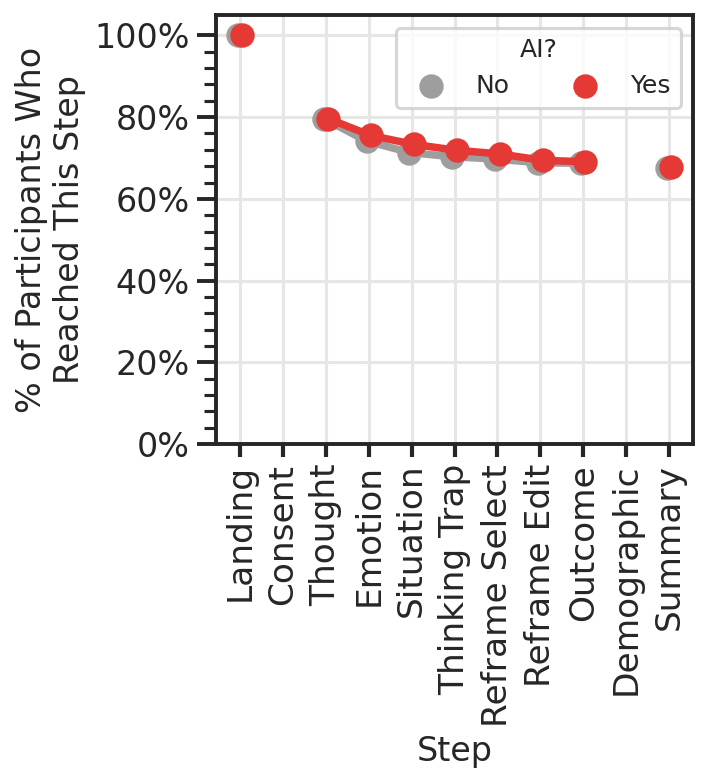

In [102]:
ax = sb.pointplot(data=step_counts, x='step_name', y='cum_perc', hue='AI?', dodge=0.1,  palette=['#9e9e9e', '#e53935'],)


#get linewidth
lw = ax.lines[0].get_linewidth()


lvls = step_counts['AI?'].unique()

for i in lvls:
	y_l = np.array(step_counts[step_counts['AI?'] == i]['cum_perc']) - np.array(step_counts[step_counts['AI?'] == i]['lower_CI'])
	y_u =np.array(step_counts[step_counts['AI?'] == i]['upper_CI']) - np.array(step_counts[step_counts['AI?'] == i]['cum_perc'])

	errors = [y_l, y_u]

	if i == 'No':
		ax.errorbar(x=step_counts[step_counts['AI?'] == i]['steps'] - 0.05,y=step_counts[step_counts['AI?'] == i]['cum_perc'],
					yerr=errors, fmt='none', elinewidth=lw, c = '#9e9e9e', zorder=1)
		
	elif i == 'Yes':
		ax.errorbar(x=step_counts[step_counts['AI?'] == i]['steps'] + 0.05,y=step_counts[step_counts['AI?'] == i]['cum_perc'],
					yerr=errors, fmt='none', elinewidth=lw, c = '#e53935', zorder=1)




ax.grid(True)
# add a manual line plot from step_counts_ab_0.loc[step_counts_ab_0['step_name'] == 'Thought'] to step_counts_ab_0.loc[step_counts_ab_0['step_name'] == 'Situation']

# ax.plot([7-step_counts_ab_0.loc[step_counts_ab_0['step_name'] == 'Thought'].index[0], 8-step_counts_ab_0.loc[step_counts_ab_0['step_name'] == 'Situation'].index[0]], [step_counts_ab_0.loc[step_counts_ab_0['step_name'] == 'Thought']['cum_perc'].values[0], step_counts_ab_0.loc[step_counts_ab_0['step_name'] == 'Situation']['cum_perc'].values[0]], c='#9e9e9e', lw=lw, zorder = 1)

ax.set_ylim([1, 105])


ax.legend(title="AI?", fontsize=12, fancybox=True, title_fontsize=12, ncol=2)
axs.tick_params(axis='both', which='major', labelsize=16)


# # Loop over the collections of point in the axes and the grouped data frame
# for points, (emotion_shown, emotion_shown_slice) in zip(ax.collections, step_counts.groupby('Emotion Page Shown?')):
#     # Retrieve the x axis positions for the points
#     x_coords = [coord[0] for coord in points.get_offsets()]
#     # Manually calculate the mean y-values to use with the line
#     means = emotion_shown_slice.groupby(['steps']).mean()['cum_perc']
#     ax.plot(x_coords, means, lw=2)


ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=16)

ax.set_yticks(np.arange(0, 100, 4), minor=True)
ax.set_yticks(np.arange(0, 105, 20), minor=False)


# idx = 0

# for c in ax.collections:
#     for of in c.get_offsets():
# #         of[1] = of[1] + 2
#         ax.annotate(str(round(cum_percs_0[idx], 1)) + '%', of+0.2, size=10)
#         idx += 1

plt.xticks(rotation=90)

fig = ax.get_figure()
fig.set_size_inches(5, 5.5)

ax.set_ylabel('% of Participants Who\nReached This Step', fontsize=16)
ax.set_xlabel('Step', fontsize=16)

fig.tight_layout()

# fig.savefig("Plots/AI-Engagement.svg")

### MIXED-EFFECTS REGRESSION

In [94]:
thought_records_with_emotion_outcomes_df['username']

0                    lyttles131@yahoo.com
1                    lyttles131@yahoo.com
2                  abbylange024@gmail.com
3       xxxmorganscrighton93xxx@gmail.com
4       xxxmorganscrighton93xxx@gmail.com
                      ...                
3565               rockyroxie15@gmail.com
3567              hayliebutcher@gmail.com
3568               rockyroxie15@gmail.com
3569              demo@beeline-online.net
3570              hnrutten74@spectrum.net
Name: username, Length: 3530, dtype: object

In [95]:
# rename username to email
thought_records_with_emotion_outcomes_df = thought_records_with_emotion_outcomes_df.rename(columns={'username': 'email'})

In [96]:
# rename believable to reframe_relatability
# rename helpfulness to reframe_helpfulness
# rename stickiness to reframe_memorability
# rename learnability to skill_learnability
# rename emotion_change to reduction_in_emotion_intensity
# rename belief_change to reduction_in_belief

thought_records_with_emotion_outcomes_df = thought_records_with_emotion_outcomes_df.rename(columns={'believable': 'reframe_relatability', 'helpfulness': 'reframe_helpfulness', 'stickiness': 'reframe_memorability', 'learnability': 'skill_learnability', 'emotion_change': 'reduction_in_emotion_intensity', 'belief_change': 'reduction_in_belief'})


In [97]:
# merge thought_records_with_emotion_outcomes_df with study_ids_df

output_df = pd.merge(thought_records_with_emotion_outcomes_df, study_ids_df, on='email', how='left')

In [98]:
len(set(output_df['email']))

466

In [99]:

# get None values for study_id

# remove users with study_id none
output_df = output_df.loc[~output_df['study_id'].isna()]

In [100]:
output_df['study_id'] = output_df['study_id'].astype(int)

In [101]:
output_df['condition_map'] = output_df['condition_map_x']

In [102]:
# delete 'tool_1' column
del output_df['tool_1']

In [103]:
# drop none values
# output_df = output_df.dropna()

In [104]:
# drop entries where phq_total or gad7_total is None

output_df = output_df.loc[~output_df['phq_total'].isna()]
output_df = output_df.loc[~output_df['gad7_total'].isna()]

In [105]:
print(len(set(output_df['email'])))

464


In [106]:
output_df.columns

Index(['start_time', 'end_time', 'thought_record_id', 'email', 'condition_x',
       'reframe_relatability', 'reframe_helpfulness', 'reframe_memorability',
       'skill_learnability', 'belief_1', 'emotion_strength_1', 'belief_2',
       'emotion_strength_2', 'all_belief', 'all_emotion_strength',
       'emotion_strength', 'belief', 'reduction_in_belief',
       'reduction_in_emotion_intensity', 'condition_map_x', 'study_id',
       'condition_y', 'date_consent', 'consent_yn', 'consent_complete', 'age',
       'phq_total', 'phq9_complete', 'gad7_total', 'gad7_complete', 'hope_q',
       'hope_complete', 'cr_use_q', 'therapy_post_diy', 'talk', 'seekmh',
       'miscq_complete', 'phq_week_1', 'gad7_week_1', 'phq_week_2',
       'gad7_week_2', 'phq_week_3', 'gad7_week_3', 'phq_week_4', 'gad7_week_4',
       'phq_total_range', 'gad7_total_range', 'condition_map_y', 'gender',
       'race', 'age_range', 'tool_went_well', 'tool_didnt_well',
       'tool_other_comments', 'condition_map'],
   

In [107]:
output_df['age_range']

0       35-44
1       35-44
2       18-24
3       25-34
4       25-34
        ...  
3525    45-54
3526    18-24
3527    45-54
3528    55-64
3529    45-54
Name: age_range, Length: 3489, dtype: object

In [108]:
import statsmodels.formula.api as smf


In [109]:
output_df['phq_total_range']

0       15-19
1       15-19
2       10-14
3       15-19
4       15-19
        ...  
3525    10-14
3526    15-19
3527    10-14
3528    10-14
3529    15-19
Name: phq_total_range, Length: 3489, dtype: object

In [110]:
# PHQ_RANGE_TO_INTEGER

PHQ_RANGE_TO_INTEGER = {'0-4': 0, '5-9': 1, '10-14': 2, '15-19': 3, '20-27': 4}

output_df['phq_total_range_int'] = output_df['phq_total_range'].map(PHQ_RANGE_TO_INTEGER)

# GAD_RANGE_TO_INTEGER

GAD_RANGE_TO_INTEGER = {'0-4': 0, '5-9': 1, '10-14': 2, 'greater than 15': 3}

output_df['gad7_total_range_int'] = output_df['gad7_total_range'].map(GAD_RANGE_TO_INTEGER)

In [111]:
len(output_df.columns)

57

In [112]:
model = smf.mixedlm("reframe_relatability ~ C(condition_x) + C(condition_map):phq_total + C(condition_map):gad7_total + age + C(condition_map):hope_q + therapy_post_diy + talk + C(condition_map):seekmh + cr_use_q",
                    data = output_df,
                    groups= "study_id").fit()


IndexError: index 3486 is out of bounds for axis 0 with size 3486

In [115]:
model.summary()

NameError: name 'model' is not defined

In [116]:
model = smf.mixedlm("reframe_helpfulness ~ C(condition_map) + C(condition_map):phq_total + C(condition_map):gad7_total + age + C(condition_map):hope_q + therapy_post_diy + talk + C(condition_map):seekmh + cr_use_q",
                    data = output_df,
                    groups= "study_id").fit()

model.summary()


IndexError: index 3422 is out of bounds for axis 0 with size 3420

In [117]:
output_df['phq_total_range']

0       15-19
1       15-19
2       10-14
3       15-19
4       15-19
        ...  
3459    15-19
3460    20-27
3461    20-27
3462      5-9
3463    15-19
Name: phq_total_range, Length: 3423, dtype: object

In [118]:
model = smf.mixedlm("reframe_helpfulness ~ C(condition_map) + C(condition_map):C(phq_total_range, Treatment('10-14')) + C(condition_map):gad7_total + age",
                    data = output_df.loc[output_df['phq_total_range'] != '5-9'],
                    groups= "study_id").fit(method=["powell", "lbfgs"])

model.summary()


LinAlgError: Singular matrix

In [399]:
model = smf.mixedlm("reframe_helpfulness ~ C(condition_map) + C(condition_map):C(phq_total_range, Treatment('10-14')) + C(condition_map):gad7_total + age + C(condition_map):hope_q + therapy_post_diy + talk + C(condition_map):seekmh + cr_use_q",
                    data = output_df.loc[output_df['phq_total_range'] != '5-9'],
                    groups= "study_id").fit(method=["powell", "lbfgs"])

model.summary()


IndexError: index 2466 is out of bounds for axis 0 with size 2466

In [99]:
model = smf.mixedlm("reframe_memorability ~ C(condition_map)",
                    data = curr_df,
                    groups= "study_id").fit(method=["powell", "lbfgs"])

model.summary()




NameError: name 'curr_df' is not defined

In [100]:

model = smf.mixedlm("reframe_helpfulness ~ C(condition_x) + phq_total + C(condition_map):phq_total + C(condition_map):gad7_total + age + C(condition_map):age",
					data = output_df,
					groups= "study_id").fit()

model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Mixed Linear Model Regression Results
===================================================================================
Model:                  MixedLM       Dependent Variable:       reframe_helpfulness
No. Observations:       2050          Method:                   REML               
No. Groups:             190           Scale:                    0.8397             
Min. group size:        1             Log-Likelihood:           -2931.3489         
Max. group size:        30            Converged:                Yes                
Mean group size:        10.8                                                       
-----------------------------------------------------------------------------------
                                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------
Intercept                                 3.881    0.448  8.662 0.000  3.003  4.760
C(condition_x)[T.2]                       1.001    0.612  1.637 0.102 -0.198  2.200
phq_total                                -0.040    0.021 -1.884 0.060 -0.082  0.002
C(condition_map)[T.Without
AI]:phq_total  0.013    0.029  0.442 0.658 -0.044  0.070
C(condition_map)[With
AI]:gad7_total     -0.012    0.019 -0.632 0.527 -0.050  0.026
C(condition_map)[Without
AI]:gad7_total   0.020    0.024  0.842 0.400 -0.027  0.067
age                                      -0.005    0.008 -0.702 0.483 -0.021  0.010
C(condition_map)[T.Without
AI]:age        0.007    0.011  0.688 0.491 -0.014  0.028
study_id Var                              0.504    0.072                           
===================================================================================

"""

In [ ]:

model = smf.mixedlm("skill_learnability ~ C(condition_x) + C(condition_map):phq_total + C(condition_map):gad7_total + age + C(condition_map):hope_q + therapy_post_diy + talk + C(condition_map):seekmh + cr_use_q",
					data = output_df,
					groups= "study_id").fit()

model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Mixed Linear Model Regression Results
==================================================================================
Model:                  MixedLM       Dependent Variable:       skill_learnability
No. Observations:       1793          Method:                   REML              
No. Groups:             190           Scale:                    0.6516            
Min. group size:        1             Log-Likelihood:           -2386.0533        
Max. group size:        27            Converged:                Yes               
Mean group size:        9.4                                                       
----------------------------------------------------------------------------------
                                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------
Intercept                                3.158    0.599  5.271 0.000  1.984  4.332
C(condition_x)[T.2]                      1.047    0.774  1.352 0.176 -0.470  2.564
C(condition_map)[With
AI]:phq_total     -0.034    0.023 -1.463 0.143 -0.079  0.011
C(condition_map)[Without
AI]:phq_total  -0.022    0.023 -0.983 0.326 -0.067  0.022
C(condition_map)[With
AI]:gad7_total    -0.014    0.020 -0.672 0.502 -0.053  0.026
C(condition_map)[Without
AI]:gad7_total  0.009    0.025  0.369 0.712 -0.040  0.059
age                                     -0.002    0.006 -0.382 0.703 -0.013  0.009
C(condition_map)[With
AI]:hope_q         0.122    0.064  1.896 0.058 -0.004  0.248
C(condition_map)[Without
AI]:hope_q      0.135    0.070  1.908 0.056 -0.004  0.273
therapy_post_diy                         0.020    0.027  0.748 0.455 -0.033  0.074
talk                                    -0.047    0.028 -1.659 0.097 -0.102  0.008
C(condition_map)[With
AI]:seekmh         0.045    0.039  1.161 0.246 -0.031  0.122
C(condition_map)[Without
AI]:seekmh      0.102    0.046  2.193 0.028  0.011  0.193
cr_use_q                                -0.059    0.051 -1.158 0.247 -0.159  0.041
study_id Var                             0.549    0.087                           
==================================================================================

"""

In [ ]:

model = smf.mixedlm("reduction_in_emotion_intensity ~ C(condition_x) + C(condition_map):phq_total + C(condition_map):gad7_total + age + C(condition_map):hope_q + therapy_post_diy + talk + C(condition_map):seekmh + cr_use_q",
					data = output_df,
					groups= "study_id").fit()

model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Mixed Linear Model Regression Results
==================================================================================
Model:              MixedLM   Dependent Variable:   reduction_in_emotion_intensity
No. Observations:   1793      Method:               REML                          
No. Groups:         190       Scale:                1.3905                        
Min. group size:    1         Log-Likelihood:       -3039.0705                    
Max. group size:    27        Converged:            Yes                           
Mean group size:    9.4                                                           
----------------------------------------------------------------------------------
                                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------
Intercept                                0.455    0.775  0.586 0.558 -1.065  1.975
C(condition_x)[T.2]                      0.352    1.001  0.351 0.726 -1.611  2.314
C(condition_map)[With
AI]:phq_total      0.019    0.030  0.622 0.534 -0.040  0.077
C(condition_map)[Without
AI]:phq_total  -0.055    0.030 -1.854 0.064 -0.113  0.003
C(condition_map)[With
AI]:gad7_total    -0.034    0.026 -1.305 0.192 -0.085  0.017
C(condition_map)[Without
AI]:gad7_total  0.064    0.032  1.984 0.047  0.001  0.128
age                                      0.011    0.007  1.510 0.131 -0.003  0.025
C(condition_map)[With
AI]:hope_q         0.030    0.083  0.367 0.714 -0.132  0.193
C(condition_map)[Without
AI]:hope_q      0.055    0.091  0.605 0.545 -0.124  0.234
therapy_post_diy                         0.068    0.035  1.907 0.057 -0.002  0.137
talk                                    -0.040    0.036 -1.104 0.269 -0.111  0.031
C(condition_map)[With
AI]:seekmh         0.028    0.051  0.554 0.580 -0.071  0.127
C(condition_map)[Without
AI]:seekmh      0.066    0.060  1.090 0.276 -0.052  0.184
cr_use_q                                -0.065    0.066 -0.983 0.326 -0.194  0.064
study_id Var                             0.878    0.100                           
==================================================================================

"""

In [ ]:

model = smf.mixedlm("reduction_in_emotion_intensity ~ C(condition_x)",
					data = output_df,
					groups= "study_id").fit()

model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
============================================================================
Model:            MixedLM Dependent Variable: reduction_in_emotion_intensity
No. Observations: 1793    Method:             REML                          
No. Groups:       190     Scale:              1.3886                        
Min. group size:  1       Log-Likelihood:     -3020.0900                    
Max. group size:  27      Converged:          Yes                           
Mean group size:  9.4                                                       
------------------------------------------------------------------------------
                          Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------------------
Intercept                  1.722      0.113   15.195   0.000    1.500    1.944
C(condition_x)[T.2]       -0.241      0.155   -1.554   0.120   -0.544    0.063
study_id Var               0.938      0.102                                   
============================================================================

"""

In [108]:
# correlation between reframe_relatability, refram_helpfulness, reframe_memorability, skill_learnability, reduction_in_emotion_intensity, reduction_in_belief

output_df[['reframe_relatability', 'reframe_helpfulness', 'reframe_memorability', 'skill_learnability', 'reduction_in_emotion_intensity', 'reduction_in_belief']].corr()



reframe_relatability  reframe_helpfulness  \
reframe_relatability                        1.000000             0.584817   
reframe_helpfulness                         0.584817             1.000000   
reframe_memorability                        0.518298             0.574633   
skill_learnability                          0.489690             0.676062   
reduction_in_emotion_intensity              0.311679             0.406497   
reduction_in_belief                         0.287355             0.384177   

                                reframe_memorability  skill_learnability  \
reframe_relatability                        0.518298            0.489690   
reframe_helpfulness                         0.574633            0.676062   
reframe_memorability                        1.000000            0.581375   
skill_learnability                          0.581375            1.000000   
reduction_in_emotion_intensity              0.318062            0.388978   
reduction_in_belief                         0.314412            0.385181   

                                reduction_in_emotion_intensity  \
reframe_relatability                                  0.311679   
reframe_helpfulness                                   0.406497   
reframe_memorability                                  0.318062   
skill_learnability                                    0.388978   
reduction_in_emotion_intensity                        1.000000   
reduction_in_belief                                   0.697501   

                                reduction_in_belief  
reframe_relatability                       0.287355  
reframe_helpfulness                        0.384177  
reframe_memorability                       0.314412  
skill_learnability                         0.385181  
reduction_in_emotion_intensity             0.697501  
reduction_in_belief                        1.000000

In [ ]:
# date_consent < Dec 10th, 2023. group by condition_map, then compute mean and std for each group. rouynd of to 4 decimal places

output_df.loc[output_df['date_consent'] < datetime(2023, 12, 1)].groupby('condition_map').agg({'reframe_relatability': ['mean', 'std'], 'reframe_helpfulness': ['mean', 'std'], 'reframe_memorability': ['mean', 'std'], 'skill_learnability': ['mean', 'std'], 'reduction_in_emotion_intensity': ['mean', 'std'], 'reduction_in_belief': ['mean', 'std']}).round(4)


reframe_relatability         reframe_helpfulness          \
                              mean     std                mean     std   
condition_map                                                            
With\nAI                    4.1938  0.8723              4.0500  0.9167   
Without\nAI                 4.2906  0.7885              3.9402  0.9585   

              reframe_memorability         skill_learnability          \
                              mean     std               mean     std   
condition_map                                                           
With\nAI                    4.0500  0.9167             4.1938  0.7049   
Without\nAI                 4.0427  1.0119             4.1026  0.9039   

              reduction_in_emotion_intensity         reduction_in_belief  \
                                        mean     std                mean   
condition_map                                                              
With\nAI                              1.6375  1.4340              1.4438   
Without\nAI                           1.7863  1.3185              1.5128   

                       
                  std  
condition_map          
With\nAI       1.3115  
Without\nAI    1.3430

In [ ]:
len(output_df)

1527

In [ ]:
len(output_df.loc[output_df['date_consent'] > datetime(2023, 12, 15)])

858

In [ ]:
curr_df = output_df.loc[output_df['date_consent'] > datetime(2023, 12, 15)]


# compute cohen's d for reframe_relatability, refram_helpfulness, reframe_memorability, skill_learnability, reduction_in_emotion_intensity, reduction_in_belief

def cohen_d(x,y):
	nx = len(x)
	ny = len(y)
	dof = nx + ny - 2

	return (x.mean() - y.mean()) / np.sqrt(((nx-1)*x.var() + (ny-1)*y.var()) / dof)

print('Reframe Relatibility:', cohen_d(curr_df.loc[curr_df['condition_x'] == '2']['reframe_relatability'], curr_df.loc[curr_df['condition_x'] == '1']['reframe_relatability']))
print('Reframe Helpfulness:', cohen_d(curr_df.loc[curr_df['condition_x'] == '2']['reframe_helpfulness'], curr_df.loc[curr_df['condition_x'] == '1']['reframe_helpfulness']))
print('Reframe Memorability:', cohen_d(curr_df.loc[curr_df['condition_x'] == '2']['reframe_memorability'], curr_df.loc[curr_df['condition_x'] == '1']['reframe_memorability']))
print('Skill Learnability:', cohen_d(curr_df.loc[curr_df['condition_x'] == '2']['skill_learnability'], curr_df.loc[curr_df['condition_x'] == '1']['skill_learnability']))
print('Reduction in Emotion Intensity:', cohen_d(curr_df.loc[curr_df['condition_x'] == '2']['reduction_in_emotion_intensity'], curr_df.loc[curr_df['condition_x'] == '1']['reduction_in_emotion_intensity']))

# compute p-values

from scipy.stats import ttest_ind

print('Reframe Relatibility:', ttest_ind(curr_df.loc[curr_df['condition_x'] == '2']['reframe_relatability'], curr_df.loc[curr_df['condition_x'] == '1']['reframe_relatability']))
print('Reframe Helpfulness:', ttest_ind(curr_df.loc[curr_df['condition_x'] == '2']['reframe_helpfulness'], curr_df.loc[curr_df['condition_x'] == '1']['reframe_helpfulness']))
print('Reframe Memorability:', ttest_ind(curr_df.loc[curr_df['condition_x'] == '2']['reframe_memorability'], curr_df.loc[curr_df['condition_x'] == '1']['reframe_memorability']))
print('Skill Learnability:', ttest_ind(curr_df.loc[curr_df['condition_x'] == '2']['skill_learnability'], curr_df.loc[curr_df['condition_x'] == '1']['skill_learnability']))
print('Reduction in Emotion Intensity:', ttest_ind(curr_df.loc[curr_df['condition_x'] == '2']['reduction_in_emotion_intensity'], curr_df.loc[curr_df['condition_x'] == '1']['reduction_in_emotion_intensity']))


# groupby('condition_map').agg({'reframe_relatability': ['mean', 'std'], 'reframe_helpfulness': ['mean', 'std'], 'reframe_memorability': ['mean', 'std'], 'skill_learnability': ['mean', 'std'], 'reduction_in_emotion_intensity': ['mean', 'std'], 'reduction_in_belief': ['mean', 'std']}).round(4)


Reframe Relatibility: -0.008722900413881884
Reframe Helpfulness: 0.11827355974450306
Reframe Memorability: 0.19247219833915247
Skill Learnability: 0.09544955169401938
Reduction in Emotion Intensity: -0.009316231615496674
Reframe Relatibility: Ttest_indResult(statistic=-0.12654006215269373, pvalue=0.8993341550080426)
Reframe Helpfulness: Ttest_indResult(statistic=1.7157531200599057, pvalue=0.08656908626823233)
Reframe Memorability: Ttest_indResult(statistic=2.7921267909629934, pvalue=0.005352973691480662)
Skill Learnability: Ttest_indResult(statistic=1.3846532266476743, pvalue=0.16651933046452444)
Reduction in Emotion Intensity: Ttest_indResult(statistic=-0.1351473101513042, pvalue=0.8925271771377525)


## Subgroups

In [113]:
output_df['phq_total_range'].value_counts()

20-27    1385
15-19    1104
10-14     900
5-9        95
0-4         5
Name: phq_total_range, dtype: int64

In [114]:
output_df['hope_q'].value_counts()

3.0    949
4.0    924
2.0    683
5.0    415
1.0    368
7.0     76
6.0     74
Name: hope_q, dtype: int64

In [115]:
# order phq_total_range
output_df['phq_total_range'] = pd.Categorical(output_df['phq_total_range'], categories=['5-9', '10-14', '15-19', '20-27'], ordered=True)

In [116]:
# hope_q >=3 

output_df['hope_q_binary'] = output_df['hope_q'].apply(lambda x: 1 if x >= 3 else 0)

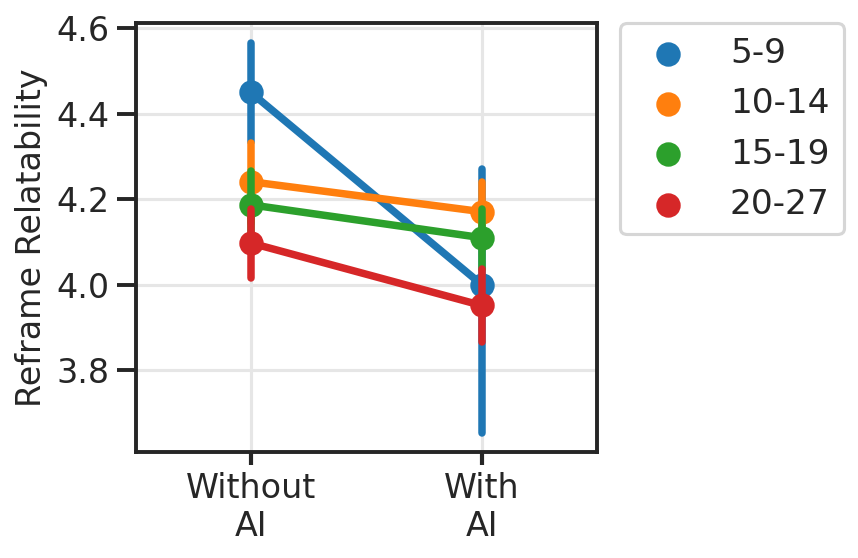

In [117]:
# PLot more_suggestions_btn vs. beelievable
g = sb.pointplot(data=output_df, x='condition_map', y='reframe_relatability', hue='phq_total_range')


axs = g.axes
axs.grid()
axs.set_ylabel('Reframe Relatability', fontsize=16)
axs.set_xlabel('', fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)

# axs.set_ylim([3.66, 3.94])

# axs.set_yticks(np.arange(1.6, 2.40, 0.04), minor=True)
# axs.set_yticks(np.arange(1.6, 2.41, 0.2), minor=False)

# axs.set_yticklabels(['25%', '30%', '35%', '40%', '45%'])

axs.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


fig = g.get_figure()
# fig.set_size_inches(3.5, 5)

fig.tight_layout()

# fig.savefig('Plots/ai-emotion_change.svg')

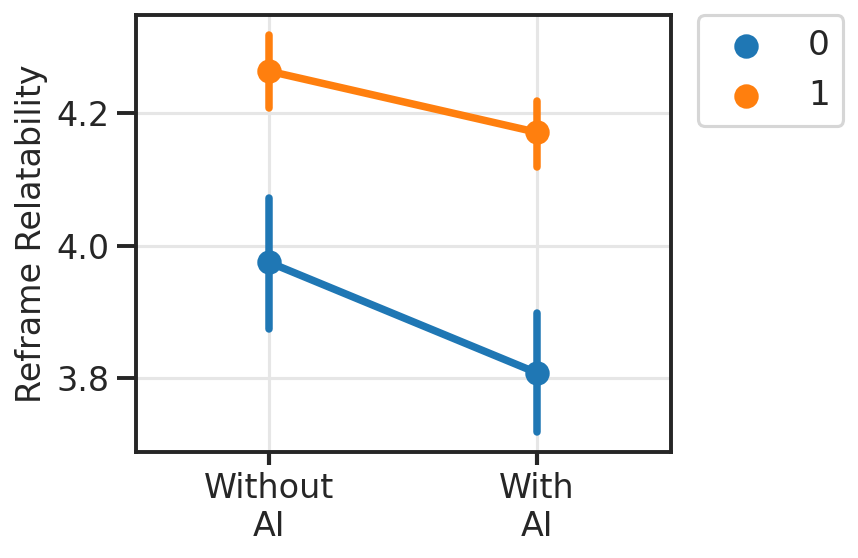

In [118]:
# PLot more_suggestions_btn vs. beelievable
g = sb.pointplot(data=output_df, x='condition_map', y='reframe_relatability', hue='hope_q_binary')


axs = g.axes
axs.grid()
axs.set_ylabel('Reframe Relatability', fontsize=16)
axs.set_xlabel('', fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)

# axs.set_ylim([3.66, 3.94])

# axs.set_yticks(np.arange(1.6, 2.40, 0.04), minor=True)
# axs.set_yticks(np.arange(1.6, 2.41, 0.2), minor=False)

# axs.set_yticklabels(['25%', '30%', '35%', '40%', '45%'])

axs.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


fig = g.get_figure()
# fig.set_size_inches(3.5, 5)

fig.tight_layout()

# fig.savefig('Plots/ai-emotion_change.svg')

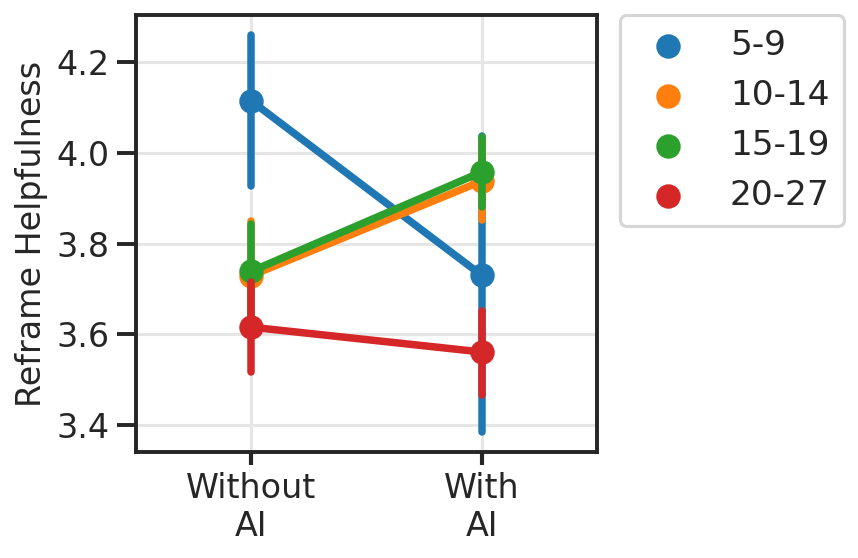

In [119]:
# PLot more_suggestions_btn vs. beelievable
g = sb.pointplot(data=output_df, x='condition_map', y='reframe_helpfulness', hue='phq_total_range')


axs = g.axes
axs.grid()
axs.set_ylabel('Reframe Helpfulness', fontsize=16)
axs.set_xlabel('', fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)

# axs.set_ylim([3.66, 3.94])

# axs.set_yticks(np.arange(1.6, 2.40, 0.04), minor=True)
# axs.set_yticks(np.arange(1.6, 2.41, 0.2), minor=False)

# axs.set_yticklabels(['25%', '30%', '35%', '40%', '45%'])

# legend outsirde the plot
axs.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = g.get_figure()
# fig.set_size_inches(3.5, 5)

fig.tight_layout()

# fig.savefig('Plots/ai-emotion_change.svg')

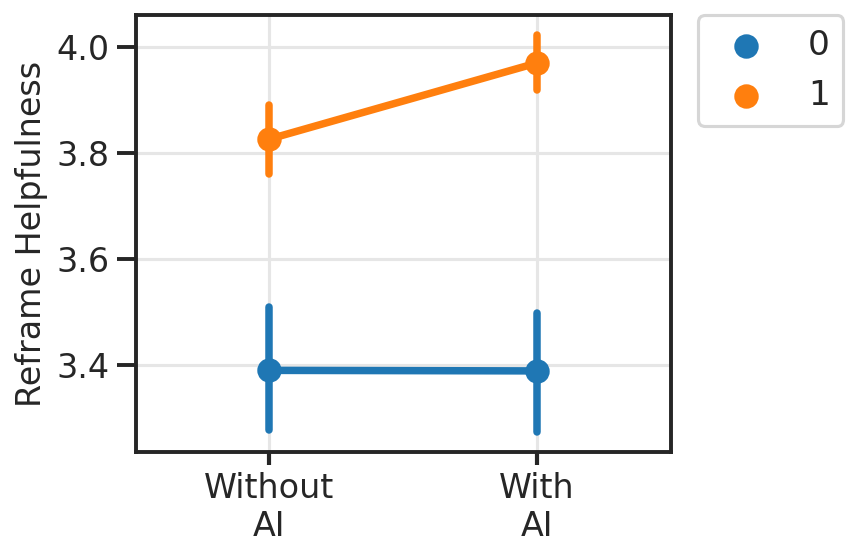

In [169]:
# PLot more_suggestions_btn vs. beelievable
g = sb.pointplot(data=output_df, x='condition_map', y='reframe_helpfulness', hue='hope_q_binary')


axs = g.axes
axs.grid()
axs.set_ylabel('Reframe Helpfulness', fontsize=16)
axs.set_xlabel('', fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)

# axs.set_ylim([3.66, 3.94])

# axs.set_yticks(np.arange(1.6, 2.40, 0.04), minor=True)
# axs.set_yticks(np.arange(1.6, 2.41, 0.2), minor=False)

# axs.set_yticklabels(['25%', '30%', '35%', '40%', '45%'])

# legend outsirde the plot
axs.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = g.get_figure()
# fig.set_size_inches(3.5, 5)

fig.tight_layout()

# fig.savefig('Plots/ai-emotion_change.svg')

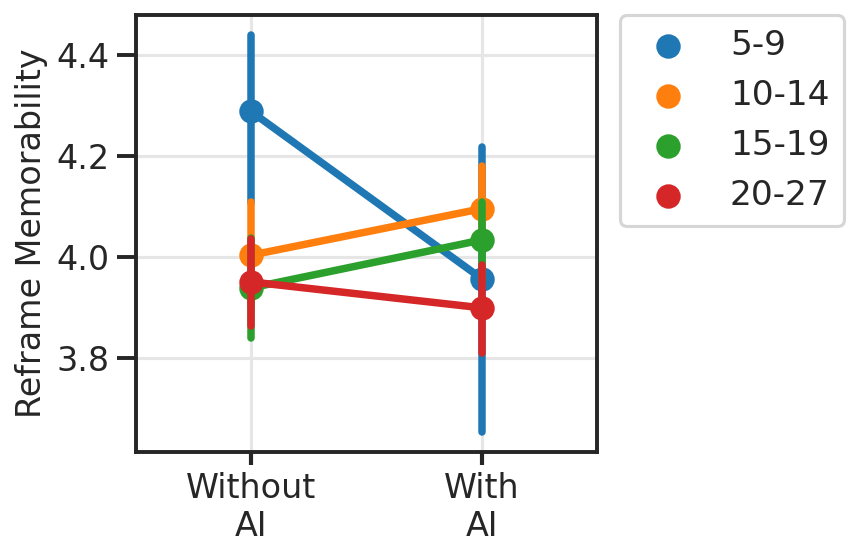

In [170]:
# PLot more_suggestions_btn vs. beelievable
g = sb.pointplot(data=output_df, x='condition_map', y='reframe_memorability', hue='phq_total_range')


axs = g.axes
axs.grid()
axs.set_ylabel('Reframe Memorability', fontsize=16)
axs.set_xlabel('', fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)

# axs.set_ylim([3.66, 3.94])

# axs.set_yticks(np.arange(1.6, 2.40, 0.04), minor=True)
# axs.set_yticks(np.arange(1.6, 2.41, 0.2), minor=False)

# axs.set_yticklabels(['25%', '30%', '35%', '40%', '45%'])

# legend outsirde the plot
axs.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = g.get_figure()
# fig.set_size_inches(3.5, 5)

fig.tight_layout()

# fig.savefig('Plots/ai-emotion_change.svg')

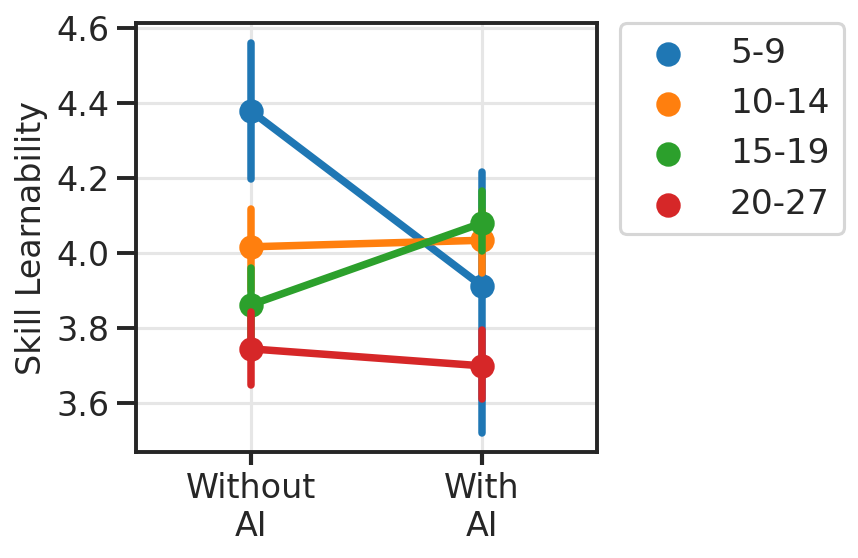

In [171]:
# PLot more_suggestions_btn vs. beelievable
g = sb.pointplot(data=output_df, x='condition_map', y='skill_learnability', hue='phq_total_range')


axs = g.axes
axs.grid()
axs.set_ylabel('Skill Learnability', fontsize=16)
axs.set_xlabel('', fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)

# axs.set_ylim([3.66, 3.94])

# axs.set_yticks(np.arange(1.6, 2.40, 0.04), minor=True)
# axs.set_yticks(np.arange(1.6, 2.41, 0.2), minor=False)

# axs.set_yticklabels(['25%', '30%', '35%', '40%', '45%'])

# legend outsirde the plot
axs.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = g.get_figure()
# fig.set_size_inches(3.5, 5)

fig.tight_layout()

# fig.savefig('Plots/ai-emotion_change.svg')

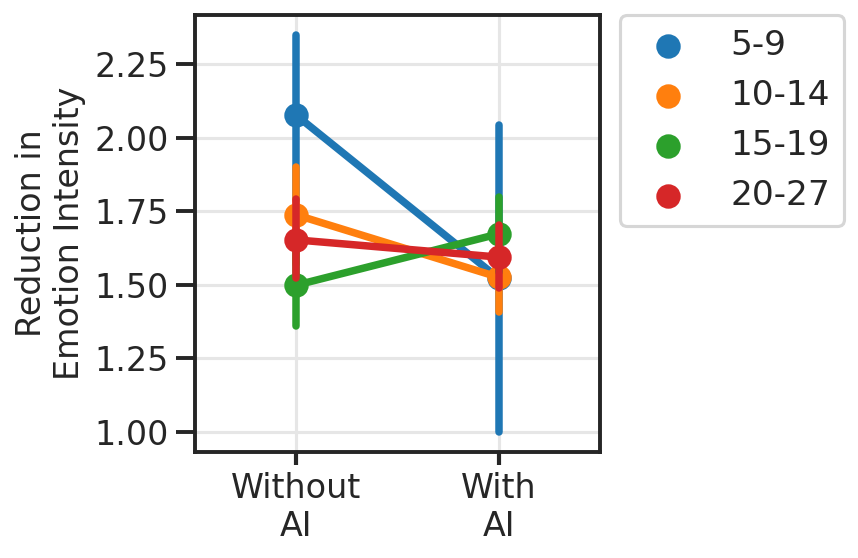

In [172]:
# PLot more_suggestions_btn vs. beelievable
g = sb.pointplot(data=output_df, x='condition_map', y='reduction_in_emotion_intensity', hue='phq_total_range')


axs = g.axes
axs.grid()
axs.set_ylabel('Reduction in\nEmotion Intensity', fontsize=16)
axs.set_xlabel('', fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)

# axs.set_ylim([3.66, 3.94])

# axs.set_yticks(np.arange(1.6, 2.40, 0.04), minor=True)
# axs.set_yticks(np.arange(1.6, 2.41, 0.2), minor=False)

# axs.set_yticklabels(['25%', '30%', '35%', '40%', '45%'])

axs.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = g.get_figure()
# fig.set_size_inches(3.5, 5)

fig.tight_layout()

# fig.savefig('Plots/ai-emotion_change.svg')

In [173]:
# group by age_range and condition_map, then compute mean and std for each group. rouynd of to 2 decimal places

output_df.groupby(['condition_map']).agg({'reframe_relatability': ['mean', 'std'], 'reframe_helpfulness': ['mean', 'std'], 'reframe_memorability': ['mean', 'std'], 'skill_learnability': ['mean', 'std'], 'reduction_in_emotion_intensity': ['mean', 'std'], 'reduction_in_belief': ['mean', 'std']}).round(4)

reframe_relatability         reframe_helpfulness          \
                              mean     std                mean     std   
condition_map                                                            
With\nAI                    4.0655  1.0244              3.7967  1.1674   
Without\nAI                 4.1706  0.9939              3.6905  1.2103   

              reframe_memorability         skill_learnability          \
                              mean     std               mean     std   
condition_map                                                           
With\nAI                    3.9969  1.0878             3.9185  1.1440   
Without\nAI                 3.9757  1.0682             3.8739  1.1539   

              reduction_in_emotion_intensity         reduction_in_belief  \
                                        mean     std                mean   
condition_map                                                              
With\nAI                              1.6006  1.5425              1.4494   
Without\nAI                           1.6460  1.6145              1.4092   

                       
                  std  
condition_map          
With\nAI       1.5373  
Without\nAI    1.5674

In [174]:
output_df.loc[output_df['gad7_total'] > 10].groupby(['condition_map']).agg({'reframe_relatability': ['mean', 'std'], 'reframe_helpfulness': ['mean', 'std'], 'reframe_memorability': ['mean', 'std'], 'skill_learnability': ['mean', 'std'], 'reduction_in_emotion_intensity': ['mean', 'std'], 'reduction_in_belief': ['mean', 'std']}).round(4)

reframe_relatability         reframe_helpfulness          \
                              mean     std                mean     std   
condition_map                                                            
With\nAI                    4.0331  1.0575              3.7289  1.2123   
Without\nAI                 4.1969  0.9796              3.7396  1.1940   

              reframe_memorability         skill_learnability          \
                              mean     std               mean     std   
condition_map                                                           
With\nAI                    3.9767  1.1177             3.8444  1.2015   
Without\nAI                 4.0106  1.0627             3.8918  1.1537   

              reduction_in_emotion_intensity         reduction_in_belief  \
                                        mean     std                mean   
condition_map                                                              
With\nAI                              1.5285  1.5166              1.3777   
Without\nAI                           1.7128  1.6707              1.4654   

                       
                  std  
condition_map          
With\nAI       1.5417  
Without\nAI    1.6149

In [175]:
output_df.columns

Index(['start_time', 'end_time', 'thought_record_id', 'email', 'condition_x',
       'reframe_relatability', 'reframe_helpfulness', 'reframe_memorability',
       'skill_learnability', 'belief_1', 'emotion_strength_1', 'belief_2',
       'emotion_strength_2', 'all_belief', 'all_emotion_strength',
       'emotion_strength', 'belief', 'reduction_in_belief',
       'reduction_in_emotion_intensity', 'condition_map_x', 'study_id',
       'condition_y', 'date_consent', 'consent_yn', 'consent_complete', 'age',
       'phq_total', 'phq9_complete', 'gad7_total', 'gad7_complete', 'hope_q',
       'hope_complete', 'cr_use_q', 'therapy_post_diy', 'talk', 'seekmh',
       'miscq_complete', 'phq_week_1', 'gad7_week_1', 'phq_week_2',
       'gad7_week_2', 'phq_week_3', 'gad7_week_3', 'phq_week_4', 'gad7_week_4',
       'phq_total_range', 'gad7_total_range', 'condition_map_y', 'gender',
       'race', 'age_range', 'tool_went_well', 'tool_didnt_well',
       'tool_other_comments', 'condition_map', 'phq

In [176]:
## Time Take

In [177]:
thought_records_with_outcomes_df['time_taken'] = thought_records_with_outcomes_df.apply(lambda row: (row['end_time'] - row['start_time']).total_seconds(), axis=1)

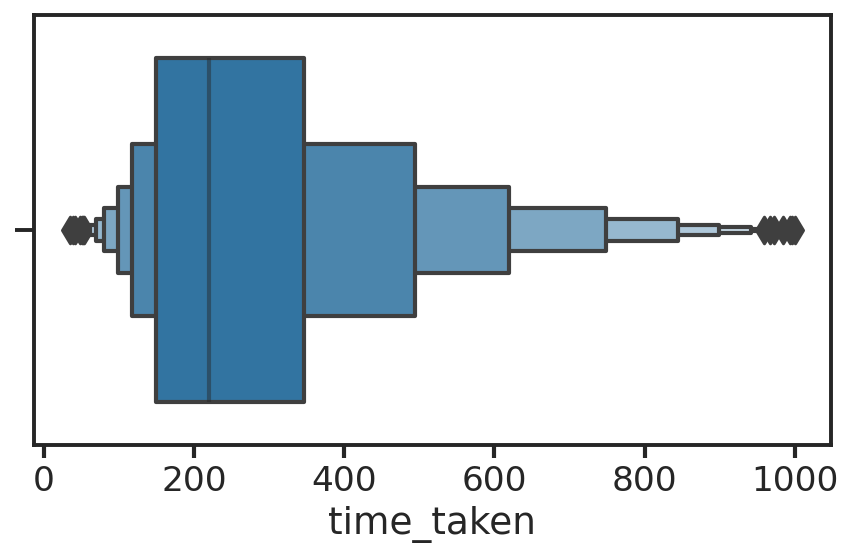

In [178]:
# plot time taken using boxenplot
g = sb.boxenplot(data=thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['time_taken'] < 1000],  x='time_taken')

Text(0, 0.5, '')

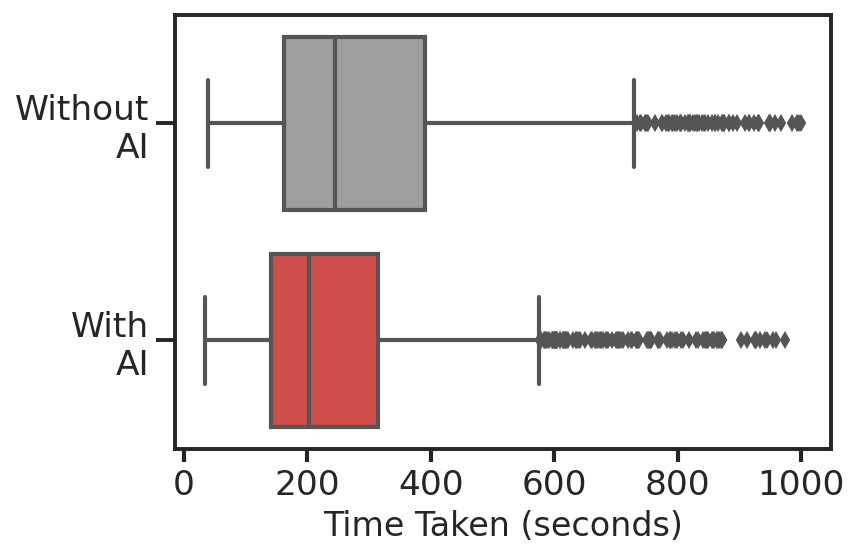

In [179]:
g = sb.boxplot(data=thought_records_with_outcomes_df.loc[thought_records_with_outcomes_df['time_taken'] < 1000],  x='time_taken', y='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes

axs.set_xlabel('Time Taken (seconds)', fontsize=16)
axs.set_ylabel('', fontsize=16)

In [179]:
Q = """SELECT username,study_id,condition,week_1_start,survey_1_status FROM study_userdetails ORDER BY study_userdetails.id ASC"""

cur.execute(Q)
records = cur.fetchall()

userdetails_df = pd.DataFrame(records, columns = ['username','study_id', 'condition', 'week_1_start', 'survey_1_status'])

userdetails_df['study_id'] = userdetails_df['study_id'].astype('int')

discard_usernames = userdetails_df.loc[userdetails_df['study_id'] < 70]['username'].tolist() #+ userdetails_df.loc[userdetails_df['survey_1_status'] != 1]['username'].tolist()

# create a dict of study_id to condition from userdetails_df
study_id_to_condition = dict(zip(userdetails_df['study_id'], userdetails_df['condition']))

username_to_week_1_start = dict(zip(userdetails_df['username'], userdetails_df['week_1_start']))

In [180]:
thought_records_with_outcomes_df['date_started'] = thought_records_with_outcomes_df['username'].map(username_to_week_1_start)

# compute week_no
# week_no = (curr_date - date_started).days // 7 + 1
thought_records_with_outcomes_df['date_started'] = pd.to_datetime(thought_records_with_outcomes_df['date_started'])

thought_records_with_outcomes_df['start_time'] = pd.to_datetime(thought_records_with_outcomes_df['start_time'])

thought_records_with_outcomes_df['week_no'] = thought_records_with_outcomes_df.apply(lambda row: (row['start_time'] - row['date_started']).days // 7 + 1, axis=1)

Text(0.5, 1.0, 'Overall')

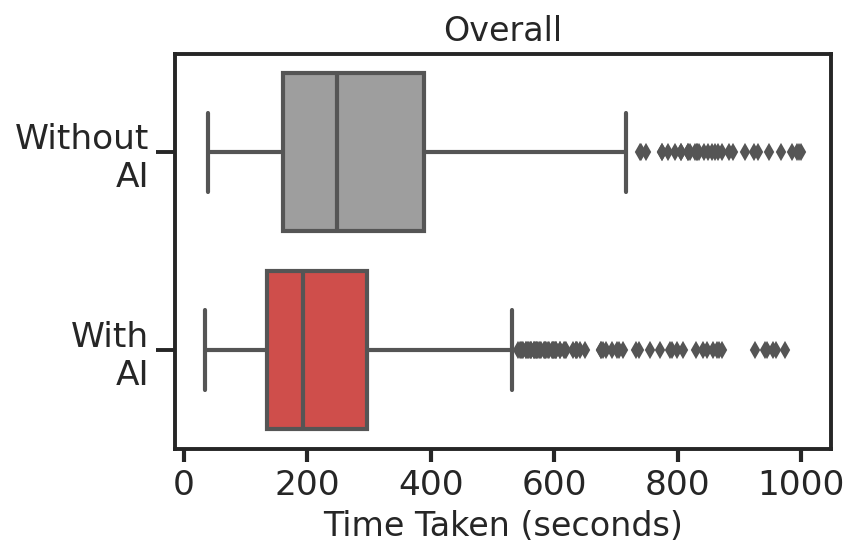

In [181]:
g = sb.boxplot(data=thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['time_taken'] < 1000) ],  x='time_taken', y='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes

axs.set_xlabel('Time Taken (seconds)', fontsize=16)
axs.set_ylabel('', fontsize=16)

axs.set_title('Overall', fontsize=16)

Text(0.5, 1.0, 'Week 1')

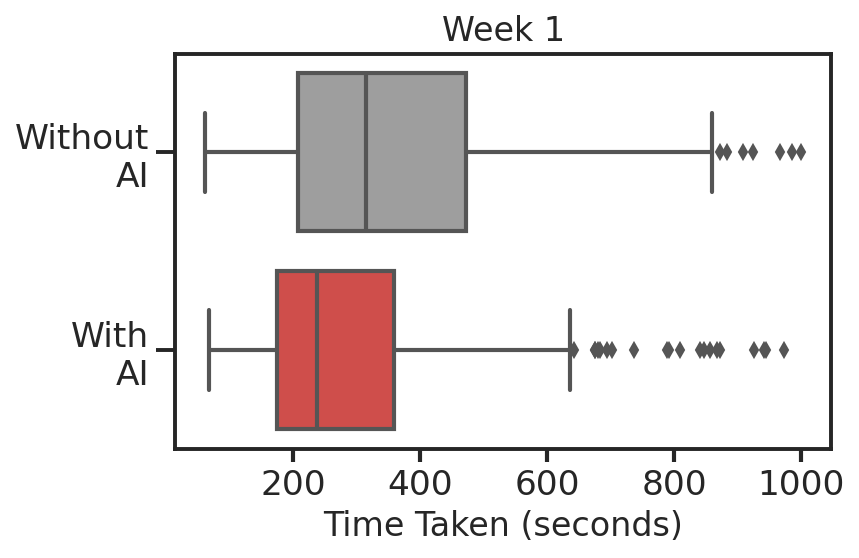

In [182]:
g = sb.boxplot(data=thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['time_taken'] < 1000) & (thought_records_with_outcomes_df['week_no'] == 1)],  x='time_taken', y='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes

axs.set_xlabel('Time Taken (seconds)', fontsize=16)
axs.set_ylabel('', fontsize=16)

axs.set_title('Week 1', fontsize=16)

Text(0.5, 1.0, 'Week 2')

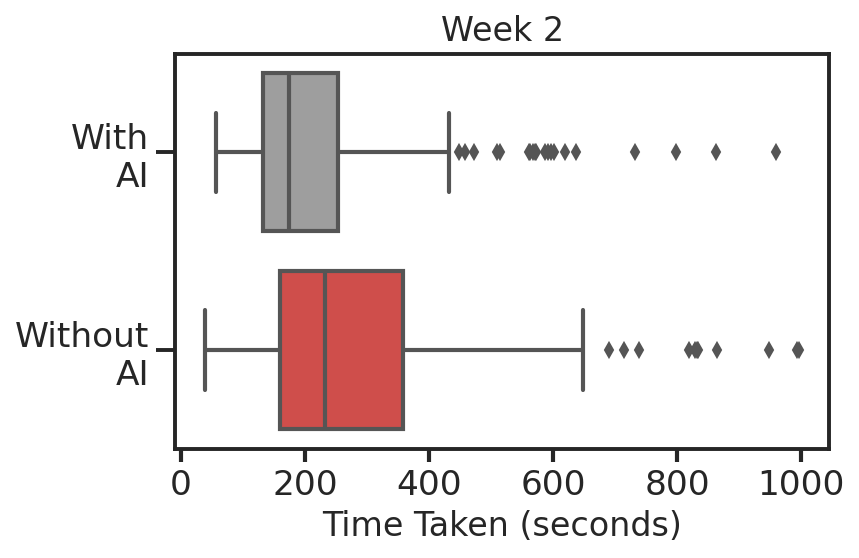

In [183]:
g = sb.boxplot(data=thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['time_taken'] < 1000) & (thought_records_with_outcomes_df['week_no'] == 2)],  x='time_taken', y='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes

axs.set_xlabel('Time Taken (seconds)', fontsize=16)
axs.set_ylabel('', fontsize=16)

axs.set_title('Week 2', fontsize=16)

Text(0.5, 1.0, 'Week 3')

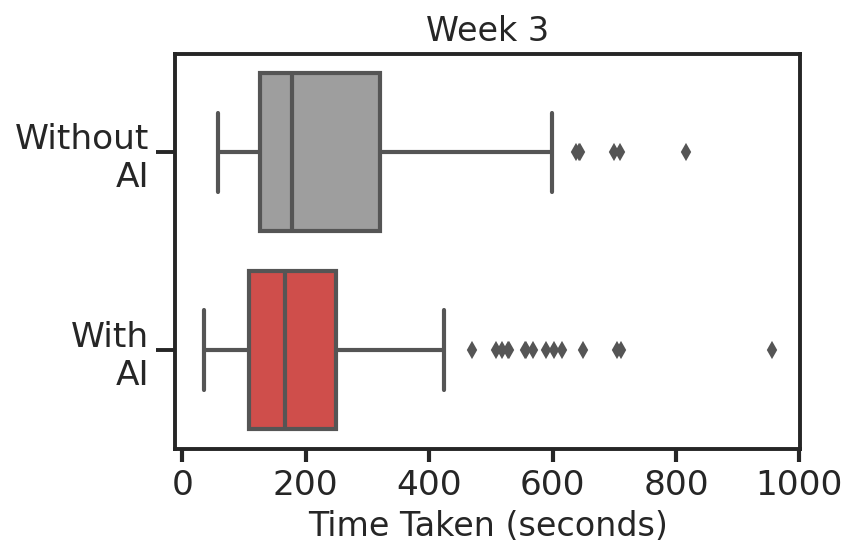

In [184]:
g = sb.boxplot(data=thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['time_taken'] < 1000) & (thought_records_with_outcomes_df['week_no'] == 3)],  x='time_taken', y='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes

axs.set_xlabel('Time Taken (seconds)', fontsize=16)
axs.set_ylabel('', fontsize=16)

axs.set_title('Week 3', fontsize=16)

Text(0.5, 1.0, 'Week 4')

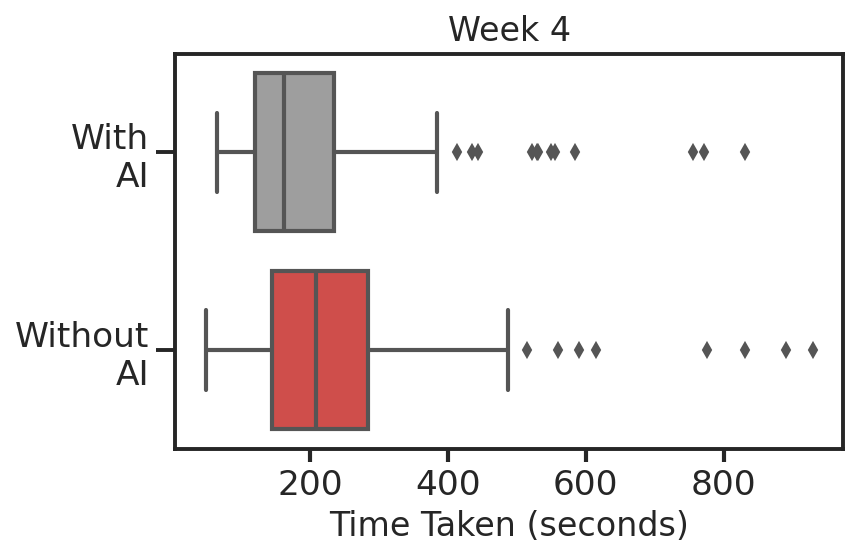

In [185]:
g = sb.boxplot(data=thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['time_taken'] < 1000) & (thought_records_with_outcomes_df['week_no'] == 4)],  x='time_taken', y='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes

axs.set_xlabel('Time Taken (seconds)', fontsize=16)
axs.set_ylabel('', fontsize=16)

axs.set_title('Week 4', fontsize=16)

In [186]:
g = sb.boxplot(data=thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['num_words'] < 100)],  x='num_words', y='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes

axs.set_xlabel('Number of words', fontsize=16)
axs.set_ylabel('', fontsize=16)

axs.set_title('Overall', fontsize=16)

KeyError: 'num_words'

Text(0.5, 1.0, 'Week 1')

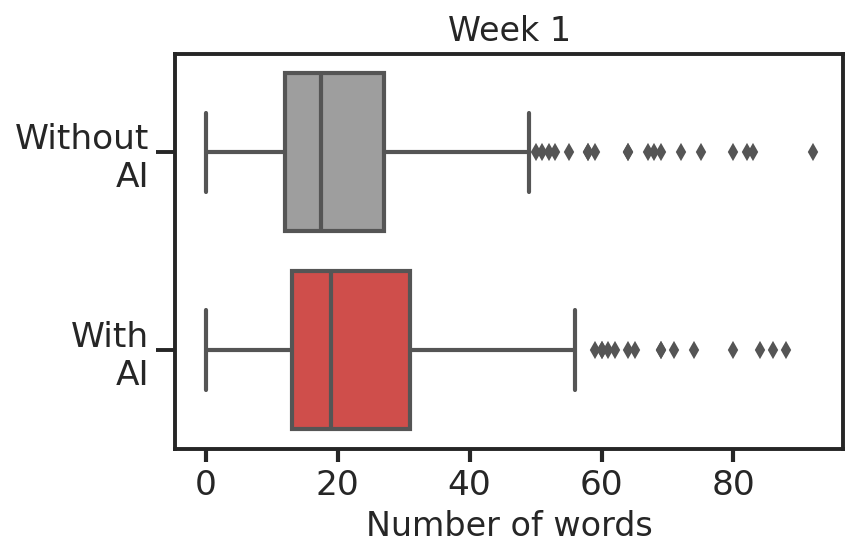

In [ ]:
g = sb.boxplot(data=thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['num_words'] < 100) & (thought_records_with_outcomes_df['week_no'] == 1)],  x='num_words', y='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes

axs.set_xlabel('Number of words', fontsize=16)
axs.set_ylabel('', fontsize=16)

axs.set_title('Week 1', fontsize=16)

Text(0.5, 1.0, 'Week 2')

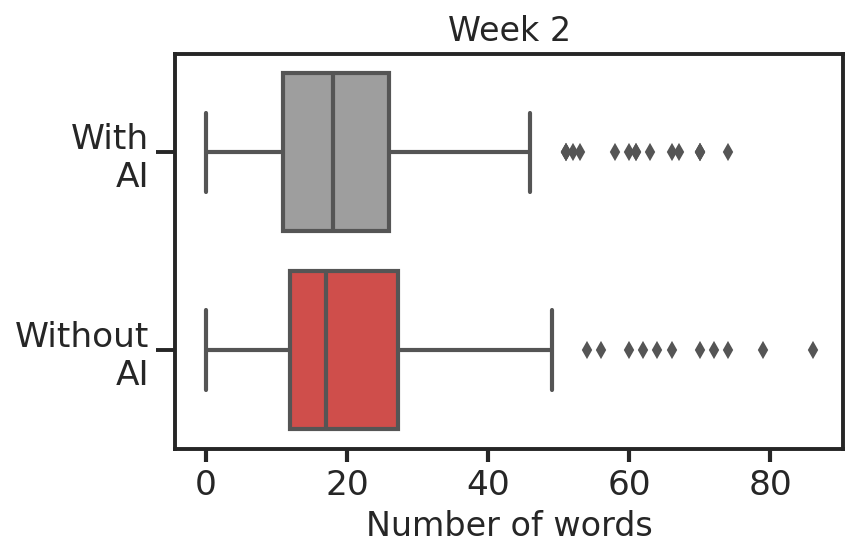

In [ ]:
g = sb.boxplot(data=thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['num_words'] < 100) & (thought_records_with_outcomes_df['week_no'] == 2)],  x='num_words', y='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes

axs.set_xlabel('Number of words', fontsize=16)
axs.set_ylabel('', fontsize=16)

axs.set_title('Week 2', fontsize=16)

Text(0.5, 1.0, 'Week 3')

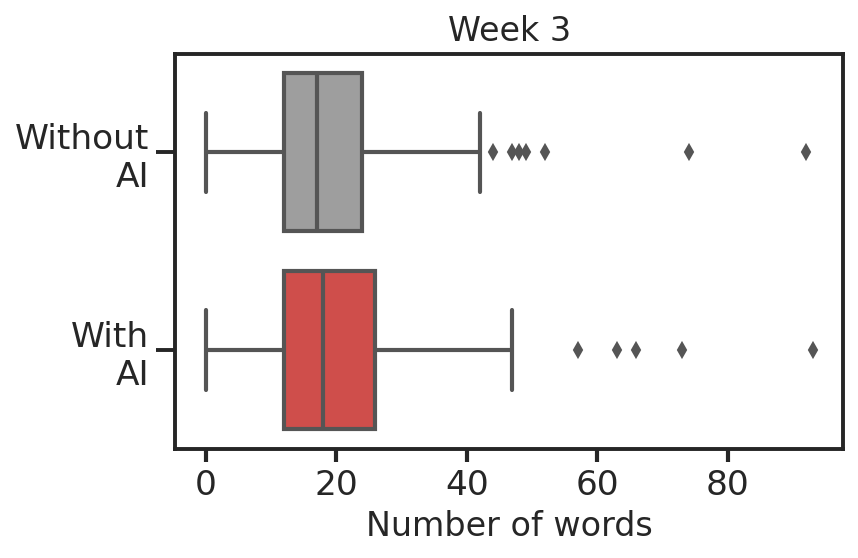

In [ ]:
g = sb.boxplot(data=thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['num_words'] < 100) & (thought_records_with_outcomes_df['week_no'] == 3)],  x='num_words', y='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes

axs.set_xlabel('Number of words', fontsize=16)
axs.set_ylabel('', fontsize=16)

axs.set_title('Week 3', fontsize=16)

Text(0.5, 1.0, 'Week 4')

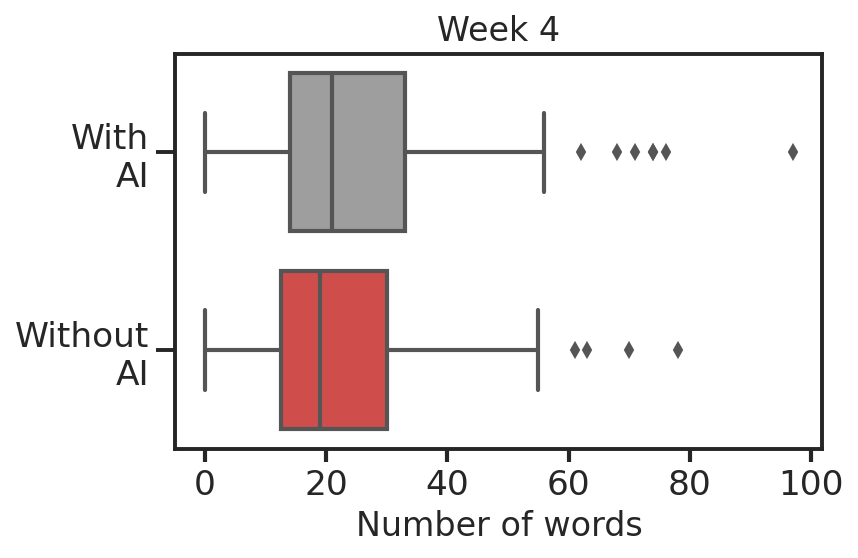

In [ ]:
g = sb.boxplot(data=thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['num_words'] < 100) & (thought_records_with_outcomes_df['week_no'] == 4)],  x='num_words', y='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes

axs.set_xlabel('Number of words', fontsize=16)
axs.set_ylabel('', fontsize=16)

axs.set_title('Week 4', fontsize=16)

In [192]:
thought_records_with_emotion_outcomes_df['time_taken'] = thought_records_with_emotion_outcomes_df.apply(lambda row: (row['end_time'] - row['start_time']).total_seconds(), axis=1)

In [193]:
# quartiles -- qcut
# bins -- cut

thought_records_with_outcomes_df['time_taken_quartiles'] = pd.qcut(thought_records_with_outcomes_df['time_taken'], 4, labels=False)

In [194]:
user_mean_time_taken = thought_records_with_outcomes_df.groupby(['username']).agg({'time_taken': ['mean', 'std']}).round(2)

user_mean_time_taken = user_mean_time_taken.reset_index()

In [195]:
user_mean_time_taken = user_mean_time_taken.rename(columns={'mean': 'mean_time_taken', 'std': 'std_time_taken'})

In [196]:
# user_mean_time_taken to dict
username_to_mean_time_taken = dict(zip(user_mean_time_taken['username'], user_mean_time_taken['time_taken']['mean_time_taken']))

In [197]:
# all time taken

all_times = user_mean_time_taken['time_taken']['mean_time_taken'].values.tolist()

In [198]:
# compute quantiles

all_times_quantiles = np.quantile(all_times, [0.25, 0.5, 0.75])

In [199]:
all_times_quantiles

array([201.83, 294.32, 470.05])

In [200]:
# assign quantiles to username_to_mean_time_taken

username_to_mean_time_taken_quantiles = {}
for username in username_to_mean_time_taken:
	if username_to_mean_time_taken[username] <= all_times_quantiles[0]:
		username_to_mean_time_taken_quantiles[username] = 'Q1'
	elif username_to_mean_time_taken[username] <= all_times_quantiles[1]:
		username_to_mean_time_taken_quantiles[username] = 'Q2'
	elif username_to_mean_time_taken[username] <= all_times_quantiles[2]:
		username_to_mean_time_taken_quantiles[username] = 'Q3'
	else:
		username_to_mean_time_taken_quantiles[username] = 'Q4'


In [201]:
thought_records_with_outcomes_df.columns

Index(['start_time', 'end_time', 'thought_record_id', 'username',
       'remove_negative_feeling', 'skip_step', 'prompt_to_use',
       'more_suggestions_btn', 'multiple_cognitive_distortions', 'Human\n+AI',
       'emotion_questions', 'personalize', 'readable', 'psychoeducation',
       'believable', 'stickiness', 'helpfulness', 'learnability', 'belief_1',
       'emotion_strength_1', 'belief_2', 'emotion_strength_2', 'condition',
       'condition_map', 'time_taken', 'date_started', 'week_no',
       'time_taken_quartiles'],
      dtype='object')

In [202]:
# map quantile to thought_records_with_outcomes_df

thought_records_with_outcomes_df['mean_time_taken_quantiles'] = thought_records_with_outcomes_df['username'].map(username_to_mean_time_taken_quantiles)

In [203]:
thought_records_with_outcomes_df.groupby(['mean_time_taken_quantiles', 'condition_map',]).agg({'believable': ['mean', 'std'], 'helpfulness': ['mean', 'std'], 'stickiness': ['mean', 'std'], 'learnability': ['mean', 'std'],}).round(4)

believable         helpfulness  \
                                              mean     std        mean   
mean_time_taken_quantiles condition_map                                  
Q1                        With\nAI          4.0428  0.9615      3.8899   
                          Without\nAI       4.3085  0.9189      3.9453   
Q2                        With\nAI          4.1175  1.0105      3.7968   
                          Without\nAI       4.0160  1.1429      3.5882   
Q3                        With\nAI          3.9267  1.1854      3.3665   
                          Without\nAI       4.1000  1.1017      3.4227   
Q4                        With\nAI          4.1471  0.9765      3.7892   
                          Without\nAI       4.2529  0.8807      3.6576   

                                                stickiness          \
                                            std       mean     std   
mean_time_taken_quantiles condition_map                              
Q1                        With\nAI       1.0625     4.0581  1.0241   
                          Without\nAI    1.0964     4.0149  1.0746   
Q2                        With\nAI       1.2454     4.0571  1.1044   
                          Without\nAI    1.3061     3.9519  1.1278   
Q3                        With\nAI       1.3886     3.8115  1.2423   
                          Without\nAI    1.3202     3.7136  1.2441   
Q4                        With\nAI       1.1184     3.9118  1.0420   
                          Without\nAI    1.1590     3.9728  1.0247   

                                        learnability          
                                                mean     std  
mean_time_taken_quantiles condition_map                       
Q1                        With\nAI            4.0795  1.0331  
                          Without\nAI         4.0000  1.1225  
Q2                        With\nAI            3.8984  1.1901  
                          Without\nAI         3.9358  1.1622  
Q3                        With\nAI            3.6649  1.3622  
                          Without\nAI         3.5682  1.3682  
Q4                        With\nAI            3.8775  1.0781  
                          Without\nAI         3.9105  1.0806

In [204]:
print('Time Taken...')


print('believable Q1:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q1')]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q1')]['believable']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q1')]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q1')]['believable']))
print('believable Q2:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q2')]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q2')]['believable']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q2')]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q2')]['believable']))
print('believable Q3:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q3')]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q3')]['believable']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q3')]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q3')]['believable']))
print('believable Q4:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q4')]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q4')]['believable']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q4')]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q4')]['believable']))

Time Taken...
believable Q1: -0.28094207500772367 Ttest_indResult(statistic=-3.134524938910584, pvalue=0.0018174123388891546)
believable Q2: 0.09552352004928617 Ttest_indResult(statistic=1.0347478661075848, pvalue=0.30128687168029156)
believable Q3: -0.15183952685515234 Ttest_indResult(statistic=-1.535295421846869, pvalue=0.12548446097380167)
believable Q4: -0.11452775041503663 Ttest_indResult(statistic=-1.221354995189061, pvalue=0.22257858745536716)


In [205]:
print('Time Taken...')

print('helpfulness Q1:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q1')]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q1')]['helpfulness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q1')]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q1')]['helpfulness']))
print('helpfulness Q2:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q2')]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q2')]['helpfulness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q2')]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q2')]['helpfulness']))
print('helpfulness Q3:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q3')]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q3')]['helpfulness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q3')]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q3')]['helpfulness']))
print('helpfulness Q4:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q4')]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q4')]['helpfulness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q4')]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q4')]['helpfulness']))

Time Taken...
helpfulness Q1: -0.05147829184789309 Ttest_indResult(statistic=-0.5743532349339352, pvalue=0.5659743284585614)
helpfulness Q2: 0.16446447801880257 Ttest_indResult(statistic=1.7815430963248433, pvalue=0.07543064789219056)
helpfulness Q3: -0.041582372471120906 Ttest_indResult(statistic=-0.42045195613224373, pvalue=0.6743761338855538)
helpfulness Q4: 0.11533886643620837 Ttest_indResult(statistic=1.230004956447761, pvalue=0.2193252952940994)


In [206]:
print('Time Taken...')
print('stickiness Q1:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q1')]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q1')]['stickiness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q1')]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q1')]['stickiness']))
print('stickiness Q2:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q2')]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q2')]['stickiness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q2')]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q2')]['stickiness']))
print('stickiness Q3:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q3')]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q3')]['stickiness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q3')]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q3')]['stickiness']))
print('stickiness Q4:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q4')]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q4')]['stickiness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q4')]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q4')]['stickiness']))

Time Taken...
stickiness Q1: 0.04137523954774764 Ttest_indResult(statistic=0.4616315310273435, pvalue=0.6445364277348111)
stickiness Q2: 0.0945715490337792 Ttest_indResult(statistic=1.0244357463659364, pvalue=0.3061248711300903)
stickiness Q3: 0.07873105770871261 Ttest_indResult(statistic=0.7960735584526523, pvalue=0.4264510829073097)
stickiness Q4: -0.05908386812034293 Ttest_indResult(statistic=-0.6300863956758398, pvalue=0.5289515982456312)


In [207]:
print('Time Taken...')
print('learnability Q1:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q1')]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q1')]['learnability']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q1')]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q1')]['learnability']))
print('learnability Q2:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q2')]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q2')]['learnability']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q2')]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q2')]['learnability']))
print('learnability Q3:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q3')]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q3')]['learnability']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q3')]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q3')]['learnability']))
print('learnability Q4:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q4')]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q4')]['learnability']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q4')]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_time_taken_quantiles'] == 'Q4')]['learnability']))

Time Taken...
learnability Q1: 0.07445042690647515 Ttest_indResult(statistic=0.8306577782785652, pvalue=0.40654385501135903)
learnability Q2: -0.031713656395249624 Ttest_indResult(statistic=-0.34353464219620805, pvalue=0.7313406890455508)
learnability Q3: 0.07084954226640211 Ttest_indResult(statistic=0.7163811698736359, pvalue=0.47416485781886397)
learnability Q4: -0.030620641443778296 Ttest_indResult(statistic=-0.326546825967706, pvalue=0.7441595115268506)


In [120]:
DEFAULT_THOUGHTS = ["no one cares about me", "i'm a failure", "i'll never be able to do anything", "i am scared something bad will happen to people i love", "i will go crazy if i don't control my racing thoughts", "i'm worthless"]

Q = """SELECT study_thoughtrecord.created_at, study_outcome.updated_at, study_thoughtrecord.thought_record_id, username, thought, situation, study_emotion.emotion, thinking_trap_selected, reframe_selected, reframe_final, believable, stickiness, helpfulness, learnability
FROM study_thoughtrecord, study_thought, study_situation, study_thinking_trap_selected, study_reframe_selected, study_reframe_final, study_outcome, study_emotion
WHERE study_thoughtrecord.thought_record_id = study_thought.thought_record_id AND study_thoughtrecord.thought_record_id = study_situation.thought_record_id AND study_thoughtrecord.thought_record_id = study_thinking_trap_selected.thought_record_id AND study_thoughtrecord.thought_record_id = study_reframe_selected.thought_record_id AND study_thoughtrecord.thought_record_id = study_reframe_selected.thought_record_id AND study_thoughtrecord.thought_record_id = study_emotion.thought_record_id AND study_thought.thought_id = study_situation.thought_id AND study_reframe_selected.reframe_selected_id = study_reframe_final.reframe_selected_id AND study_reframe_final.reframe_final_id = study_outcome.reframe_final_id
ORDER BY study_thoughtrecord.thought_record_id ASC"""

cur.execute(Q)
records = cur.fetchall()

thought_situations_df = pd.DataFrame(records, columns=['start_time',
								'end_time',
								'thought_record_id', \
								'username', \
								'thought', \
								'situation', \
								'emotion', \
								'thinking_trap_selected', \
								'reframe_selected_or_added', \
								'reframe_final', \
								'believable', 'stickiness', 'helpfulness', 'learnability'])

print(len(thought_situations_df))

# sort by start_time
thought_situations_df = thought_situations_df.sort_values(by=['start_time'])

# deduplicate
thought_situations_df = thought_situations_df.drop_duplicates(subset=['thought_record_id'], keep='last')

# merge with thought_records_with_outcomes_df
thought_records_with_outcomes_df = pd.merge(thought_records_with_outcomes_df, thought_situations_df[['thought_record_id', 'thought', 'situation']], on='thought_record_id', how='left')

# lowercase thought
thought_records_with_outcomes_df['thought'] = thought_records_with_outcomes_df['thought'].str.lower()

# check if thought in default thoughts
thought_records_with_outcomes_df['default_thought'] = thought_records_with_outcomes_df['thought'].isin(DEFAULT_THOUGHTS)

# only keep non-default thoughts
# thought_records_with_outcomes_df = thought_records_with_outcomes_df.loc[~thought_records_with_outcomes_df['default_thought']]


3718


In [121]:
thought_records_with_outcomes_df = pd.merge(thought_records_with_outcomes_df, thought_situations_df[['thought_record_id', 'thinking_trap_selected']], on='thought_record_id', how='left')


In [122]:
# situation NA to ''

thought_records_with_outcomes_df['situation'] = thought_records_with_outcomes_df['situation'].fillna('')


thought_records_with_outcomes_df['thought'] = thought_records_with_outcomes_df['thought'].fillna('')

In [123]:
# num_words in thoughts and situations

thought_records_with_outcomes_df['num_words'] = thought_records_with_outcomes_df['thought'].apply(lambda x: len(x.split())) + thought_records_with_outcomes_df['situation'].apply(lambda x: len(x.split()))

In [124]:
num_words_quantiles = np.quantile(thought_records_with_outcomes_df['num_words'], [0.25, 0.5, 0.75])

In [125]:
# usernames mean words

user_mean_words = thought_records_with_outcomes_df.groupby(['username']).agg({'num_words': ['mean', 'std']}).round(2)

In [126]:
# convert to dict

username_to_mean_words = dict(zip(user_mean_words.index, user_mean_words['num_words']['mean']))

In [214]:
num_words_quantiles = np.quantile(user_mean_words['num_words']['mean'], [0.25, 0.5, 0.75]) 

In [215]:
num_words_quantiles

array([13.885, 18.33 , 27.8  ])

In [216]:
# assign quantiles to username_to_mean_words

username_to_mean_words_quantiles = {}

for username in username_to_mean_words:
	if username_to_mean_words[username] <= num_words_quantiles[0]:
		username_to_mean_words_quantiles[username] = 'Q1'
	elif username_to_mean_words[username] <= num_words_quantiles[1]:
		username_to_mean_words_quantiles[username] = 'Q2'
	elif username_to_mean_words[username] <= num_words_quantiles[2]:
		username_to_mean_words_quantiles[username] = 'Q3'
	else:
		username_to_mean_words_quantiles[username] = 'Q4'

In [217]:
# map quantiles to thought_records_with_outcomes_df

thought_records_with_outcomes_df['mean_words_quantiles'] = thought_records_with_outcomes_df['username'].map(username_to_mean_words_quantiles)

In [218]:
thought_records_with_outcomes_df.groupby(['mean_words_quantiles', 'condition_map',]).agg({'believable': ['mean', 'std'], 'helpfulness': ['mean', 'std'], 'stickiness': ['mean', 'std'], 'learnability': ['mean', 'std'],}).round(4)

believable         helpfulness          \
                                         mean     std        mean     std   
mean_words_quantiles condition_map                                          
Q1                   With\nAI          4.0042  1.0127      3.5720  1.2578   
                     Without\nAI       4.2278  0.9562      3.8056  1.1584   
Q2                   With\nAI          3.9958  1.0042      3.8193  1.0737   
                     Without\nAI       4.0429  1.0246      3.5150  1.2356   
Q3                   With\nAI          4.1176  1.0694      3.8039  1.3044   
                     Without\nAI       4.2069  0.9849      3.7328  1.1611   
Q4                   With\nAI          4.1201  1.0122      3.7727  1.1753   
                     Without\nAI       4.2409  1.0689      3.5773  1.3442   

                                   stickiness         learnability          
                                         mean     std         mean     std  
mean_words_quantiles condition_map                                          
Q1                   With\nAI          3.8814  1.0929       3.6653  1.2725  
                     Without\nAI       4.1944  0.9460       3.9389  1.1145  
Q2                   With\nAI          4.1134  0.9139       4.0462  1.0644  
                     Without\nAI       3.8326  1.0096       3.7382  1.1504  
Q3                   With\nAI          3.8235  1.3237       3.9647  1.1850  
                     Without\nAI       3.8836  1.1507       4.0474  1.0537  
Q4                   With\nAI          4.0942  1.0021       3.9416  1.1081  
                     Without\nAI       3.7955  1.2924       3.6864  1.4035

In [219]:
print('Number of Words...')

print('believable Q1:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q1')]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q1')]['believable']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q1')]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q1')]['believable']))
print('believable Q2:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q2')]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q2')]['believable']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q2')]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q2')]['believable']))
print('believable Q3:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q3')]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q3')]['believable']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q3')]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q3')]['believable']))
print('believable Q4:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q4')]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q4')]['believable']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q4')]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q4')]['believable']))

Number of Words...
believable Q1: -0.22610642710696602 Ttest_indResult(statistic=-2.2848542201136612, pvalue=0.02282648065177402)
believable Q2: -0.046453058869936246 Ttest_indResult(statistic=-0.5040461506659324, pvalue=0.6144656385137592)
believable Q3: -0.08664973597649529 Ttest_indResult(statistic=-0.955029629846804, pvalue=0.3400384741034731)
believable Q4: -0.11655817652792247 Ttest_indResult(statistic=-1.3204211800877559, pvalue=0.18726868507089284)


In [220]:
print('Number of Words...')
print('helpfulness Q1:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q1')]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q1')]['helpfulness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q1')]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q1')]['helpfulness']))
print('helpfulness Q2:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q2')]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q2')]['helpfulness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q2')]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q2')]['helpfulness']))
print('helpfulness Q3:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q3')]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q3')]['helpfulness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q3')]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q3')]['helpfulness']))
print('helpfulness Q4:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q4')]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q4')]['helpfulness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q4')]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q4')]['helpfulness']))

Number of Words...
helpfulness Q1: -0.19207122890553655 Ttest_indResult(statistic=-1.9409212004381435, pvalue=0.05294621576479094)
helpfulness Q2: 0.26309657701421935 Ttest_indResult(statistic=2.8547703880750355, pvalue=0.004497633410483565)
helpfulness Q3: 0.05747079328374974 Ttest_indResult(statistic=0.6334273245987746, pvalue=0.5267532056177183)
helpfulness Q4: 0.15656356792334486 Ttest_indResult(statistic=1.7736194686141875, pvalue=0.07670462825835306)


In [221]:
print('Number of Words...')
print('stickiness Q1:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q1')]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q1')]['stickiness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q1')]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q1')]['stickiness']))
print('stickiness Q2:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q2')]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q2')]['stickiness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q2')]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q2')]['stickiness']))
print('stickiness Q3:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q3')]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q3')]['stickiness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q3')]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q3')]['stickiness']))
print('stickiness Q4:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q4')]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q4')]['stickiness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q4')]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q4')]['stickiness']))

Number of Words...
stickiness Q1: -0.3033966928749044 Ttest_indResult(statistic=-3.065889028248668, pvalue=0.002312450459999313)
stickiness Q2: 0.29179401568570595 Ttest_indResult(statistic=3.1661564162122664, pvalue=0.0016452922878950112)
stickiness Q3: -0.04829325316687776 Ttest_indResult(statistic=-0.5322749939892744, pvalue=0.5947792982667388)
stickiness Q4: 0.2638633762216108 Ttest_indResult(statistic=2.989157869409648, pvalue=0.0029282919661491073)


In [222]:
print('Number of Words...')
print('learnability Q1:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q1')]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q1')]['learnability']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q1')]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q1')]['learnability']))
print('learnability Q2:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q2')]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q2')]['learnability']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q2')]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q2')]['learnability']))
print('learnability Q3:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q3')]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q3')]['learnability']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q3')]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q3')]['learnability']))
print('learnability Q4:', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q4')]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q4')]['learnability']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q4')]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['mean_words_quantiles'] == 'Q4')]['learnability']))

Number of Words...
learnability Q1: -0.22675391515023366 Ttest_indResult(statistic=-2.2913972264627605, pvalue=0.022441907037380922)
learnability Q2: 0.2780583921169894 Ttest_indResult(statistic=3.0171158932578446, pvalue=0.002690678748290514)
learnability Q3: -0.07355813815963679 Ttest_indResult(statistic=-0.8107376285355804, pvalue=0.417914006756706)
learnability Q4: 0.20586214484992826 Ttest_indResult(statistic=2.3320949618066518, pvalue=0.02007218115377649)


In [223]:
print('Default Thought Distribution')

thought_records_with_outcomes_df['default_thought'].value_counts(normalize=True)

Default Thought Distribution


False    0.687697
True     0.312303
Name: default_thought, dtype: float64

In [224]:
print('Deafult Thought...')

print('believable (default thought):', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['default_thought'] == 1)]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['default_thought'] == 1)]['believable']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['default_thought'] == 1)]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['default_thought'] == 1)]['believable']))
print('believable (user thought):', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['default_thought'] == 0)]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['default_thought'] == 0)]['believable']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['default_thought'] == 0)]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['default_thought'] == 0)]['believable']))

Deafult Thought...
believable (default thought): -0.11500199123958925 Ttest_indResult(statistic=-1.3886527219263587, pvalue=0.16546060428315207)
believable (user thought): -0.10350699299352335 Ttest_indResult(statistic=-1.8670959187156846, pvalue=0.06211209125601476)


In [225]:
print('Deafult Thought...')

print('helpfulness (default thought):', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['default_thought'] == 1)]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['default_thought'] == 1)]['helpfulness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['default_thought'] == 1)]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['default_thought'] == 1)]['helpfulness']))
print('helpfulness (user thought):', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['default_thought'] == 0)]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['default_thought'] == 0)]['helpfulness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['default_thought'] == 0)]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['default_thought'] == 0)]['helpfulness']))

Deafult Thought...
helpfulness (default thought): -0.009461956359272963 Ttest_indResult(statistic=-0.11425342562703066, pvalue=0.9090756392251904)
helpfulness (user thought): 0.11922848884318153 Ttest_indResult(statistic=2.1506858471646684, pvalue=0.03168405208304889)


In [226]:
print('Deafult Thought...')

print('stickiness (default thought):', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['default_thought'] == 1)]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['default_thought'] == 1)]['stickiness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['default_thought'] == 1)]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['default_thought'] == 1)]['stickiness']))
print('stickiness (user thought):', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['default_thought'] == 0)]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['default_thought'] == 0)]['stickiness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['default_thought'] == 0)]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['default_thought'] == 0)]['stickiness']))

Deafult Thought...
stickiness (default thought): -0.00017886571871259736 Ttest_indResult(statistic=-0.0021598092734941986, pvalue=0.9982774504497376)
stickiness (user thought): 0.09110093388343248 Ttest_indResult(statistic=1.6433110162478357, pvalue=0.1005593034712952)


In [227]:
print('Deafult Thought...')

print('learnability (default thought):', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['default_thought'] == 1)]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['default_thought'] == 1)]['learnability']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['default_thought'] == 1)]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['default_thought'] == 1)]['learnability']))
print('learnability (user thought):', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['default_thought'] == 0)]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['default_thought'] == 0)]['learnability']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['default_thought'] == 0)]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['default_thought'] == 0)]['learnability']))

Deafult Thought...
learnability (default thought): -0.08231497306843406 Ttest_indResult(statistic=-0.9939559321945554, pvalue=0.3206504077097479)
learnability (user thought): 0.11165825240172536 Ttest_indResult(statistic=2.0141312323045892, pvalue=0.04420047532436373)


In [228]:
# check if reframe_selected_or_added and reframe_final are the same

thought_situations_df['reframe_selected_or_added'] = thought_situations_df['reframe_selected_or_added'].fillna('')
thought_situations_df['reframe_final'] = thought_situations_df['reframe_final'].fillna('')

# strip and lower
thought_situations_df['reframe_selected_or_added'] = thought_situations_df['reframe_selected_or_added'].str.strip().str.lower()
thought_situations_df['reframe_final'] = thought_situations_df['reframe_final'].str.strip().str.lower()

# check if reframe_selected_or_added and reframe_final are the same

thought_situations_df['edited'] = thought_situations_df['reframe_selected_or_added'] != thought_situations_df['reframe_final']



In [229]:
thought_situations_df['edited'].value_counts(normalize=True)

False    0.818806
True     0.181194
Name: edited, dtype: float64

In [230]:
# MERGE WITH thought_records_with_outcomes_df

thought_records_with_outcomes_df = pd.merge(thought_records_with_outcomes_df, thought_situations_df[['thought_record_id', 'edited']], on='thought_record_id', how='left')

In [231]:
thought_records_with_outcomes_df

start_time                         end_time  \
0    2023-11-21 20:45:48.139754+00:00 2023-11-21 20:51:08.777235+00:00   
1    2023-11-21 20:51:30.889579+00:00 2023-11-21 20:53:39.364902+00:00   
2    2023-11-22 03:57:21.853551+00:00 2023-11-22 04:03:24.755023+00:00   
3    2023-11-22 04:58:52.296187+00:00 2023-11-22 05:09:09.184732+00:00   
4    2023-11-22 05:09:54.598337+00:00 2023-11-22 05:15:54.564080+00:00   
...                               ...                              ...   
1897 2024-02-05 19:07:48.559369+00:00 2024-02-05 19:17:10.482448+00:00   
1898 2024-02-05 19:30:16.070928+00:00 2024-02-05 19:32:58.029492+00:00   
1899 2024-02-05 19:42:30.592547+00:00 2024-02-05 19:46:43.727358+00:00   
1900 2024-02-05 20:46:02.363652+00:00 2024-02-05 21:28:18.847934+00:00   
1901 2024-02-05 21:57:29.100409+00:00 2024-02-05 22:09:47.328155+00:00   

      thought_record_id                           username  \
0                    47               lyttles131@yahoo.com   
1                    48               lyttles131@yahoo.com   
2                    50             abbylange024@gmail.com   
3                    51  xxxmorganscrighton93xxx@gmail.com   
4                    52  xxxmorganscrighton93xxx@gmail.com   
...                 ...                                ...   
1897               2919                kscha2017@gmail.com   
1898               2920                 chastaad@gmail.com   
1899               2922           breannajoann95@gmail.com   
1900               2923                n29851b@comcast.net   
1901               2926      e.ruth.boerner.1980@gmail.com   

      remove_negative_feeling skip_step   prompt_to_use  more_suggestions_btn  \
0                           0         9      expert_new                     1   
1                           0         9      expert_new                     1   
2                           0         9      expert_new                     1   
3                           0         9  expert_v3_gpt4                     1   
4                           0         9  expert_v3_gpt4                     1   
...                       ...       ...             ...                   ...   
1897                        0         9  expert_v3_gpt4                     1   
1898                        0         9      expert_new                     1   
1899                        0         9  expert_v3_gpt4                     1   
1900                        0         9      expert_new                     1   
1901                        0         9      expert_new                     1   

      multiple_cognitive_distortions  Human\n+AI  ...  \
0                                  1           2  ...   
1                                  1           2  ...   
2                                  1           2  ...   
3                                  1           1  ...   
4                                  1           1  ...   
...                              ...         ...  ...   
1897                               1           1  ...   
1898                               1           2  ...   
1899                               1           1  ...   
1900                               1           2  ...   
1901                               1           2  ...   

                  date_started  week_no  time_taken_quartiles  \
0    2023-11-21 08:01:00+00:00        1                     2   
1    2023-11-21 08:01:00+00:00        1                     0   
2    2023-11-21 08:01:00+00:00        1                     2   
3    2023-11-21 08:01:00+00:00        1                     3   
4    2023-11-21 08:01:00+00:00        1                     2   
...                        ...      ...                   ...   
1897 2024-01-29 08:01:00+00:00        2                     3   
1898 2024-01-22 08:01:00+00:00        3                     1   
1899 2024-01-26 08:01:00+00:00        2                     2   
1900 2024-01-20 08:01:00+00:00        3                     3   
1901 2024-01-25 08:0

In [232]:
print('Edited...')

print('believable (edited):', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['edited'] == 1)]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['edited'] == 1)]['believable']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['edited'] == 1)]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['edited'] == 1)]['believable']))
print('believable (edited):', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['edited'] == 0)]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['edited'] == 0)]['believable']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['edited'] == 0)]['believable'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['edited'] == 0)]['believable']))

Edited...
believable (edited): -0.13649225421225103 Ttest_indResult(statistic=-1.1864172761089051, pvalue=0.2362883619426155)
believable (edited): -0.11026101976149051 Ttest_indResult(statistic=-2.1561951417603336, pvalue=0.031223871443320037)


In [233]:
print('Edited...')

print('helpfulness (edited):', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['edited'] == 1)]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['edited'] == 1)]['helpfulness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['edited'] == 1)]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['edited'] == 1)]['helpfulness']))
print('helpfulness (edited):', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['edited'] == 0)]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['edited'] == 0)]['helpfulness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['edited'] == 0)]['helpfulness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['edited'] == 0)]['helpfulness']))

Edited...
helpfulness (edited): -0.02644833340612415 Ttest_indResult(statistic=-0.2298940687763773, pvalue=0.8183127390776443)
helpfulness (edited): 0.09484736482119675 Ttest_indResult(statistic=1.8547754018475096, pvalue=0.06382057284309162)


In [234]:
print('Edited...')

print('stickiness (edited):', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['edited'] == 1)]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['edited'] == 1)]['stickiness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['edited'] == 1)]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['edited'] == 1)]['stickiness']))
print('stickiness (edited):', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['edited'] == 0)]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['edited'] == 0)]['stickiness']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['edited'] == 0)]['stickiness'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['edited'] == 0)]['stickiness']))

Edited...
stickiness (edited): 0.1589003629819965 Ttest_indResult(statistic=1.3811929249014907, pvalue=0.16812938904652092)
stickiness (edited): 0.06938903781083454 Ttest_indResult(statistic=1.3569283736245659, pvalue=0.17500412267398543)


In [235]:
print('Edited...')

print('learnability (edited):', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['edited'] == 1)]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['edited'] == 1)]['learnability']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['edited'] == 1)]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['edited'] == 1)]['learnability']))
print('learnability (edited):', cohen_d(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['edited'] == 0)]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['edited'] == 0)]['learnability']), ttest_ind(thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'With\nAI') & (thought_records_with_outcomes_df['edited'] == 0)]['learnability'], thought_records_with_outcomes_df.loc[(thought_records_with_outcomes_df['condition_map'] == 'Without\nAI') & (thought_records_with_outcomes_df['edited'] == 0)]['learnability']))

Edited...
learnability (edited): 0.09360501687193402 Ttest_indResult(statistic=0.8136330503753996, pvalue=0.4164263017985377)
learnability (edited): 0.03851782374510735 Ttest_indResult(statistic=0.7532303311726464, pvalue=0.4514274007829763)


## PHQ-Based Results

In [127]:
output_df.columns

Index(['start_time', 'end_time', 'thought_record_id', 'email', 'condition_x',
       'reframe_relatability', 'reframe_helpfulness', 'reframe_memorability',
       'skill_learnability', 'belief_1', 'emotion_strength_1', 'belief_2',
       'emotion_strength_2', 'all_belief', 'all_emotion_strength',
       'emotion_strength', 'belief', 'reduction_in_belief',
       'reduction_in_emotion_intensity', 'condition_map_x', 'study_id',
       'condition_y', 'date_consent', 'consent_yn', 'consent_complete', 'age',
       'phq_total', 'phq9_complete', 'gad7_total', 'gad7_complete', 'hope_q',
       'hope_complete', 'cr_use_q', 'therapy_post_diy', 'talk', 'seekmh',
       'miscq_complete', 'phq_week_1', 'gad7_week_1', 'phq_week_2',
       'gad7_week_2', 'phq_week_3', 'gad7_week_3', 'phq_week_4', 'gad7_week_4',
       'phq_total_range', 'gad7_total_range', 'condition_map_y', 'gender',
       'race', 'age_range', 'tool_went_well', 'tool_didnt_well',
       'tool_other_comments', 'condition_map', 'phq

In [128]:
PHQ_RANGES_li = ['0-4', '5-9', '10-14', '15-19', '20-27']

for i in range(len(PHQ_RANGES_li)):
	print('phq_total_range:', PHQ_RANGES_li[i])
	print('reframe_relatability:', cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reframe_relatability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reframe_relatability']), ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reframe_relatability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reframe_relatability']))

phq_total_range: 0-4
reframe_relatability: nan Ttest_indResult(statistic=nan, pvalue=nan)
phq_total_range: 5-9
reframe_relatability: nan Ttest_indResult(statistic=nan, pvalue=nan)
phq_total_range: 10-14
reframe_relatability: nan Ttest_indResult(statistic=nan, pvalue=nan)
phq_total_range: 15-19
reframe_relatability: nan Ttest_indResult(statistic=nan, pvalue=nan)
phq_total_range: 20-27
reframe_relatability: nan Ttest_indResult(statistic=nan, pvalue=nan)


In [129]:
phq9_cohen_d = []

for i in range(len(PHQ_RANGES_li)):
	phq9_cohen_d.append({'phq_total_range': PHQ_RANGES_li[i], 'reframe_relatability_cohen_d': cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reframe_relatability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reframe_relatability']), 'reframe_helpfulness_cohen_d': cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reframe_helpfulness'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reframe_helpfulness']), 'reframe_memorability_cohen_d': cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reframe_memorability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reframe_memorability']), 'skill_learnability_cohen_d': cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['skill_learnability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['skill_learnability']), 'reduction_in_emotion_intensity_cohen_d': cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reduction_in_emotion_intensity'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reduction_in_emotion_intensity']), 'reframe_relatibility_t_test': ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reframe_relatability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reframe_relatability']), 'reframe_helpfulness_t_test': ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reframe_helpfulness'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reframe_helpfulness']), 'reframe_memorability_t_test': ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reframe_memorability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reframe_memorability']), 'skill_learnability_t_test': ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['skill_learnability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['skill_learnability']), 'reduction_in_emotion_intensity_t_test': ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reduction_in_emotion_intensity'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq_total_range'] == PHQ_RANGES_li[i])]['reduction_in_emotion_intensity'])})

phq9_cohen_d_df = pd.DataFrame(phq9_cohen_d)

In [130]:
# reorder columns

phq9_cohen_d_df = phq9_cohen_d_df[['phq_total_range', 'reframe_relatability_cohen_d', 'reframe_relatibility_t_test', 'reframe_helpfulness_cohen_d', 'reframe_helpfulness_t_test', 'reframe_memorability_cohen_d', 'reframe_memorability_t_test', 'skill_learnability_cohen_d', 'skill_learnability_t_test', 'reduction_in_emotion_intensity_cohen_d', 'reduction_in_emotion_intensity_t_test']]

In [131]:
phq9_cohen_d_df['reframe_relatibility_t_test'] = phq9_cohen_d_df['reframe_relatibility_t_test'].apply(lambda x: x[1])
phq9_cohen_d_df['reframe_helpfulness_t_test'] = phq9_cohen_d_df['reframe_helpfulness_t_test'].apply(lambda x: x[1])
phq9_cohen_d_df['reframe_memorability_t_test'] = phq9_cohen_d_df['reframe_memorability_t_test'].apply(lambda x: x[1])
phq9_cohen_d_df['skill_learnability_t_test'] = phq9_cohen_d_df['skill_learnability_t_test'].apply(lambda x: x[1])
phq9_cohen_d_df['reduction_in_emotion_intensity_t_test'] = phq9_cohen_d_df['reduction_in_emotion_intensity_t_test'].apply(lambda x: x[1])

In [132]:
phq9_cohen_d_df = phq9_cohen_d_df.round(4)

In [133]:
phq9_cohen_d_df.columns = pd.MultiIndex.from_tuples([('phq9_range', ''), ('reframe_relatability', 'cohen_d'), ('reframe_relatability', 't_test'), ('reframe_helpfulness', 'cohen_d'), ('reframe_helpfulness', 't_test'), ('reframe_memorability', 'cohen_d'), ('reframe_memorability', 't_test'), ('skill_learnability', 'cohen_d'), ('skill_learnability', 't_test'), ('reduction_in_emotion_intensity', 'cohen_d'), ('reduction_in_emotion_intensity', 't_test')])

In [134]:
phq9_cohen_d_df

phq9_range reframe_relatability        reframe_helpfulness         \
                          cohen_d t_test             cohen_d t_test   
0        0-4                  NaN    NaN                 NaN    NaN   
1        5-9                  NaN    NaN                 NaN    NaN   
2      10-14                  NaN    NaN                 NaN    NaN   
3      15-19                  NaN    NaN                 NaN    NaN   
4      20-27                  NaN    NaN                 NaN    NaN   

  reframe_memorability        skill_learnability         \
               cohen_d t_test            cohen_d t_test   
0                  NaN    NaN                NaN    NaN   
1                  NaN    NaN                NaN    NaN   
2                  NaN    NaN                NaN    NaN   
3                  NaN    NaN                NaN    NaN   
4                  NaN    NaN                NaN    NaN   

  reduction_in_emotion_intensity         
                         cohen_d t_test  
0                            NaN    NaN  
1                            NaN    NaN  
2                            NaN    NaN  
3                            NaN    NaN  
4                            NaN    NaN

In [135]:
output_df['phq9_geq_10'] = output_df['phq_total'].apply(lambda x: 1 if x >= 20 else (0 if x < 20 else None))

In [136]:
phq9_geq_10_li = [0, 1]

for i in range(len(phq9_geq_10_li)):
	print('phq9_geq_10:', phq9_geq_10_li[i])
	print('reframe_relatability:', cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['reframe_relatability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['reframe_relatability']), ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['reframe_relatability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['reframe_relatability']))
	print('reframe_helpfulness:', cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['reframe_helpfulness'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['reframe_helpfulness']), ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['reframe_helpfulness'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['reframe_helpfulness']))
	print('reframe_memorability:', cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['reframe_memorability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['reframe_memorability']), ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['reframe_memorability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['reframe_memorability']))
	print('skill_learnability:', cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['skill_learnability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['skill_learnability']), ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['skill_learnability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['skill_learnability']))
	print('reduction_in_emotion_intensity:', cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['reduction_in_emotion_intensity'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['reduction_in_emotion_intensity']), ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['reduction_in_emotion_intensity'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['phq9_geq_10'] == phq9_geq_10_li[i])]['reduction_in_emotion_intensity']))

phq9_geq_10: 0
reframe_relatability: nan Ttest_indResult(statistic=nan, pvalue=nan)
reframe_helpfulness: nan Ttest_indResult(statistic=nan, pvalue=nan)
reframe_memorability: nan Ttest_indResult(statistic=nan, pvalue=nan)
skill_learnability: nan Ttest_indResult(statistic=nan, pvalue=nan)
reduction_in_emotion_intensity: nan Ttest_indResult(statistic=nan, pvalue=nan)
phq9_geq_10: 1
reframe_relatability: nan Ttest_indResult(statistic=nan, pvalue=nan)
reframe_helpfulness: nan Ttest_indResult(statistic=nan, pvalue=nan)
reframe_memorability: nan Ttest_indResult(statistic=nan, pvalue=nan)
skill_learnability: nan Ttest_indResult(statistic=nan, pvalue=nan)
reduction_in_emotion_intensity: nan Ttest_indResult(statistic=nan, pvalue=nan)


In [137]:
output_df['gad7_total_range'].value_counts()

greater than 15    2002
10-14               988
5-9                 409
0-4                  90
Name: gad7_total_range, dtype: int64

In [138]:
GAD_RANGES_li = ['0-4', '5-9', '10-14', 'greater than 15']

In [139]:
gad9_cohen_d = []

for i in range(len(GAD_RANGES_li)):
	gad9_cohen_d.append({'gad7_total_range': GAD_RANGES_li[i], 'reframe_relatability_cohen_d': cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['reframe_relatability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['reframe_relatability']), 'reframe_helpfulness_cohen_d': cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['reframe_helpfulness'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['reframe_helpfulness']), 'reframe_memorability_cohen_d': cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['reframe_memorability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['reframe_memorability']), 'skill_learnability_cohen_d': cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['skill_learnability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['skill_learnability']), 'reduction_in_emotion_intensity_cohen_d': cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['reduction_in_emotion_intensity'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['reduction_in_emotion_intensity']), 'reframe_relatibility_t_test': ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['reframe_relatability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['reframe_relatability']), 'reframe_helpfulness_t_test': ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['reframe_helpfulness'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['reframe_helpfulness']), 'reframe_memorability_t_test': ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['reframe_memorability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['reframe_memorability']), 'skill_learnability_t_test': ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['skill_learnability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['skill_learnability']), 'reduction_in_emotion_intensity_t_test': ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['reduction_in_emotion_intensity'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['gad7_total_range'] == GAD_RANGES_li[i])]['reduction_in_emotion_intensity'])})

gad9_cohen_d_df = pd.DataFrame(gad9_cohen_d)

In [140]:
# reorder columns

gad9_cohen_d_df = gad9_cohen_d_df[['gad7_total_range', 'reframe_relatability_cohen_d', 'reframe_relatibility_t_test', 'reframe_helpfulness_cohen_d', 'reframe_helpfulness_t_test', 'reframe_memorability_cohen_d', 'reframe_memorability_t_test', 'skill_learnability_cohen_d', 'skill_learnability_t_test', 'reduction_in_emotion_intensity_cohen_d', 'reduction_in_emotion_intensity_t_test']]

In [141]:
gad9_cohen_d_df['reframe_relatibility_t_test'] = gad9_cohen_d_df['reframe_relatibility_t_test'].apply(lambda x: x[1])
gad9_cohen_d_df['reframe_helpfulness_t_test'] = gad9_cohen_d_df['reframe_helpfulness_t_test'].apply(lambda x: x[1])
gad9_cohen_d_df['reframe_memorability_t_test'] = gad9_cohen_d_df['reframe_memorability_t_test'].apply(lambda x: x[1])
gad9_cohen_d_df['skill_learnability_t_test'] = gad9_cohen_d_df['skill_learnability_t_test'].apply(lambda x: x[1])
gad9_cohen_d_df['reduction_in_emotion_intensity_t_test'] = gad9_cohen_d_df['reduction_in_emotion_intensity_t_test'].apply(lambda x: x[1])

In [172]:
gad9_cohen_d_df = gad9_cohen_d_df.round(4)

In [174]:
gad9_cohen_d_df.columns = pd.MultiIndex.from_tuples([('gad7_range', ''), ('reframe_relatability', 'cohen_d'), ('reframe_relatability', 't_test'), ('reframe_helpfulness', 'cohen_d'), ('reframe_helpfulness', 't_test'), ('reframe_memorability', 'cohen_d'), ('reframe_memorability', 't_test'), ('skill_learnability', 'cohen_d'), ('skill_learnability', 't_test'), ('reduction_in_emotion_intensity', 'cohen_d'), ('reduction_in_emotion_intensity', 't_test')])

In [175]:
gad9_cohen_d_df

gad7_range reframe_relatability         reframe_helpfulness          \
                                cohen_d  t_test             cohen_d  t_test   
0              0-4              -0.9598  0.0112             -0.7731  0.0390   
1              5-9               0.1195  0.4006              0.5010  0.0005   
2            10-14               0.0285  0.7923              0.1653  0.1275   
3  greater than 15              -0.2219  0.0008             -0.1522  0.0213   

  reframe_memorability         skill_learnability          \
               cohen_d  t_test            cohen_d  t_test   
0              -1.2838  0.0009            -1.2198  0.0016   
1               0.1571  0.2694             0.5911  0.0000   
2               0.2060  0.0577             0.1003  0.3546   
3               0.0063  0.9241            -0.1519  0.0216   

  reduction_in_emotion_intensity          
                         cohen_d  t_test  
0                        -0.1010  0.7833  
1                         0.1317  0.3543  
2                        -0.1808  0.0957  
3                        -0.2547  0.0001

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

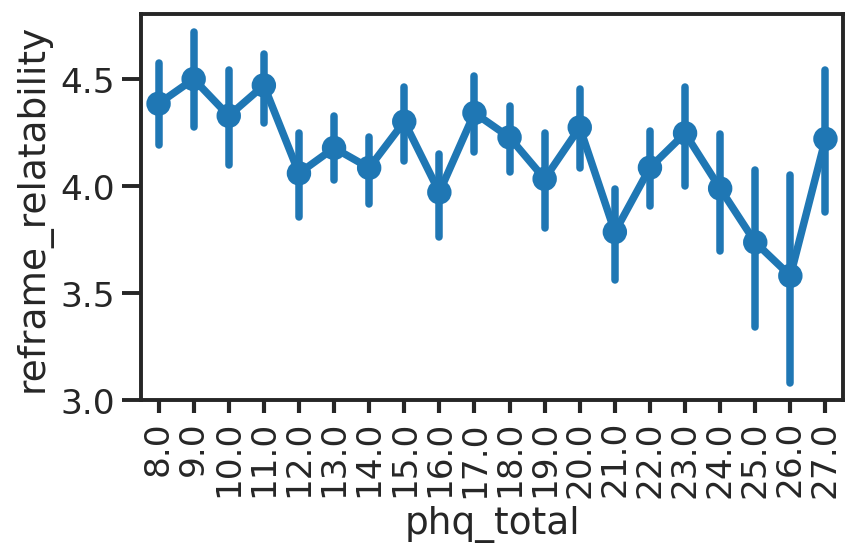

In [247]:
# plot phq_total vs reframe_relatability

import seaborn as sns

sns.pointplot(data=output_df, x='phq_total', y='reframe_relatability',)

import matplotlib.pyplot as plt

plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

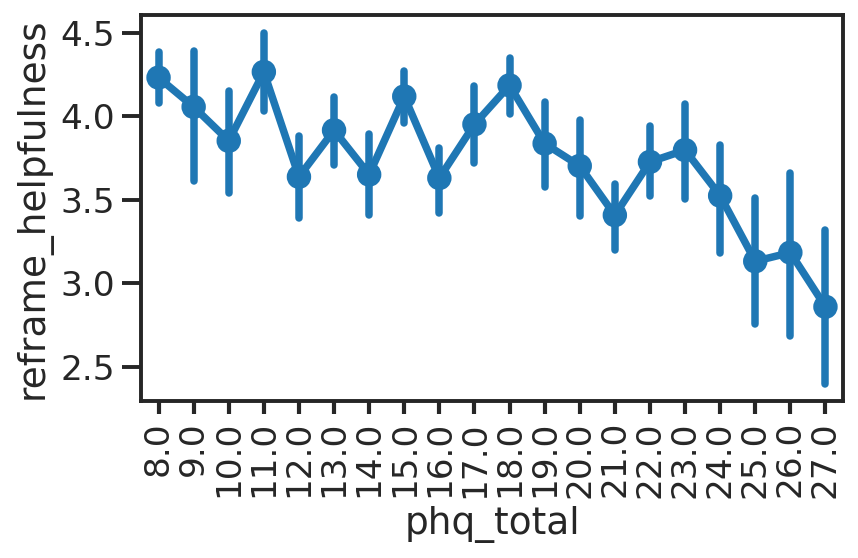

In [245]:
sns.pointplot(data=output_df, x='phq_total', y='reframe_helpfulness',)

# rotate x-axis labels

import matplotlib.pyplot as plt

plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

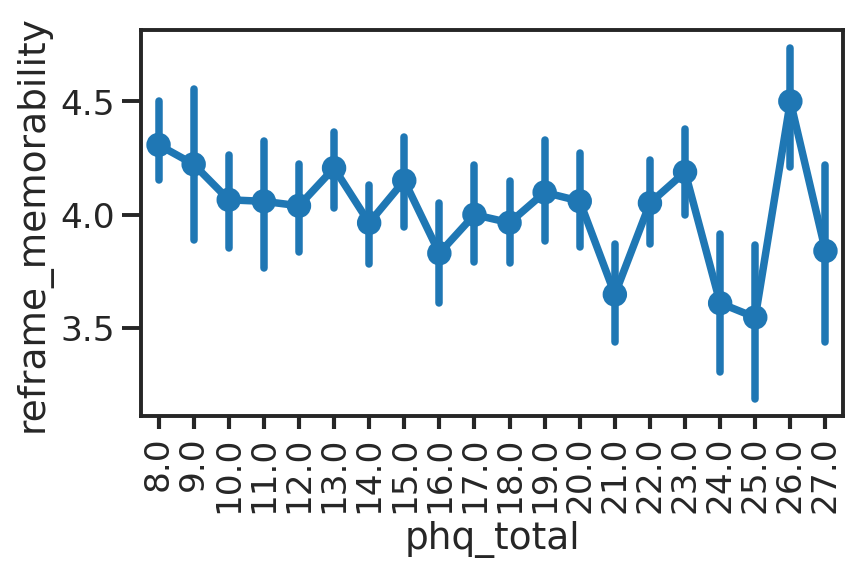

In [246]:
sns.pointplot(data=output_df, x='phq_total', y='reframe_memorability',)

# rotate x-axis labels

import matplotlib.pyplot as plt

plt.xticks(rotation=90)


## Subjective Feedback

In [236]:
output_df.columns

Index(['start_time', 'end_time', 'thought_record_id', 'email', 'condition_x',
       'reframe_relatability', 'reframe_helpfulness', 'reframe_memorability',
       'skill_learnability', 'belief_1', 'emotion_strength_1', 'belief_2',
       'emotion_strength_2', 'all_belief', 'all_emotion_strength',
       'emotion_strength', 'belief', 'reduction_in_belief',
       'reduction_in_emotion_intensity', 'study_id', 'condition_y',
       'date_consent', 'consent_yn', 'consent_complete', 'age', 'phq_total',
       'phq9_complete', 'gad7_total', 'gad7_complete', 'hope_q',
       'hope_complete', 'cr_use_q', 'therapy_post_diy', 'talk', 'seekmh',
       'miscq_complete', 'phq_total_range', 'gad7_total_range',
       'condition_map', 'age_range', 'tool_went_well', 'tool_didnt_well',
       'tool_other_comments', 'phq_total_range_int', 'gad7_total_range_int',
       'hope_q_binary', 'phq9_geq_10'],
      dtype='object')

In [240]:
output_df['tool_went_well'] = output_df['tool_went_well'].str.strip()

temp_df = output_df.loc[(~output_df['tool_went_well'].isna()) & (output_df['tool_went_well'] != '')]



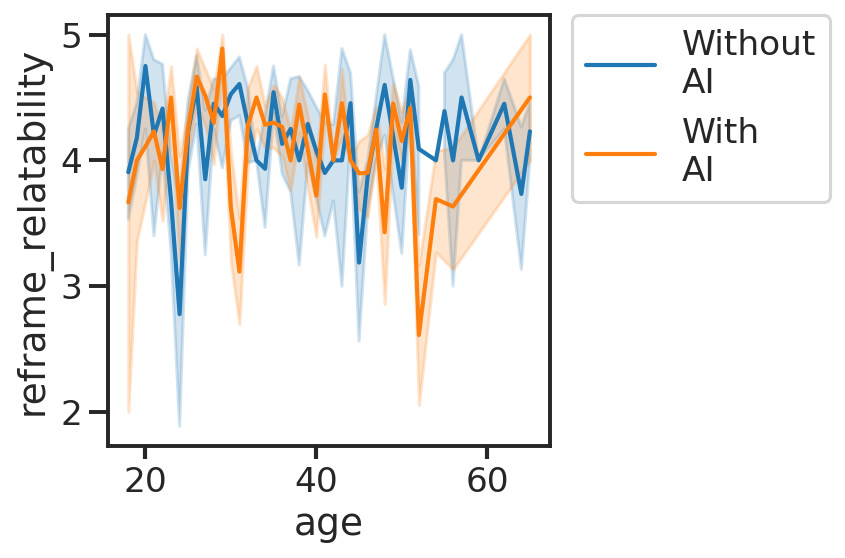

In [113]:
sb.lineplot(data=output_df, x='age', y='reframe_relatability', hue='condition_map')

# rotate x-axis labels

import matplotlib.pyplot as plt

# plt.xticks(rotation=90)

# legend outside the plot

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


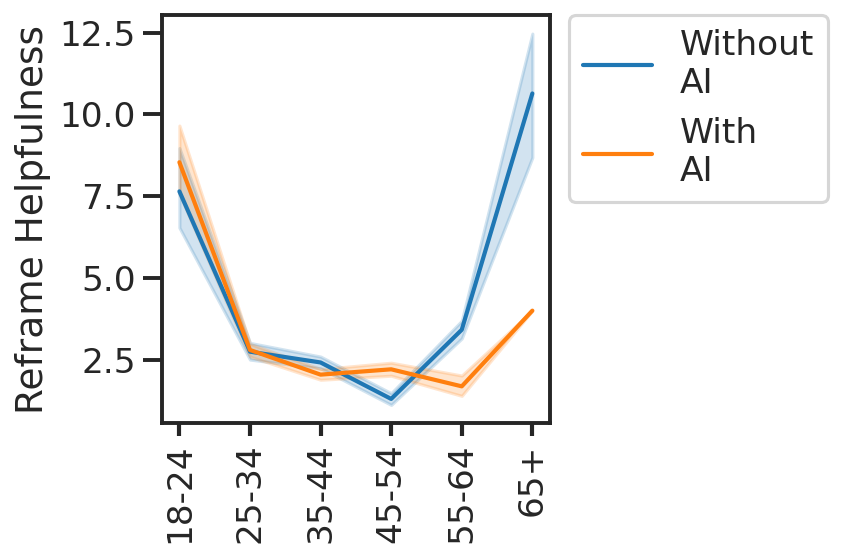

In [359]:
g = sb.lineplot(data=output_df_weighted, x='age_range', y='reframe_helpfulness_w', hue='condition_map')


axs = g.axes

# rotate x-axis labels

import matplotlib.pyplot as plt

plt.xticks(rotation=90)

axs.set_ylabel('Reframe Helpfulness')
axs.set_xlabel('')


# legend outside the plot at the top, single row

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [360]:
output_df_weighted['age_range'].value_counts(normalize=True)

35-44    0.321823
25-34    0.302947
45-54    0.178637
18-24    0.137201
55-64    0.051105
65+      0.008287
Name: age_range, dtype: float64

In [ ]:
g = sb.lineplot(data=output_df_weighted, x='age_range', y='reframe_helpfulness_w', hue='condition_map')


axs = g.axes

# rotate x-axis labels

import matplotlib.pyplot as plt

plt.xticks(rotation=90)

axs.set_ylabel('Reframe Helpfulness')
axs.set_xlabel('')


# legend outside the plot at the top, single row

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [317]:
output_df['phq_total_range'] = pd.Categorical(output_df['phq_total_range'], categories=['5-9', '10-14', '15-19', '20-27'], ordered=True)	

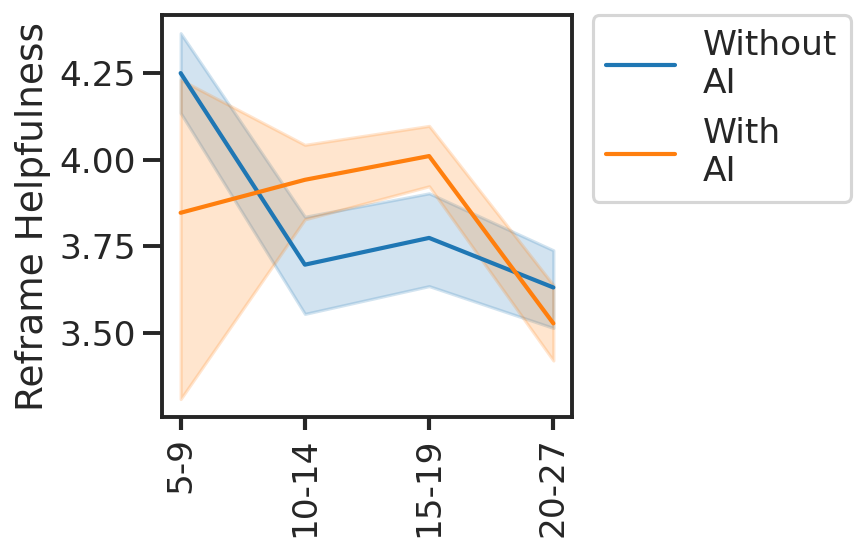

In [318]:
g = sb.lineplot(data=output_df, x='phq_total_range', y='reframe_helpfulness', hue='condition_map')


axs = g.axes

# rotate x-axis labels

import matplotlib.pyplot as plt

plt.xticks(rotation=90)

axs.set_ylabel('Reframe Helpfulness')
axs.set_xlabel('')


# legend outside the plot at the top, single row

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [313]:
output_df.columns

Index(['start_time', 'end_time', 'thought_record_id', 'email', 'condition_x',
       'reframe_relatability', 'reframe_helpfulness', 'reframe_memorability',
       'skill_learnability', 'belief_1', 'emotion_strength_1', 'belief_2',
       'emotion_strength_2', 'all_belief', 'all_emotion_strength',
       'emotion_strength', 'belief', 'reduction_in_belief',
       'reduction_in_emotion_intensity', 'condition_map_x', 'study_id',
       'condition_y', 'date_consent', 'consent_yn', 'consent_complete', 'age',
       'phq_total', 'phq9_complete', 'gad7_total', 'gad7_complete', 'hope_q',
       'hope_complete', 'cr_use_q', 'therapy_post_diy', 'talk', 'seekmh',
       'miscq_complete', 'phq_total_range', 'gad7_total_range',
       'condition_map_y', 'gender', 'race', 'condition_map',
       'phq_total_range_int', 'gad7_total_range_int', 'identity', 'age_range'],
      dtype='object')

In [201]:
# sort by start_time and drop duplicates based on email

output_df_first = output_df.sort_values(by='start_time', ascending=True)

output_df_first = output_df_first.drop_duplicates(subset='email', keep='first')

In [ ]:
g = sb.lineplot(data=output_df, x='gender', y='reframe_helpfulness', hue='condition_map')


axs = g.axes

# rotate x-axis labels

import matplotlib.pyplot as plt

plt.xticks(rotation=90)

axs.set_ylabel('Reframe Helpfulness')
axs.set_xlabel('')


# legend outside the plot at the top, single row

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

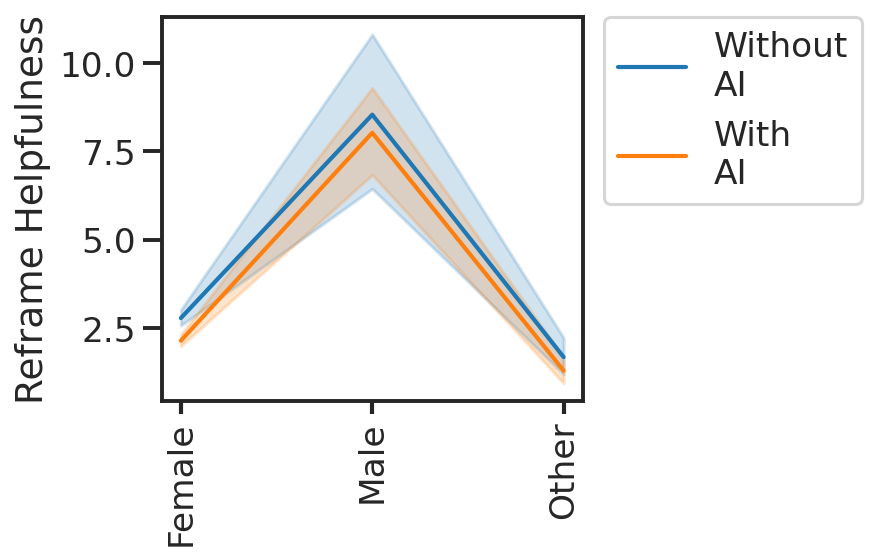

In [358]:
g = sb.lineplot(data=output_df_weighted, x='gender', y='reframe_helpfulness_w', hue='condition_map')


axs = g.axes

# rotate x-axis labels

import matplotlib.pyplot as plt

plt.xticks(rotation=90)

axs.set_ylabel('Reframe Helpfulness')
axs.set_xlabel('')


# legend outside the plot at the top, single row

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

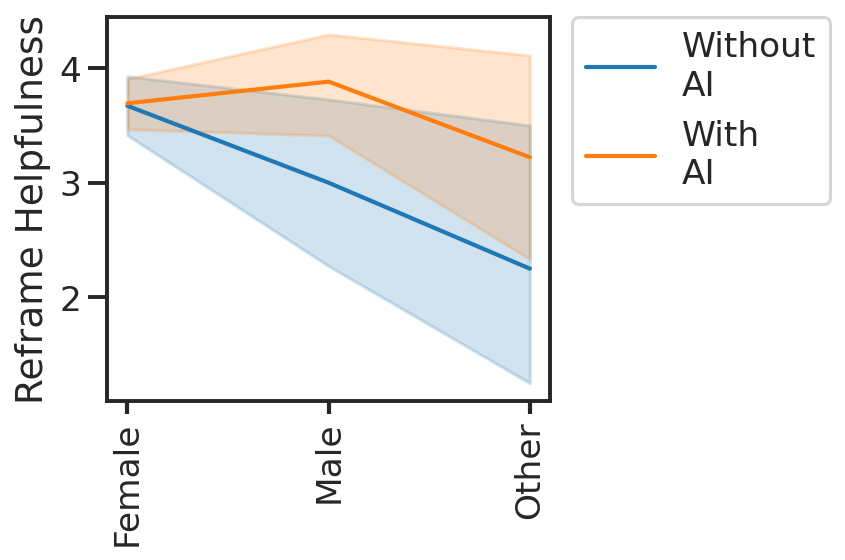

In [319]:
g = sb.lineplot(data=output_df_first, x='gender', y='reframe_helpfulness', hue='condition_map')


axs = g.axes

# rotate x-axis labels

import matplotlib.pyplot as plt

plt.xticks(rotation=90)

axs.set_ylabel('Reframe Helpfulness')
axs.set_xlabel('')


# legend outside the plot at the top, single row

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/homes/gws/ashshar/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


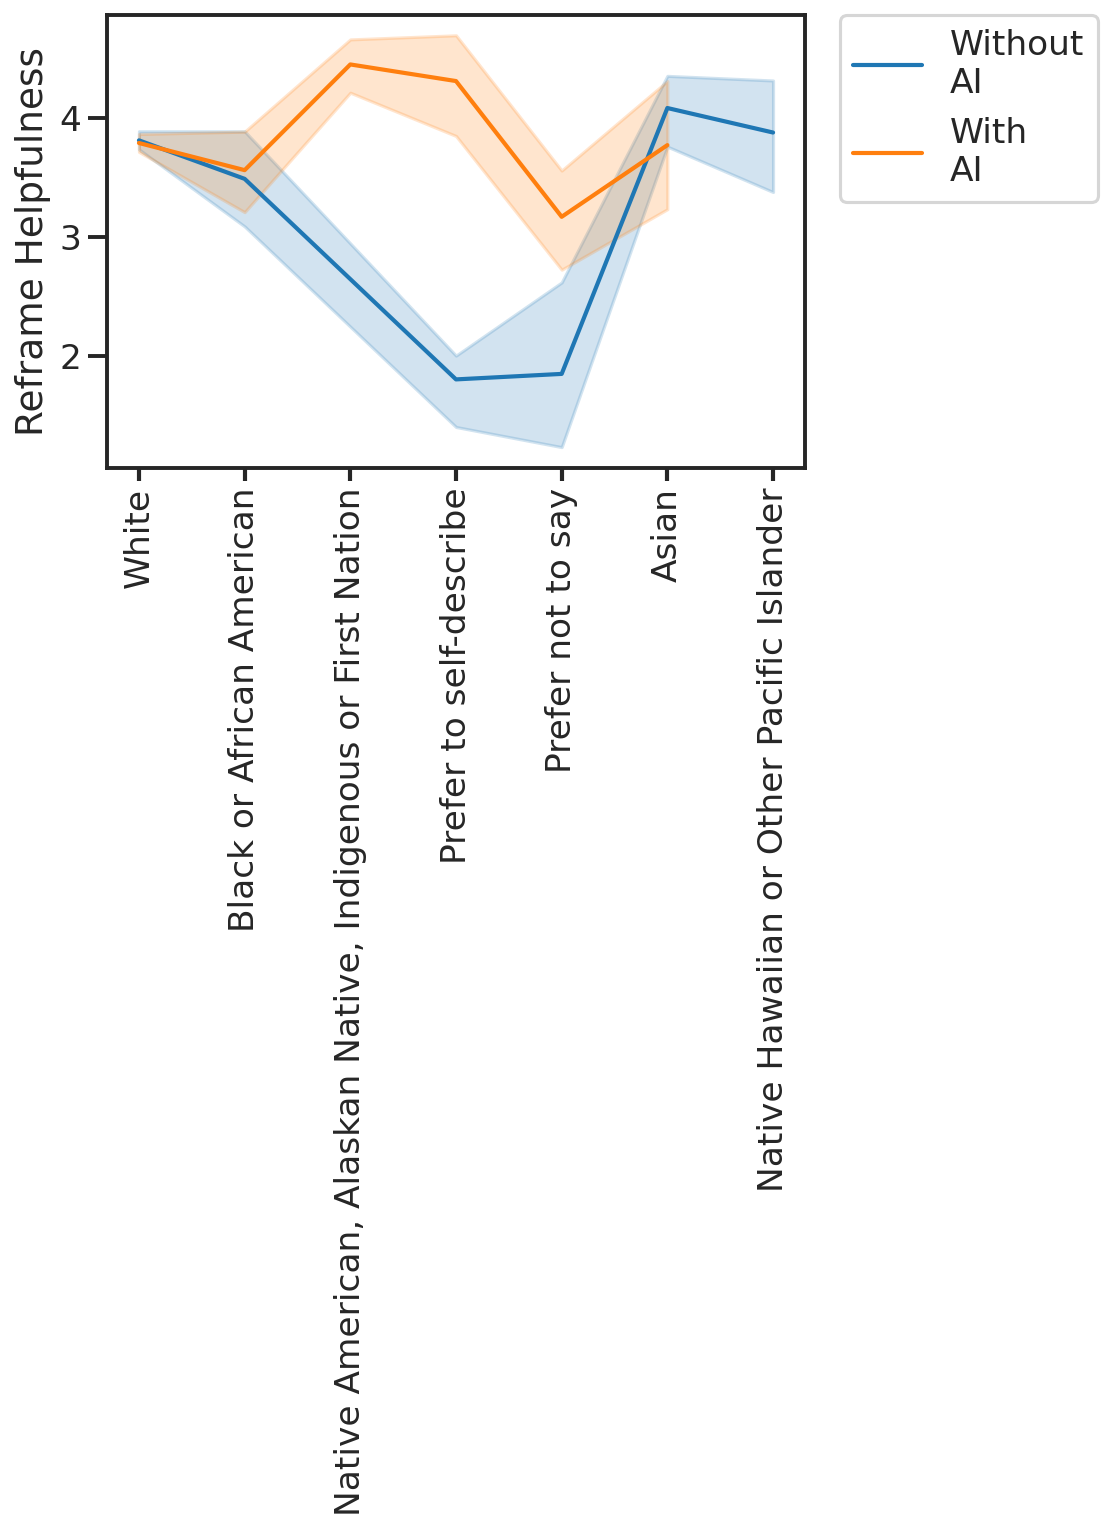

In [200]:
g = sb.lineplot(data=output_df, x='race', y='reframe_helpfulness', hue='condition_map')


axs = g.axes

# rotate x-axis labels

import matplotlib.pyplot as plt

plt.xticks(rotation=90)

axs.set_ylabel('Reframe Helpfulness')
axs.set_xlabel('')


# legend outside the plot at the top, single row

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

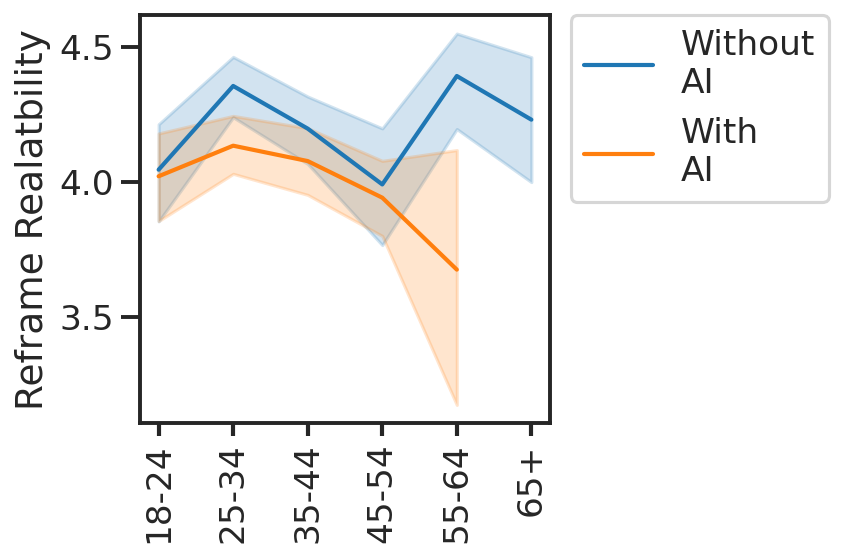

In [331]:
g = sb.lineplot(data=output_df, x='age_range', y='reframe_relatability', hue='condition_map')


axs = g.axes

# rotate x-axis labels

import matplotlib.pyplot as plt

plt.xticks(rotation=90)

axs.set_ylabel('Reframe Realatbility')
axs.set_xlabel('')


# legend outside the plot at the top, single row

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [129]:
sb.lineplot(data=output_df, x='phq9_range', y='reframe_helpfulness', hue='condition_map')

# rotate x-axis labels

import matplotlib.pyplot as plt

plt.xticks(rotation=90)

# legend outside the plot

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


ValueError: Could not interpret value `phq9_range` for parameter `x`

In [123]:
age_cohen_d = []

for i in range(len(AGE_RANGES)):
	age_cohen_d.append({'age_range': AGE_RANGES[i], 'reframe_relatability_cohen_d': cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['age_range'] == AGE_RANGES[i])]['reframe_relatability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['age_range'] == AGE_RANGES[i])]['reframe_relatability']), 'reframe_helpfulness_cohen_d': cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['age_range'] == AGE_RANGES[i])]['reframe_helpfulness'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['age_range'] == AGE_RANGES[i])]['reframe_helpfulness']), 'reframe_memorability_cohen_d': cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['age_range'] == AGE_RANGES[i])]['reframe_memorability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['age_range'] == AGE_RANGES[i])]['reframe_memorability']), 'skill_learnability_cohen_d': cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['age_range'] == AGE_RANGES[i])]['skill_learnability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['age_range'] == AGE_RANGES[i])]['skill_learnability']), 'reduction_in_emotion_intensity_cohen_d': cohen_d(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['age_range'] == AGE_RANGES[i])]['reduction_in_emotion_intensity'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['age_range'] == AGE_RANGES[i])]['reduction_in_emotion_intensity']), 'reframe_relatibility_t_test': ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['age_range'] == AGE_RANGES[i])]['reframe_relatability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['age_range'] == AGE_RANGES[i])]['reframe_relatability']), 'reframe_helpfulness_t_test': ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['age_range'] == AGE_RANGES[i])]['reframe_helpfulness'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['age_range'] == AGE_RANGES[i])]['reframe_helpfulness']), 'reframe_memorability_t_test': ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['age_range'] == AGE_RANGES[i])]['reframe_memorability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['age_range'] == AGE_RANGES[i])]['reframe_memorability']), 'skill_learnability_t_test': ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['age_range'] == AGE_RANGES[i])]['skill_learnability'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['age_range'] == AGE_RANGES[i])]['skill_learnability']), 'reduction_in_emotion_intensity_t_test': ttest_ind(output_df.loc[(output_df['condition_map'] == 'DIY, with AI') & (output_df['age_range'] == AGE_RANGES[i])]['reduction_in_emotion_intensity'], output_df.loc[(output_df['condition_map'] == 'DIY, without AI') & (output_df['age_range'] == AGE_RANGES[i])]['reduction_in_emotion_intensity'])})

age_cohen_d_df = pd.DataFrame(age_cohen_d)

In [125]:
len(output_df)

1960

In [116]:
# reorder columns

age_cohen_d_df = age_cohen_d_df[['age_range', 'reframe_relatability_cohen_d', 'reframe_relatibility_t_test', 'reframe_helpfulness_cohen_d', 'reframe_helpfulness_t_test', 'reframe_memorability_cohen_d', 'reframe_memorability_t_test', 'skill_learnability_cohen_d', 'skill_learnability_t_test', 'reduction_in_emotion_intensity_cohen_d', 'reduction_in_emotion_intensity_t_test']]

In [117]:
age_cohen_d_df['reframe_relatibility_t_test'] = age_cohen_d_df['reframe_relatibility_t_test'].apply(lambda x: x[1])
age_cohen_d_df['reframe_helpfulness_t_test'] = age_cohen_d_df['reframe_helpfulness_t_test'].apply(lambda x: x[1])
age_cohen_d_df['reframe_memorability_t_test'] = age_cohen_d_df['reframe_memorability_t_test'].apply(lambda x: x[1])
age_cohen_d_df['skill_learnability_t_test'] = age_cohen_d_df['skill_learnability_t_test'].apply(lambda x: x[1])
age_cohen_d_df['reduction_in_emotion_intensity_t_test'] = age_cohen_d_df['reduction_in_emotion_intensity_t_test'].apply(lambda x: x[1])

In [118]:
age_cohen_d_df = age_cohen_d_df.round(4)

In [119]:
age_cohen_d_df.columns = pd.MultiIndex.from_tuples([('age_range', ''), ('reframe_relatability', 'cohen_d'), ('reframe_relatability', 't_test'), ('reframe_helpfulness', 'cohen_d'), ('reframe_helpfulness', 't_test'), ('reframe_memorability', 'cohen_d'), ('reframe_memorability', 't_test'), ('skill_learnability', 'cohen_d'), ('skill_learnability', 't_test'), ('reduction_in_emotion_intensity', 'cohen_d'), ('reduction_in_emotion_intensity', 't_test')])

In [120]:
age_cohen_d_df

age_range reframe_relatability        reframe_helpfulness         \
                         cohen_d t_test             cohen_d t_test   
0     18-24                  NaN    NaN                 NaN    NaN   
1     25-34                  NaN    NaN                 NaN    NaN   
2     35-44                  NaN    NaN                 NaN    NaN   
3     45-54                  NaN    NaN                 NaN    NaN   
4     55-64                  NaN    NaN                 NaN    NaN   
5       65+                  NaN    NaN                 NaN    NaN   

  reframe_memorability        skill_learnability         \
               cohen_d t_test            cohen_d t_test   
0                  NaN    NaN                NaN    NaN   
1                  NaN    NaN                NaN    NaN   
2                  NaN    NaN                NaN    NaN   
3                  NaN    NaN                NaN    NaN   
4                  NaN    NaN                NaN    NaN   
5                  NaN    NaN                NaN    NaN   

  reduction_in_emotion_intensity         
                         cohen_d t_test  
0                            NaN    NaN  
1                            NaN    NaN  
2                            NaN    NaN  
3                            NaN    NaN  
4                            NaN    NaN  
5                            NaN    NaN

## Survey Weighting

In [203]:
import weightipy as wp

In [204]:
import quantipy as qp

/homes/gws/ashshar/anaconda3/lib/python3.7/site-packages/quantipy/core/tools/view/logic.py:6: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index


In [205]:
# conver

In [285]:
set(output_df['age'])

{18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 62.0,
 63.0,
 64.0,
 65.0,
 72.0}

In [130]:
def get_age_range(age):
	if age >= 13 and age <= 14:
		return '13-14'
	elif age >= 15 and age <= 17:
		return '15-17'
	elif age >= 18 and age <= 24:
		return '18-24'
	elif age >= 25 and age <= 34:
		return '25-34'
	elif age >= 35 and age <= 44:
		return '35-44'
	elif age >= 45 and age <= 54:
		return '45-54'
	elif age >= 55 and age <= 64:
		return '55-64'
	elif age >= 65:
		return '65+'
	else:
		return 'unknown'
		
output_df['age_range'] = output_df['age'].apply(get_age_range)

In [131]:
# convert age_ranges to integers

age_range_map = {'18-24': 1, '25-34': 2, '35-44': 3, '45-54': 4, '55-64': 5, '65+': 6}

phq_range_map = {'0-4': 1, '5-9': 2, '10-14': 3, '15-19': 4, '20-27': 5}

gad_range_map = {'0-4': 1, '5-9': 2, '10-14': 3, 'greater than 15': 4}

output_df['age_range_int'] = output_df['age_range'].map(age_range_map)

output_df['phq_total_range_int'] = output_df['phq_total_range'].map(phq_range_map)

output_df['gad7_total_range_int'] = output_df['gad7_total_range'].map(gad_range_map)

In [132]:
output_df['phq_total_range']

0       15-19
1       15-19
2       10-14
3       15-19
4       15-19
        ...  
3458    10-14
3459    15-19
3460    20-27
3461    20-27
3462      5-9
Name: phq_total_range, Length: 3422, dtype: object

In [133]:
output_df['age_range'].value_counts(normalize=True)

25-34    0.302747
35-44    0.290766
45-54    0.182057
18-24    0.151666
55-64    0.056108
65+      0.016657
Name: age_range, dtype: float64

In [134]:
output_df['phq_total_range'].value_counts(normalize=True)

20-27    0.399766
15-19    0.313852
10-14    0.258621
5-9      0.026300
0-4      0.001461
Name: phq_total_range, dtype: float64

In [135]:
set(output_df['phq_total_range'])

{'0-4', '10-14', '15-19', '20-27', '5-9'}

In [136]:
age_distr = [27.01550301, 20.69476237, 10.35508031, 4.873702658, 2.449828714, 1.275672998]

# normalize to 100

age_distr = [i/sum(age_distr) * 100 for i in age_distr]

age_distr

[40.52454113270888,
 31.043129146411587,
 15.533113627377867,
 7.310786097878901,
 3.674859744489514,
 1.9135702511332602]

In [137]:
output_df['gad7_total_range'].value_counts(normalize=True)

greater than 15    0.578317
10-14              0.280830
5-9                0.116014
0-4                0.024839
Name: gad7_total_range, dtype: float64

In [138]:
output_df['age_range'].value_counts(normalize=True)

25-34    0.302747
35-44    0.290766
45-54    0.182057
18-24    0.151666
55-64    0.056108
65+      0.016657
Name: age_range, dtype: float64

In [189]:




phq_targets = {'phq_total_range_int': {1: 4.29, 2: 11.89, 3: 22.45, 4: 28.81, 5: 32.56}}

age_targets = {'age_range_int': {1: 40.52, 2: 31.03, 3: 15.53, 4: 7.34, 5: 3.67, 6: 1.91},}

gad_targets = {'gad7_total_range_int': {1: 4.01, 2: 16.97, 3: 31.11, 4: 47.91}}
		#    'age_range': {'18-24': 247, '25-34': 179, '35-44': 109, '45-54': 71, '55-64': 32, '65+': 8}}



# scheme = wp.scheme_from_dict(targets)

In [190]:
output_df['phq_total_range_int']#.value_counts(normalize=True)

0       4
1       4
2       3
3       4
4       4
       ..
3457    4
3458    3
3459    4
3460    5
3461    5
Name: phq_total_range_int, Length: 3421, dtype: category
Categories (4, int64): [2 < 3 < 4 < 5]

In [191]:
scheme = wp.Rim('age_and_score')
scheme.set_targets(targets=[phq_targets])

output_df['identity'] = range(len(output_df))

engine = wp.WeightEngine(data=output_df)
engine.add_scheme(scheme=scheme, key="identity", verbose=False)
engine.run()
df_weighted = engine.dataframe()
col_weights = f"weights_{scheme.name}"

efficiency = wp.weighting_efficiency(df_weighted[col_weights])

print(engine.get_report())



NameError: name 'wp' is not defined

In [192]:
scheme = wp.Rim('age_and_score')
scheme.set_targets(targets=[phq_targets, gad_targets])

output_df['identity'] = range(len(output_df))

engine = wp.WeightEngine(data=output_df)
engine.add_scheme(scheme=scheme, key="identity", verbose=False)
engine.run()
df_weighted = engine.dataframe()
col_weights = f"weights_{scheme.name}"

efficiency = wp.weighting_efficiency(df_weighted[col_weights])

print(engine.get_report())



NameError: name 'wp' is not defined

In [217]:
scheme = wp.Rim('age_and_score')
scheme.set_targets(targets=[phq_targets, gad_targets, age_targets])

output_df['identity'] = range(len(output_df))

engine = wp.WeightEngine(data=output_df)
engine.add_scheme(scheme=scheme, key="identity", verbose=False)
engine.run()
df_weighted = engine.dataframe()
col_weights = f"weights_{scheme.name}"

efficiency = wp.weighting_efficiency(df_weighted[col_weights])

print(engine.get_report())



KeyError: "['age_range_int'] not in index"

In [218]:
scheme = wp.Rim('age_and_score')
scheme.set_targets(targets=[age_targets])

output_df['identity'] = range(len(output_df))

engine = wp.WeightEngine(data=output_df)
engine.add_scheme(scheme=scheme, key="identity", verbose=False)
engine.run()
df_weighted = engine.dataframe()
col_weights = f"weights_{scheme.name}"

efficiency = wp.weighting_efficiency(df_weighted[col_weights])

print(engine.get_report())



KeyError: "['age_range_int'] not in index"

In [489]:
output_df.groupby('phq_total_range_int')['weights'].sum()

KeyError: 'Column not found: weights'

In [287]:
targets = {
	'phq_total_range': {'0-4': 4.29, '5-9': 11.89, '10-14': 22.45, '15-19': 28.81, '20-27': 32.56},
		   'age_range': {'18-24': 40.52, '25-34': 31.04, '35-44': 15.53, '45-54': 7.31, '55-64': 3.67, '65+': 1.91},
		   'gad7_total_range': {'0-4': 4.01, '5-9': 16.97, '10-14': 31.11, 'greater than 15': 47.90},
		   'gender': {'Female': 65.03, 'Male': 30.81, 'Other': 4.16}}
		#    'age_range': {'18-24': 247, '25-34': 179, '35-44': 109, '45-54': 71, '55-64': 32, '65+': 8}}


scheme = wp.scheme_from_dict(targets)

In [288]:
output_df_weighted = wp.weight_dataframe(
    df=output_df,
    scheme=scheme,
    weight_column="weights"
)


In [289]:
efficiency = wp.weighting_efficiency(output_df_weighted["weights"])


In [290]:
efficiency

42.730307828819576

In [291]:
output_df_weighted.groupby(['phq_total_range', 'age_range'])['weights'].mean()

phq_total_range  age_range
10-14            18-24        2.216135
                 25-34        0.669126
                 35-44        0.559568
                 45-54        0.537816
                 55-64        0.747586
                 65+          2.644729
15-19            18-24        2.344435
                 25-34        0.809227
                 35-44        0.694689
                 45-54        0.494626
                 55-64        0.776209
                 65+          1.000000
20-27            18-24        2.627830
                 25-34        0.754151
                 35-44        0.561339
                 45-54        0.603455
                 55-64        0.832283
                 65+          1.000000
5-9              18-24             NaN
                 25-34        4.513778
                 35-44        2.121791
                 45-54        1.000000
                 55-64             NaN
                 65+               NaN
Name: weights, dtype: float64

In [292]:
output_df_weighted.groupby(['phq_total_range'])['weights'].mean()

phq_total_range
10-14    0.922532
15-19    0.990366
20-27    0.878353
5-9      3.964065
Name: weights, dtype: float64

In [293]:
output_df_weighted.groupby(['age_range'])['weights'].mean()

age_range
18-24    2.407795
25-34    0.991041
35-44    0.630592
45-54    0.561769
55-64    0.772056
65+      2.253127
Name: weights, dtype: float64

In [294]:
output_df_weighted['phq_total_range'].value_counts()

20-27    1117
15-19     780
10-14     636
5-9        65
Name: phq_total_range, dtype: int64

In [295]:
output_df_weighted['age_range'].value_counts()

35-44    813
25-34    789
45-54    469
18-24    368
55-64    138
65+       21
Name: age_range, dtype: int64

In [296]:
li = [65, 622, 759, 1088]
weights = [4.63, 0.91, 0.96, 0.75]

np.asarray([i * j for i, j in zip(li, weights)]) / sum([i * j for i, j in zip(li, weights)])



array([0.12479215, 0.23470628, 0.30213841, 0.33836317])

In [297]:
li = [65, 622, 759, 1088]
weights = [4.63, 0.91, 0.96, 0.75]

np.asarray([i * j for i, j in zip(li, weights)]) / sum([i * j for i, j in zip(li, weights)])



array([0.12479215, 0.23470628, 0.30213841, 0.33836317])

In [298]:
li = [65, 622, 759, 1088]
weights = [4.63, 0.91, 0.96, 0.75]

np.asarray([i * j for i, j in zip(li, weights)]) / sum([i * j for i, j in zip(li, weights)])



array([0.12479215, 0.23470628, 0.30213841, 0.33836317])

In [299]:
output_df_weighted

start_time                         end_time  thought_record_id                              email condition_x  reframe_relatability  reframe_helpfulness  reframe_memorability  skill_learnability belief_1  ... gad7_total_range  condition_map_y  gender   race  condition_map  phq_total_range_int  gad7_total_range_int  identity  age_range   weights
0    2023-11-21 20:45:48.139754+00:00 2023-11-21 20:51:08.777235+00:00                 47               lyttles131@yahoo.com           1                   5.0                  4.0                   5.0                 5.0           ...            10-14  DIY, without AI  Female  White    Without\nAI                    3                     2         0      35-44  0.601012
1    2023-11-21 20:51:30.889579+00:00 2023-11-21 20:53:39.364902+00:00                 48               lyttles131@yahoo.com           1                   5.0                  4.0                   4.0                 5.0           ...            10-14  DIY, without AI  Female  White    Without\nAI                    3                     2         1      35-44  0.601012
2    2023-11-22 03:57:21.853551+00:00 2023-11-22 04:03:24.755023+00:00                 50             abbylange024@gmail.com           1                   5.0                  4.0                   4.0                 4.0           ...            10-14  DIY, without AI  Female  White    Without\nAI                    2                     2         2      18-24  1.805366
3    2023-11-22 04:58:52.296187+00:00 2023-11-22 05:09:09.184732+00:00                 51  xxxmorganscrighton93xxx@gmail.com           2                   5.0                  5.0                   5.0                 5.0           ...            10-14     DIY, with AI  Female  White       With\nAI                    3                     2         3      25-34  0.833873
4    2023-11-22 05:09:54.598337+00:00 2023-11-22 05:15:54.564080+00:00                 52  xxxmorganscrighton93xxx@gmail.com           2                   4.0                  5.0                   5.0                 5.0           ...            10-14     DIY, with AI  Female  White       With\nAI                    3                     2         4      25-34  0.833873
...                               ...                              ...                ...                                ...         ...                   ...                  ...                   ...                 ...      ...  ...              ...              ...     ...    ...            ...                  ...                   ...       ...        ...       ...
2628 2024-02-28 07:39:34.748775+00:00 2024-02-28 07:43:15.310820+00:00               3908              kalomax2019@gmail.com           1                   5.0                  4.0                   4.0                 5.0           ...  greater than 15  DIY, without AI     NaN    NaN    Without\nAI                    4                     3      2593      25-34  1.000000
2629 2024-02-28 07:43:43.609036+00:00 2024-02-28 07:48:46.002163+00:00               3909              kalomax2019@gmail.com           1                   4.0                  4.0                   5.0                 5.0           ...  greater than 15  DIY, without AI     NaN    NaN    Without\nAI                    4                     3      2594      25-34  1.000000
2630 2024-02-28 07:43:43.609036+00:00 2024-02-28 07:48:46.002163+00:00               3909              kalomax2019@gmail.com           1                   4.0                  4.0                   5.0                 5.0           ...  greater than 15  DIY, without AI     NaN    NaN    Without\nAI                    4                     3      2595      25-34  1.000000
2631 2024-02-28 08:43:43.551074+00:00 2024-02-28 08:50:35.657774+00:00               3910             rockyroxie15@gmail.com           2                   5.0                  4.0                   5.0                 5.0           ...              5-9     DIY, with AI     NaN    NaN   

In [300]:
output_df_weighted.groupby(['phq_total_range'])['weights'].mean()

phq_total_range
10-14    0.922532
15-19    0.990366
20-27    0.878353
5-9      3.964065
Name: weights, dtype: float64

In [301]:
output_df_weighted.columns

Index(['start_time', 'end_time', 'thought_record_id', 'email', 'condition_x',
       'reframe_relatability', 'reframe_helpfulness', 'reframe_memorability',
       'skill_learnability', 'belief_1', 'emotion_strength_1', 'belief_2',
       'emotion_strength_2', 'all_belief', 'all_emotion_strength',
       'emotion_strength', 'belief', 'reduction_in_belief',
       'reduction_in_emotion_intensity', 'condition_map_x', 'study_id',
       'condition_y', 'date_consent', 'consent_yn', 'consent_complete', 'age',
       'phq_total', 'phq9_complete', 'gad7_total', 'gad7_complete', 'hope_q',
       'hope_complete', 'cr_use_q', 'therapy_post_diy', 'talk', 'seekmh',
       'miscq_complete', 'phq_total_range', 'gad7_total_range',
       'condition_map_y', 'gender', 'race', 'condition_map',
       'phq_total_range_int', 'gad7_total_range_int', 'identity', 'age_range',
       'weights'],
      dtype='object')

In [302]:
output_df_weighted['weights']

0       0.601012
1       0.601012
2       1.805366
3       0.833873
4       0.833873
          ...   
2628    1.000000
2629    1.000000
2630    1.000000
2631    1.000000
2632    1.000000
Name: weights, Length: 2598, dtype: float64

In [303]:
output_df_weighted['reframe_relatability_w'] = output_df_weighted['reframe_relatability'] * output_df_weighted['weights']
output_df_weighted['reframe_helpfulness_w'] = output_df_weighted['reframe_helpfulness'] * output_df_weighted['weights']
output_df_weighted['reframe_memorability_w'] = output_df_weighted['reframe_memorability'] * output_df_weighted['weights']
output_df_weighted['skill_learnability_w'] = output_df_weighted['skill_learnability'] * output_df_weighted['weights']
output_df_weighted['reduction_in_emotion_intensity_w'] = output_df_weighted['reduction_in_emotion_intensity'] * output_df_weighted['weights']

In [304]:
output_df_weighted['condition_map'].value_counts()

With\nAI       1469
Without\nAI    1129
Name: condition_map, dtype: int64

In [305]:
output_df_weighted[['reframe_helpfulness', 'phq_total_range', 'weights', 'reframe_helpfulness_w']]

reframe_helpfulness phq_total_range   weights  reframe_helpfulness_w
0                     4.0           15-19  0.601012               2.404047
1                     4.0           15-19  0.601012               2.404047
2                     4.0           10-14  1.805366               7.221464
3                     5.0           15-19  0.833873               4.169366
4                     5.0           15-19  0.833873               4.169366
...                   ...             ...       ...                    ...
2628                  4.0           20-27  1.000000               4.000000
2629                  4.0           20-27  1.000000               4.000000
2630                  4.0           20-27  1.000000               4.000000
2631                  4.0           10-14  1.000000               4.000000
2632                  4.0           10-14  1.000000               4.000000

[2598 rows x 4 columns]

In [306]:
output_df_weighted = output_df_weighted.loc[output_df_weighted['phq_total_range'] != '5-9']

In [307]:
output_df_weighted = output_df_weighted.loc[(output_df_weighted['gad7_total_range'] != '0-4') & (output_df_weighted['gad7_total_range'] != '5-9')]

In [320]:
print('reframe_relatability:', cohen_d(output_df_weighted.loc[output_df_weighted['condition_map'] == 'With\nAI']['reframe_relatability_w'], output_df_weighted.loc[output_df_weighted['condition_map'] == 'Without\nAI']['reframe_relatability_w']), ttest_ind(output_df_weighted.loc[output_df_weighted['condition_map'] == 'With\nAI']['reframe_relatability_w'], output_df_weighted.loc[output_df_weighted['condition_map'] == 'Without\nAI']['reframe_relatability_w']))
print('reframe_helpfulness:', cohen_d(output_df_weighted.loc[output_df_weighted['condition_map'] == 'With\nAI']['reframe_helpfulness_w'], output_df_weighted.loc[output_df_weighted['condition_map'] == 'Without\nAI']['reframe_helpfulness_w']), ttest_ind(output_df_weighted.loc[output_df_weighted['condition_map'] == 'With\nAI']['reframe_helpfulness_w'], output_df_weighted.loc[output_df_weighted['condition_map'] == 'Without\nAI']['reframe_helpfulness_w']))
print('reframe_memorability:', cohen_d(output_df_weighted.loc[output_df_weighted['condition_map'] == 'With\nAI']['reframe_memorability_w'], output_df_weighted.loc[output_df_weighted['condition_map'] == 'Without\nAI']['reframe_memorability_w']), ttest_ind(output_df_weighted.loc[output_df_weighted['condition_map'] == 'With\nAI']['reframe_memorability_w'], output_df_weighted.loc[output_df_weighted['condition_map'] == 'Without\nAI']['reframe_memorability_w']))
print('skill_learnability:', cohen_d(output_df_weighted.loc[output_df_weighted['condition_map'] == 'With\nAI']['skill_learnability_w'], output_df_weighted.loc[output_df_weighted['condition_map'] == 'Without\nAI']['skill_learnability_w']), ttest_ind(output_df_weighted.loc[output_df_weighted['condition_map'] == 'With\nAI']['skill_learnability_w'], output_df_weighted.loc[output_df_weighted['condition_map'] == 'Without\nAI']['skill_learnability_w']))

reframe_relatability: -0.09854700392865572 Ttest_indResult(statistic=-2.2743676764222323, pvalue=0.02304111468670185)
reframe_helpfulness: -0.06773219021682149 Ttest_indResult(statistic=-1.563192161518583, pvalue=0.11815321587150307)
reframe_memorability: -0.05919847239672279 Ttest_indResult(statistic=-1.3662423690744419, pvalue=0.17200446186430174)
skill_learnability: -0.059118351576185155 Ttest_indResult(statistic=-1.3643932595411976, pvalue=0.17258530308493403)


In [321]:
output_df_weighted.groupby('condition_map')[['reframe_relatability_w', 'reframe_helpfulness_w', 'reframe_memorability_w', 'skill_learnability_w', 'reduction_in_emotion_intensity_w']].mean()

reframe_relatability_w  reframe_helpfulness_w  reframe_memorability_w  skill_learnability_w  reduction_in_emotion_intensity_w
condition_map                                                                                                                               
With\nAI                     3.374864               3.124027                3.299725              3.220662                          1.306153
Without\nAI                  3.750497               3.380780                3.522382              3.445693                          1.506310

In [322]:
output_df_weighted.groupby('condition_map')[['reframe_relatability', 'reframe_helpfulness', 'reframe_memorability', 'skill_learnability', 'reduction_in_emotion_intensity']].mean()

reframe_relatability  reframe_helpfulness  reframe_memorability  skill_learnability  reduction_in_emotion_intensity
condition_map                                                                                                                     
With\nAI                   4.054207             3.762136              4.016990            3.850324                        1.502427
Without\nAI                4.181624             3.745726              3.981838            3.893162                        1.768162

In [323]:
len(set(output_df_weighted['email']))

261

In [324]:
# sort by start_time and drop duplicates based on email

output_df_weighted_first = output_df_weighted.sort_values(by='start_time', ascending=True)

output_df_weighted_first = output_df_weighted_first.drop_duplicates(subset='email', keep='first')

In [325]:
output_df_weighted_first.groupby('condition_map')[['reframe_relatability', 'reframe_helpfulness', 'reframe_memorability', 'skill_learnability', 'reduction_in_emotion_intensity']].mean()

reframe_relatability  reframe_helpfulness  reframe_memorability  skill_learnability  reduction_in_emotion_intensity
condition_map                                                                                                                     
With\nAI                   4.105634             3.591549              4.070423            3.802817                        1.711268
Without\nAI                4.000000             3.478992              3.865546            3.722689                        1.663866

In [326]:
del output_df_weighted_first['weights']

In [327]:
len(output_df_weighted_first)

261

In [328]:
output_df_weighted_first = wp.weight_dataframe(
    df=output_df_weighted_first,
    scheme=scheme,
    weight_column="weights"
)


In [329]:
output_df_weighted_first['reframe_relatability_w'] = output_df_weighted_first['reframe_relatability'] * output_df_weighted_first['weights']
output_df_weighted_first['reframe_helpfulness_w'] = output_df_weighted_first['reframe_helpfulness'] * output_df_weighted_first['weights']
output_df_weighted_first['reframe_memorability_w'] = output_df_weighted_first['reframe_memorability'] * output_df_weighted_first['weights']
output_df_weighted_first['skill_learnability_w'] = output_df_weighted_first['skill_learnability'] * output_df_weighted_first['weights']
output_df_weighted_first['reduction_in_emotion_intensity_w'] = output_df_weighted_first['reduction_in_emotion_intensity'] * output_df_weighted_first['weights']



In [330]:
print('reframe_relatability:', cohen_d(output_df_weighted_first.loc[output_df_weighted_first['condition_map'] == 'With\nAI']['reframe_relatability_w'], output_df_weighted_first.loc[output_df_weighted_first['condition_map'] == 'Without\nAI']['reframe_relatability_w']), ttest_ind(output_df_weighted_first.loc[output_df_weighted_first['condition_map'] == 'With\nAI']['reframe_relatability_w'], output_df_weighted_first.loc[output_df_weighted_first['condition_map'] == 'Without\nAI']['reframe_relatability_w']))
print('reframe_helpfulness:', cohen_d(output_df_weighted_first.loc[output_df_weighted_first['condition_map'] == 'With\nAI']['reframe_helpfulness_w'], output_df_weighted_first.loc[output_df_weighted_first['condition_map'] == 'Without\nAI']['reframe_helpfulness_w']), ttest_ind(output_df_weighted_first.loc[output_df_weighted_first['condition_map'] == 'With\nAI']['reframe_helpfulness_w'], output_df_weighted_first.loc[output_df_weighted_first['condition_map'] == 'Without\nAI']['reframe_helpfulness_w']))
print('reframe_memorability:', cohen_d(output_df_weighted_first.loc[output_df_weighted_first['condition_map'] == 'With\nAI']['reframe_memorability_w'], output_df_weighted_first.loc[output_df_weighted_first['condition_map'] == 'Without\nAI']['reframe_memorability_w']), ttest_ind(output_df_weighted_first.loc[output_df_weighted_first['condition_map'] == 'With\nAI']['reframe_memorability_w'], output_df_weighted_first.loc[output_df_weighted_first['condition_map'] == 'Without\nAI']['reframe_memorability_w']))
print('skill_learnability:', cohen_d(output_df_weighted_first.loc[output_df_weighted_first['condition_map'] == 'With\nAI']['skill_learnability_w'], output_df_weighted_first.loc[output_df_weighted_first['condition_map'] == 'Without\nAI']['skill_learnability_w']), ttest_ind(output_df_weighted_first.loc[output_df_weighted_first['condition_map'] == 'With\nAI']['skill_learnability_w'], output_df_weighted_first.loc[output_df_weighted_first['condition_map'] == 'Without\nAI']['skill_learnability_w']))

reframe_relatability: 0.10501947887188388 Ttest_indResult(statistic=0.8450205255997154, pvalue=0.3988792954179149)
reframe_helpfulness: 0.1333868169094557 Ttest_indResult(statistic=1.0732732569584047, pvalue=0.28414747882842967)
reframe_memorability: 0.11761217221367243 Ttest_indResult(statistic=0.9463453889555473, pvalue=0.34485450472823365)
skill_learnability: 0.11915029645118683 Ttest_indResult(statistic=0.9587216315877134, pvalue=0.3385930923585614)


In [331]:
output_df_weighted_first.loc[output_df_weighted_first['phq_total_range'] != '5-9'].groupby(['condition_map',])[['reframe_relatability_w', 'reframe_helpfulness_w', 'reframe_memorability_w', 'skill_learnability_w', 'reduction_in_emotion_intensity_w']].mean()

reframe_relatability_w  reframe_helpfulness_w  reframe_memorability_w  skill_learnability_w  reduction_in_emotion_intensity_w
condition_map                                                                                                                               
With\nAI                      4.19225               3.772629                4.122507              3.971361                          1.780956
Without\nAI                   3.89235               3.401416                3.781811              3.616603                          1.647426

In [332]:
output_df_weighted_first = output_df_weighted_first.loc[output_df_weighted_first['phq_total_range'] != '5-9']

In [333]:
output_df_online = pd.read_csv('/projects/bdata/talklife/dssg/ashish/Codes/Cognitive-Distortions/output_df_online.csv')

In [334]:
output_df_online['online'] = True

In [335]:
output_df_online.columns

Index(['start_time', 'end_time', 'thought_record_id',
       'remove_negative_feeling', 'skip_step', 'prompt_to_use',
       'more_suggestions_btn', 'multiple_cognitive_distortions', 'Human\n+AI',
       'emotion_questions', 'personalize', 'readable', 'psychoeducation',
       'user_id', 'reframe_relatability', 'reframe_memorability',
       'reframe_helpfulness', 'skill_learnability', 'belief_1',
       'emotion_strength_1', 'belief_2', 'emotion_strength_2', 'start_over',
       'ip_address', 'condition_map', 'reduction_in_emotion_intensity', 'id',
       'created_at', 'updated_at', 'reframe_final_id', 'age_range', 'gender',
       'race', 'income', 'population', 'problems', 'treatment', 'education',
       'prior_experience', 'weights', 'reframe_relatability_w',
       'reframe_helpfulness_w', 'reframe_memorability_w',
       'skill_learnability_w', 'reduction_in_emotion_intensity_w', 'online'],
      dtype='object')

In [336]:
output_df_weighted['online'] = False

In [337]:
output_df_weighted_first['online'] = False

In [338]:
output_df_weighted.columns

Index(['start_time', 'end_time', 'thought_record_id', 'email', 'condition_x',
       'reframe_relatability', 'reframe_helpfulness', 'reframe_memorability',
       'skill_learnability', 'belief_1', 'emotion_strength_1', 'belief_2',
       'emotion_strength_2', 'all_belief', 'all_emotion_strength',
       'emotion_strength', 'belief', 'reduction_in_belief',
       'reduction_in_emotion_intensity', 'condition_map_x', 'study_id',
       'condition_y', 'date_consent', 'consent_yn', 'consent_complete', 'age',
       'phq_total', 'phq9_complete', 'gad7_total', 'gad7_complete', 'hope_q',
       'hope_complete', 'cr_use_q', 'therapy_post_diy', 'talk', 'seekmh',
       'miscq_complete', 'phq_total_range', 'gad7_total_range',
       'condition_map_y', 'gender', 'race', 'condition_map',
       'phq_total_range_int', 'gad7_total_range_int', 'identity', 'age_range',
       'weights', 'reframe_relatability_w', 'reframe_helpfulness_w',
       'reframe_memorability_w', 'skill_learnability_w',
       'r

In [349]:
# concat output_df_weighted and output_df_online

output_df_combined = pd.concat([output_df_weighted[['thought_record_id', 'reframe_relatability', 'reframe_memorability',
		'reframe_helpfulness', 'skill_learnability', 'reduction_in_emotion_intensity',
			'reframe_relatability_w', 'reframe_helpfulness_w',
       'reframe_memorability_w', 'skill_learnability_w', 'reduction_in_emotion_intensity_w', 'condition_map', 'online']], \
	   output_df_online[['thought_record_id', 'reframe_relatability', 'reframe_memorability',
		'reframe_helpfulness', 'skill_learnability', 'reduction_in_emotion_intensity',
			'reframe_relatability_w', 'reframe_helpfulness_w',
       'reframe_memorability_w', 'skill_learnability_w', 'reduction_in_emotion_intensity_w', 'condition_map', 'online']]])

In [350]:
# output_df_combined = pd.concat([output_df_weighted_first[['thought_record_id', 'reframe_relatability', 'reframe_memorability',
# 		'reframe_helpfulness', 'skill_learnability', 'reduction_in_emotion_intensity', 'condition_map', 'online']], \
# 	   output_df_online[['thought_record_id', 'reframe_relatability', 'reframe_memorability',
# 		'reframe_helpfulness', 'skill_learnability', 'reduction_in_emotion_intensity', 'condition_map', 'online']]])

In [351]:
# if online == True, add '\n(Online)', else add '\n(Long-Term)'

output_df_combined['condition_map_new'] = output_df_combined['condition_map'] + output_df_combined['online'].apply(lambda x: '\n(Online)' if x else '\n(Long-Term)')

In [352]:
# With\nAI\n(Long-Term)       1417
# Without\nAI\n(Long-Term)    1052
# Without\nAI\n(Online)        143
# With\nAI\n(Online)           125
# categorize output_df_combined with condition_map_new


output_df_combined['condition_map_new'] = pd.Categorical(output_df_combined['condition_map_new'], categories=['Without\nAI\n(Long-Term)', 'With\nAI\n(Long-Term)', 'Without\nAI\n(Online)', 'With\nAI\n(Online)'], ordered=True)




In [353]:
output_df_combined['condition_map_new'].value_counts()

With\nAI\n(Long-Term)       1236
Without\nAI\n(Long-Term)     936
With\nAI\n(Online)           343
Without\nAI\n(Online)        307
Name: condition_map_new, dtype: int64

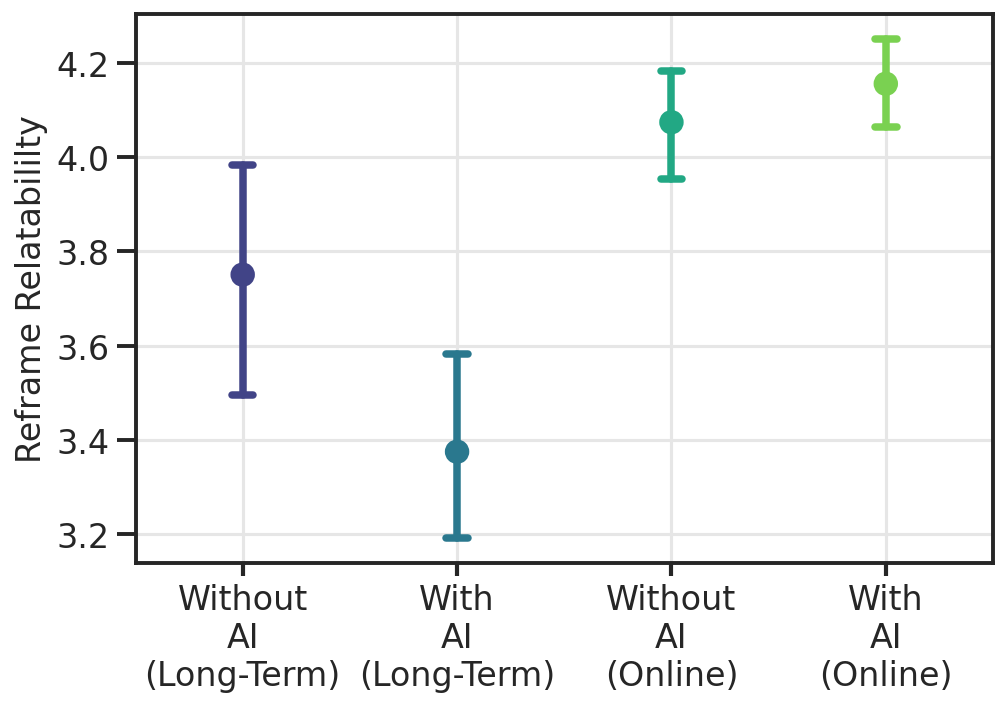

In [354]:
# PLot more_suggestions_btn vs. beelievable
g = sb.pointplot(data=output_df_combined, x='condition_map_new', y='reframe_relatability_w', palette='viridis', ci=95, join=False, capsize=0.1)


axs = g.axes
axs.grid()
axs.set_ylabel('Reframe Relatabililty', fontsize=16)
axs.set_xlabel('', fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)

# axs.set_ylim([3.66, 3.94])

# axs.set_yticks(np.arange(1.6, 2.40, 0.04), minor=True)
# axs.set_yticks(np.arange(1.6, 2.41, 0.2), minor=False)

# axs.set_yticklabels(['25%', '30%', '35%', '40%', '45%'])


fig = g.get_figure()
fig.set_size_inches(7, 5)

fig.tight_layout()

# fig.savefig('Plots/ai-emotion_change.svg')

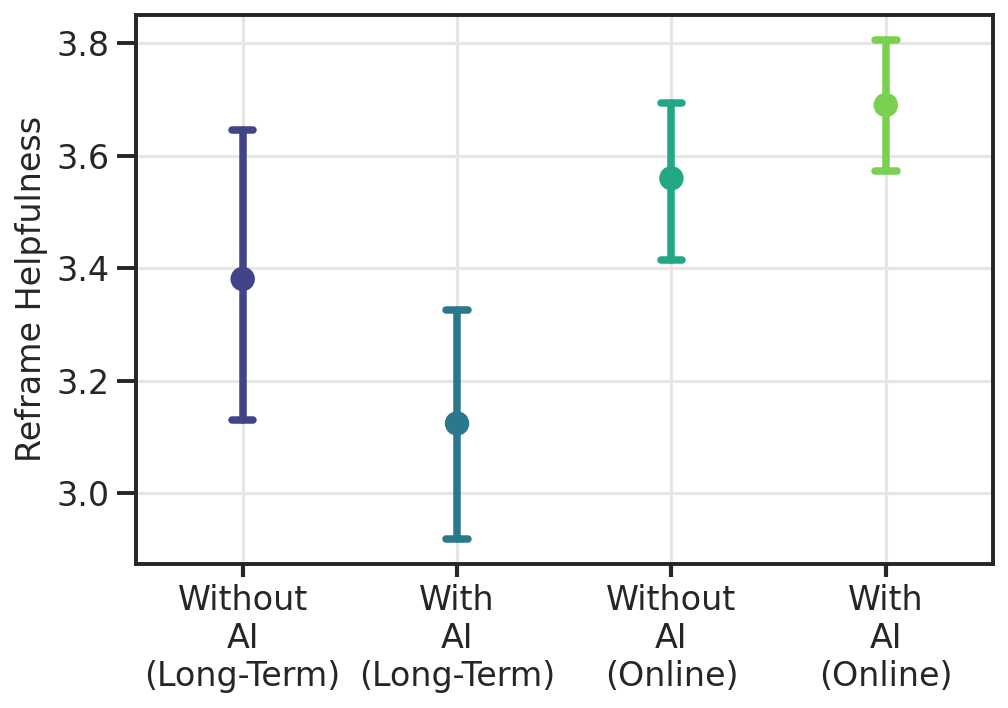

In [355]:
# PLot more_suggestions_btn vs. beelievable
g = sb.pointplot(data=output_df_combined, x='condition_map_new', y='reframe_helpfulness_w', palette='viridis', ci=95, join=False, capsize=0.1)


axs = g.axes
axs.grid()
axs.set_ylabel('Reframe Helpfulness', fontsize=16)
axs.set_xlabel('', fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)

# axs.set_ylim([3.66, 3.94])

# axs.set_yticks(np.arange(1.6, 2.40, 0.04), minor=True)
# axs.set_yticks(np.arange(1.6, 2.41, 0.2), minor=False)

# axs.set_yticklabels(['25%', '30%', '35%', '40%', '45%'])


fig = g.get_figure()
fig.set_size_inches(7, 5)

fig.tight_layout()

# fig.savefig('Plots/ai-emotion_change.svg')

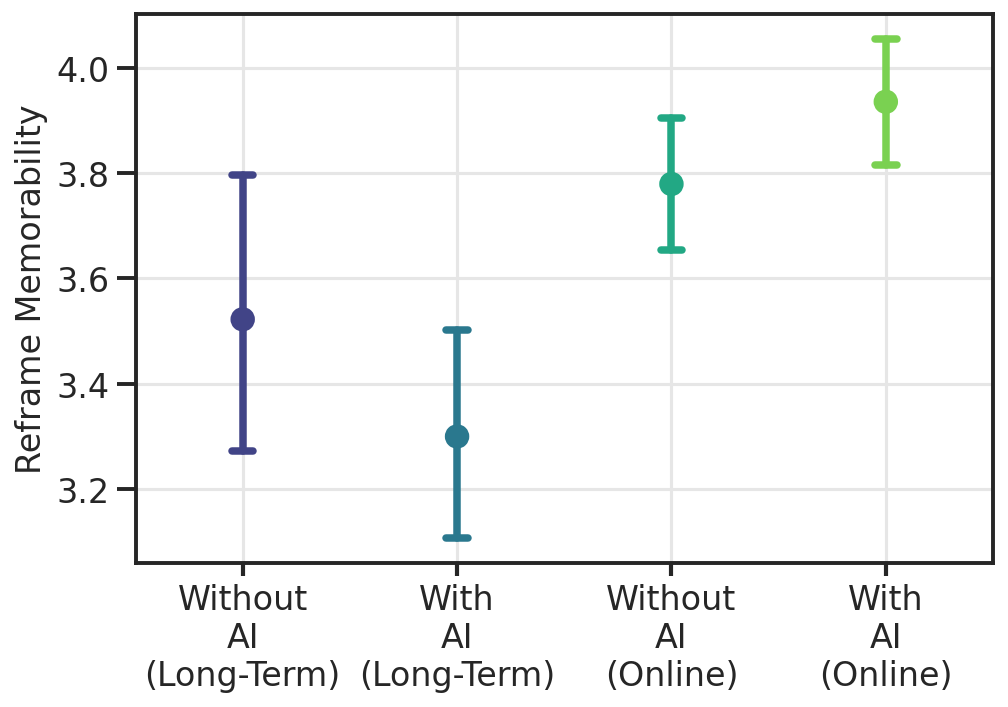

In [356]:
# PLot more_suggestions_btn vs. beelievable
g = sb.pointplot(data=output_df_combined, x='condition_map_new', y='reframe_memorability_w', palette='viridis', ci=95, join=False, capsize=0.1)


axs = g.axes
axs.grid()
axs.set_ylabel('Reframe Memorability', fontsize=16)
axs.set_xlabel('', fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)

# axs.set_ylim([3.66, 3.94])

# axs.set_yticks(np.arange(1.6, 2.40, 0.04), minor=True)
# axs.set_yticks(np.arange(1.6, 2.41, 0.2), minor=False)

# axs.set_yticklabels(['25%', '30%', '35%', '40%', '45%'])


fig = g.get_figure()
fig.set_size_inches(7, 5)

fig.tight_layout()

# fig.savefig('Plots/ai-emotion_change.svg')

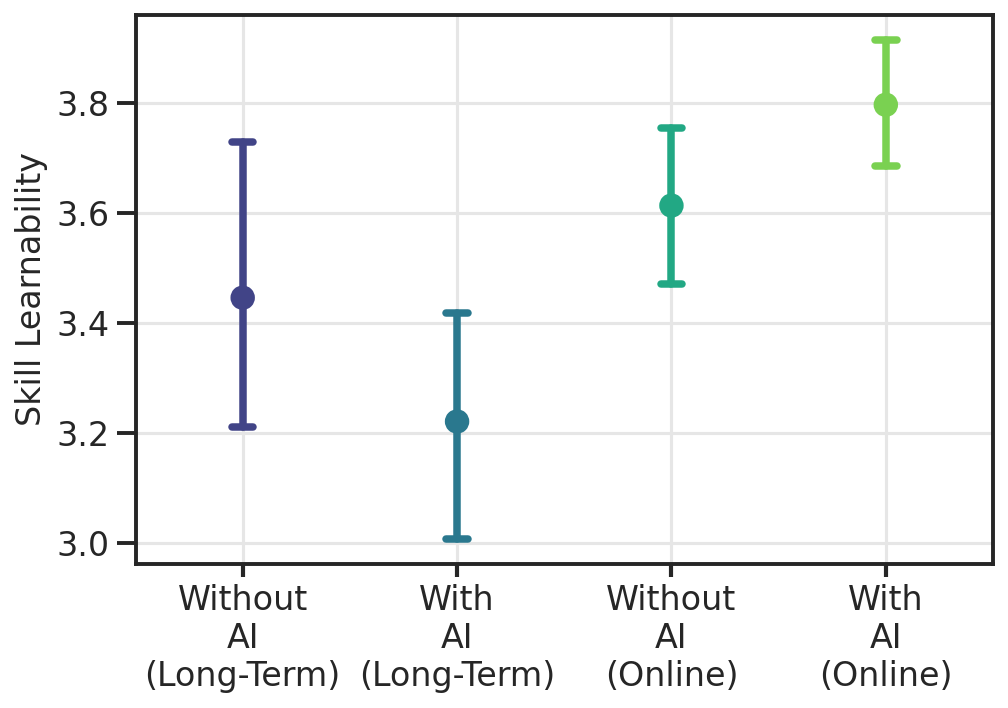

In [357]:
# PLot more_suggestions_btn vs. beelievable
g = sb.pointplot(data=output_df_combined, x='condition_map_new', y='skill_learnability_w', palette='viridis', ci=95, join=False, capsize=0.1)


axs = g.axes
axs.grid()
axs.set_ylabel('Skill Learnability', fontsize=16)
axs.set_xlabel('', fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)

# axs.set_ylim([3.66, 3.94])

# axs.set_yticks(np.arange(1.6, 2.40, 0.04), minor=True)
# axs.set_yticks(np.arange(1.6, 2.41, 0.2), minor=False)

# axs.set_yticklabels(['25%', '30%', '35%', '40%', '45%'])


fig = g.get_figure()
fig.set_size_inches(7, 5)

fig.tight_layout()

# fig.savefig('Plots/ai-emotion_change.svg')

In [348]:
output_df_weighted.groupby(['age_range', 'condition_map'])[['reframe_relatability', 'reframe_helpfulness', 'reframe_memorability', 'skill_learnability', 'reduction_in_emotion_intensity']].mean()

reframe_relatability  reframe_helpfulness  reframe_memorability  skill_learnability  reduction_in_emotion_intensity
age_range condition_map                                                                                                                     
18-24     With\nAI                   4.206452             3.916129              4.051613            3.993548                        1.832258
          Without\nAI                4.027972             3.545455              3.524476            3.650350                        1.146853
25-34     With\nAI                   4.103797             3.891139              4.096203            4.020253                        1.463291
          Without\nAI                4.167300             3.764259              4.064639            3.969582                        1.836502
35-44     With\nAI                   4.044568             3.629526              4.025070            3.637883                        1.353760
          Without\nAI                4.291176             3.911765              4.055882            3.964706                        1.850000
45-54     With\nAI                   4.021739             3.778986              3.931159            3.971014                        1.637681
          Without\nAI                4.107143             3.366071              3.964286            3.669643                        1.803571
55-64     With\nAI                   3.408163             3.102041              3.693878            2.877551                        1.061224
          Without\nAI                4.161290             3.854839              4.258065            4.225806                        2.225806
65+       With\nAI                   4.500000             4.000000              4.000000            4.500000                        2.500000
          Without\nAI                4.062500             3.937500              4.187500            3.562500                        2.437500

In [318]:
output_df_weighted['age_range'].value_counts(normalize=True).sort_index()

18-24    0.154639
25-34    0.305842
35-44    0.307560
45-54    0.175830
55-64    0.048683
65+      0.007446
Name: age_range, dtype: float64

In [312]:
output_df_weighted.groupby('age_range')['weights'].mean()

age_range
18-24    2.539107
25-34    0.601630
35-44    0.475498
45-54    0.641901
55-64    1.044910
65+      1.708026
Name: weights, dtype: float64

In [316]:
output_df_weighted.loc[output_df_weighted['age_range'] != '18-24'].groupby(['condition_map',])[['reframe_relatability_w', 'reframe_helpfulness_w', 'reframe_memorability_w', 'skill_learnability_w', 'reduction_in_emotion_intensity_w']].mean()

reframe_relatability_w  reframe_helpfulness_w  \
condition_map                                                  
With\nAI                     2.357272               2.197210   
Without\nAI                  2.620170               2.366316   

               reframe_memorability_w  skill_learnability_w  \
condition_map                                                 
With\nAI                     2.364588              2.275657   
Without\nAI                  2.530214              2.467253   

               reduction_in_emotion_intensity_w  
condition_map                                    
With\nAI                               0.858867  
Without\nAI                            1.202839

In [174]:
output_df.loc[~output_df['age'].isna()]

start_time                         end_time  \
0    2023-11-21 20:45:48.139754+00:00 2023-11-21 20:51:08.777235+00:00   
1    2023-11-21 20:51:30.889579+00:00 2023-11-21 20:53:39.364902+00:00   
2    2023-11-22 03:57:21.853551+00:00 2023-11-22 04:03:24.755023+00:00   
3    2023-11-22 04:58:52.296187+00:00 2023-11-22 05:09:09.184732+00:00   
4    2023-11-22 05:09:54.598337+00:00 2023-11-22 05:15:54.564080+00:00   
...                               ...                              ...   
2250 2024-02-14 02:00:19.807238+00:00 2024-02-14 02:02:49.563482+00:00   
2251 2024-02-14 02:01:27.894296+00:00 2024-02-14 02:06:28.697597+00:00   
2254 2024-02-14 07:26:27.363604+00:00 2024-02-14 07:51:41.102776+00:00   
2255 2024-02-14 12:12:39.414575+00:00 2024-02-14 12:14:59.614532+00:00   
2256 2024-02-14 13:13:19.464729+00:00 2024-02-14 13:16:19.636937+00:00   

      thought_record_id                              email condition_x  \
0                    47               lyttles131@yahoo.com           1   
1                    48               lyttles131@yahoo.com           1   
2                    50             abbylange024@gmail.com           1   
3                    51  xxxmorganscrighton93xxx@gmail.com           2   
4                    52  xxxmorganscrighton93xxx@gmail.com           2   
...                 ...                                ...         ...   
2250               3381             casebonnbloo@gmail.com           1   
2251               3382        christina.ciaccia@gmail.com           2   
2254               3389             sunnydaze.cm@gmail.com           1   
2255               3390                kjp042179@gmail.com           1   
2256               3392                 ld146344@gmail.com           2   

      reframe_relatability  reframe_helpfulness  reframe_memorability  \
0                      5.0                  4.0                   5.0   
1                      5.0                  4.0                   4.0   
2                      5.0                  4.0                   4.0   
3                      5.0                  5.0                   5.0   
4                      4.0                  5.0                   5.0   
...                    ...                  ...                   ...   
2250                   4.0                  4.0                   4.0   
2251                   4.0                  4.0                   4.0   
2254                   4.0                  4.0                   4.0   
2255                   5.0                  5.0                   5.0   
2256                   5.0                  2.0                   4.0   

      skill_learnability belief_1  ... phq_total_range gad7_total_range  \
0                    5.0           ...           15-19            10-14   
1                    5.0           ...           15-19            10-14   
2                    4.0           ...           10-14            10-14   
3                    5.0           ...           15-19            10-14   
4                    5.0           ...           15-19            10-14   
...                  ...      ...  ...             ...              ...   
2250                 4.0           ...             5-9            10-14   
2251                 5.0           ...           20-27  greater than 15   
2254                 4.0           ...           20-27  greater than 15   
2255                 5.0           ...           20-27  greater than 15   
2256                 2.0           ...           10-14              5-9   

      condition_map_y  age_range  \
0     DIY, without AI      35-44   
1     DIY, without AI      35-44   
2     DIY, without AI      18-24   
3        DIY, with AI      25-34   
4        DIY, with AI      25-34   
...               ...        ...   
2250  DIY, without AI      25-34   
2251     DIY, with AI      45-54   
2254  DIY, without AI      25-34   
2255  DIY, without AI      35-44   
2256     DIY, with AI      35-44   

                                      

## Analysis over Time

In [142]:
output_df.columns

Index(['start_time', 'end_time', 'thought_record_id', 'email', 'condition_x',
       'reframe_relatability', 'reframe_helpfulness', 'reframe_memorability',
       'skill_learnability', 'belief_1', 'emotion_strength_1', 'belief_2',
       'emotion_strength_2', 'all_belief', 'all_emotion_strength',
       'emotion_strength', 'belief', 'reduction_in_belief',
       'reduction_in_emotion_intensity', 'condition_map_x', 'study_id',
       'condition_y', 'date_consent', 'consent_yn', 'consent_complete', 'age',
       'phq_total', 'phq9_complete', 'gad7_total', 'gad7_complete', 'hope_q',
       'hope_complete', 'cr_use_q', 'therapy_post_diy', 'talk', 'seekmh',
       'miscq_complete', 'phq_week_1', 'gad7_week_1', 'phq_week_2',
       'gad7_week_2', 'phq_week_3', 'gad7_week_3', 'phq_week_4', 'gad7_week_4',
       'phq_total_range', 'gad7_total_range', 'condition_map_y', 'gender',
       'race', 'age_range', 'tool_went_well', 'tool_didnt_well',
       'tool_other_comments', 'condition_map', 'phq

In [143]:
output_df['email']

0                    lyttles131@yahoo.com
1                    lyttles131@yahoo.com
2                  abbylange024@gmail.com
3       xxxmorganscrighton93xxx@gmail.com
4       xxxmorganscrighton93xxx@gmail.com
                      ...                
3525               rockyroxie15@gmail.com
3526              hayliebutcher@gmail.com
3527               rockyroxie15@gmail.com
3528              demo@beeline-online.net
3529              hnrutten74@spectrum.net
Name: email, Length: 3489, dtype: object

In [144]:
# sort by username, start_time
output_df = output_df.sort_values(by=['email', 'start_time'], ascending=True)

In [145]:
# user counts

USER_COUNTS = output_df['email'].value_counts().reset_index()
#rename to counts
USER_COUNTS.columns = ['email', 'counts']

In [146]:
USER_COUNTS

email  counts
0       shannonjenkins89@gmail.com      38
1             rdwinegard@gmail.com      37
2    aliciabustillos4you@gmail.com      34
3              kjp042179@gmail.com      30
4           debrasatmary@gmail.com      25
..                             ...     ...
459     ashleighjimenez2@gmail.com       1
460           samleigh96@gmail.com       1
461     carmennicolas254@gmail.com       1
462      cargil.jennifer@yahoo.com       1
463             kcar00@hotmail.com       1

[464 rows x 2 columns]

In [147]:
output_df['condition_map'] = output_df['condition_map_y']

In [148]:
# output_df condition_map ordered
output_df['condition_map'] = pd.Categorical(output_df['condition_map'], categories=['DIY, without AI', 'DIY, with AI'], ordered=True)

In [149]:
output_df['condition_map'].value_counts()

DIY, with AI       1965
DIY, without AI    1524
Name: condition_map, dtype: int64

In [150]:
# sort by USER_COUNTS, email, start_time
output_df = output_df.merge(USER_COUNTS, on='email')

# sort
output_df = output_df.sort_values(by=['counts', 'email', 'start_time'], ascending=True)

In [151]:
Q = """SELECT username,study_id,condition,week_1_start,survey_1_status FROM study_userdetails ORDER BY study_userdetails.id ASC"""

cur.execute(Q)
records = cur.fetchall()

userdetails_df = pd.DataFrame(records, columns = ['username','study_id', 'condition', 'week_1_start', 'survey_1_status'])

userdetails_df['study_id'] = userdetails_df['study_id'].astype('int')

discard_usernames = userdetails_df.loc[userdetails_df['study_id'] < 70]['username'].tolist() #+ userdetails_df.loc[userdetails_df['survey_1_status'] != 1]['username'].tolist()

# create a dict of study_id to condition from userdetails_df
study_id_to_condition = dict(zip(userdetails_df['study_id'], userdetails_df['condition']))

username_to_week_1_start = dict(zip(userdetails_df['username'], userdetails_df['week_1_start']))

In [152]:
def compute_current_week_no(username):
	from pytz import timezone

	# compute current week num for the user
	curr_date = datetime.now().astimezone(timezone('US/Pacific'))

	# get date_started from UserDetails
	date_started = UserDetails.objects.filter(username = username)[0].week_1_start

	# compute week_no
	week_no = (curr_date - date_started).days // 7 + 1

	return week_no


In [153]:
# week_1_start
output_df['date_started'] = output_df['email'].map(username_to_week_1_start)

# compute week_no
# week_no = (curr_date - date_started).days // 7 + 1
output_df['date_started'] = pd.to_datetime(output_df['date_started'])

output_df['start_time'] = pd.to_datetime(output_df['start_time'])

output_df['week_no'] = output_df.apply(lambda row: (row['start_time'] - row['date_started']).days // 7 + 1, axis=1)

# week_no = 1

# compute_current_week_no(
output_df['curr_week_no'] = output_df.apply(lambda row: compute_current_week_no(row['email']), axis=1)


In [154]:
output_df['week_no'].value_counts()

1     1328
2      850
3      698
4      516
5       46
6       25
7        8
8        7
9        4
10       3
11       2
0        1
16       1
Name: week_no, dtype: int64

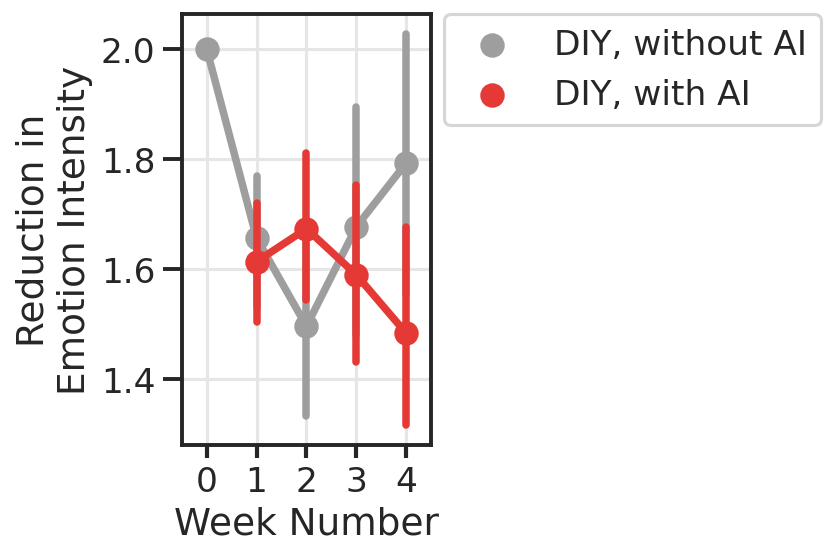

In [155]:
g = sb.pointplot(data=output_df.loc[output_df['week_no'] <= 4], x='week_no', y='reduction_in_emotion_intensity', hue='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes
axs.grid()
axs.set_xlabel('Week Number')
axs.set_ylabel('Reduction in\nEmotion Intensity')

# legend outide on the right
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

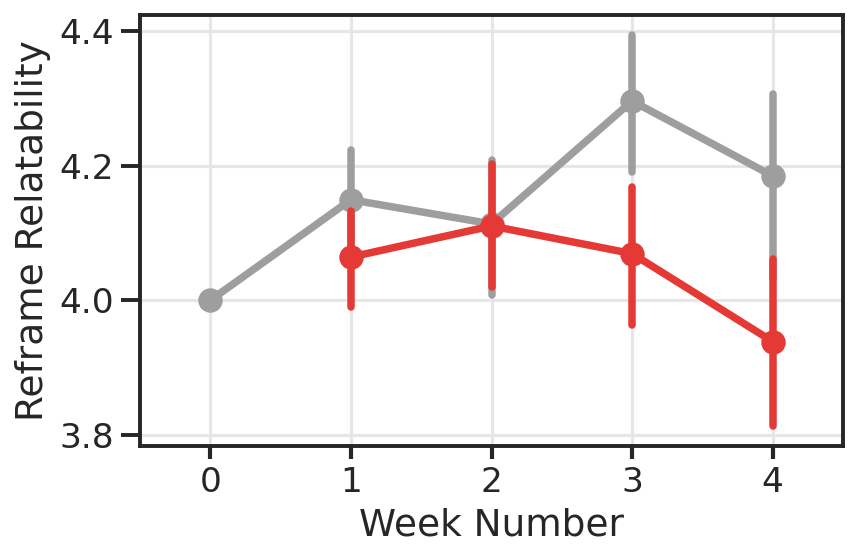

In [156]:
g = sb.pointplot(data=output_df.loc[output_df['week_no'] <= 4], x='week_no', y='reframe_relatability', hue='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes
axs.grid()
axs.set_xlabel('Week Number')
axs.set_ylabel('Reframe Relatability')

# legend outide on the right
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# remove legend
plt.legend([],[], frameon=False)

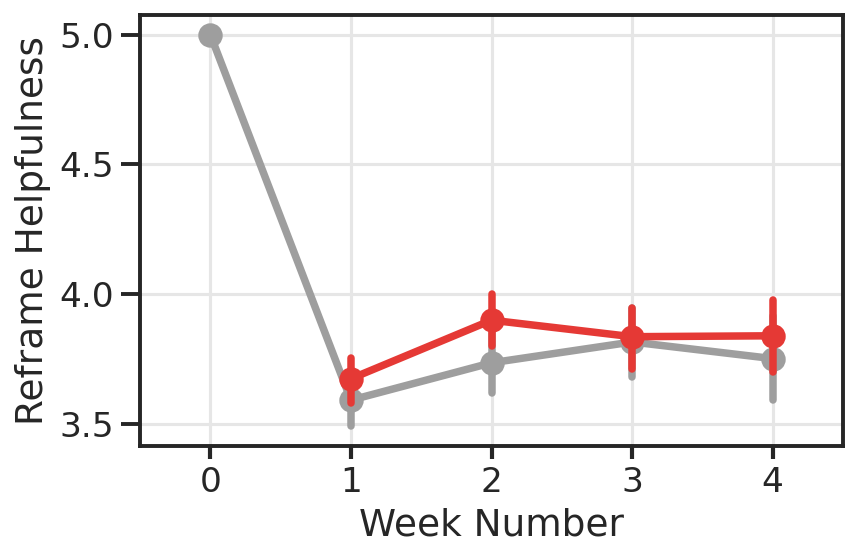

In [157]:
g = sb.pointplot(data=output_df.loc[output_df['week_no'] <= 4], x='week_no', y='reframe_helpfulness', hue='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes
axs.grid()
axs.set_xlabel('Week Number')
axs.set_ylabel('Reframe Helpfulness')

# legend outide on the right
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# remove legend
plt.legend([],[], frameon=False)

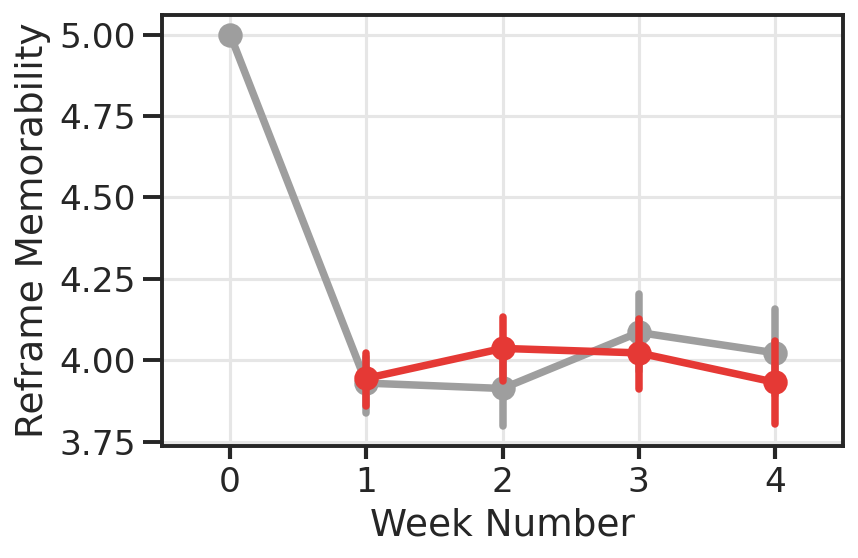

In [158]:
g = sb.pointplot(data=output_df.loc[output_df['week_no'] <= 4], x='week_no', y='reframe_memorability', hue='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes
axs.grid()
axs.set_xlabel('Week Number')
axs.set_ylabel('Reframe Memorability')

# legend outide on the right
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# remove legend
plt.legend([],[], frameon=False)

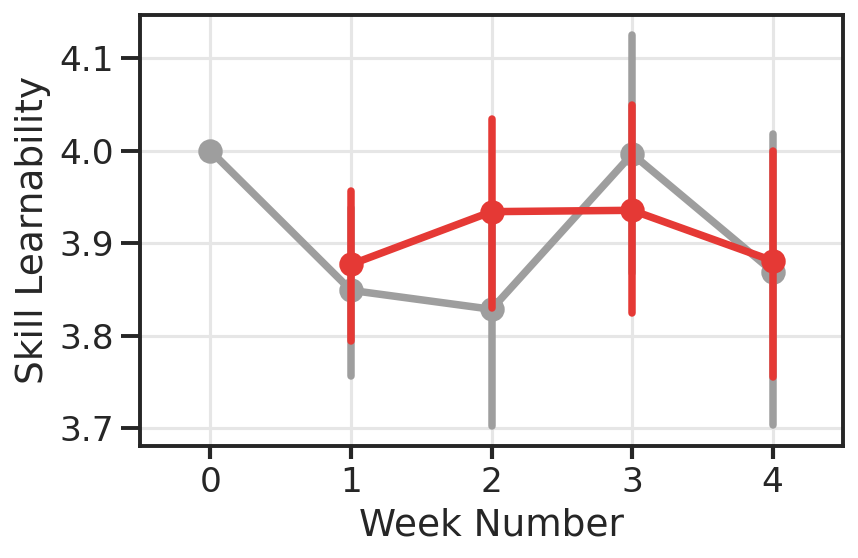

In [159]:
g = sb.pointplot(data=output_df.loc[output_df['week_no'] <= 4], x='week_no', y='skill_learnability', hue='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes
axs.grid()
axs.set_xlabel('Week Number')
axs.set_ylabel('Skill Learnability')

# legend outide on the right
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# remove legend
plt.legend([],[], frameon=False)

In [160]:
# compute cohen'd for week 1, 2, 3, and 4 b/w two condition_map
tmp_df = output_df.loc[output_df['week_no'] == 4]

print('Reduction in Emotion Intensity:', cohen_d(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['reduction_in_emotion_intensity'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['reduction_in_emotion_intensity']), ttest_ind(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['reduction_in_emotion_intensity'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['reduction_in_emotion_intensity']))
print('Reframe Relatibility:', cohen_d(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['reframe_relatability'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['reframe_relatability']), ttest_ind(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['reframe_relatability'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['reframe_relatability']))
print('Reframe Helpfulness:', cohen_d(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['reframe_helpfulness'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['reframe_helpfulness']), ttest_ind(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['reframe_helpfulness'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['reframe_helpfulness']))
print('Reframe Memorability:', cohen_d(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['reframe_memorability'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['reframe_memorability']), ttest_ind(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['reframe_memorability'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['reframe_memorability']))
print('Skill Learnability:', cohen_d(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['skill_learnability'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['skill_learnability']), ttest_ind(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['skill_learnability'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['skill_learnability']))




Reduction in Emotion Intensity: -0.185872880065992 Ttest_indResult(statistic=-2.0904574391575927, pvalue=0.03706740444244217)
Reframe Relatibility: -0.2283044937823355 Ttest_indResult(statistic=-2.567673278914847, pvalue=0.01051995214382464)
Reframe Helpfulness: 0.07350011418074634 Ttest_indResult(statistic=0.8266340975268832, pvalue=0.4088280449543762)
Reframe Memorability: -0.08169073959211043 Ttest_indResult(statistic=-0.9187516448337308, pvalue=0.3586564201826913)
Skill Learnability: 0.009996876554067646 Ttest_indResult(statistic=0.11243192096324768, pvalue=0.9105248410302679)


In [161]:
# sort by start time
output_df = output_df
tmp_df = output_df.loc[output_df['week_no'] == 4]

print('Reduction in Emotion Intensity:', cohen_d(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['reduction_in_emotion_intensity'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['reduction_in_emotion_intensity']), ttest_ind(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['reduction_in_emotion_intensity'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['reduction_in_emotion_intensity']))
print('Reframe Relatibility:', cohen_d(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['reframe_relatability'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['reframe_relatability']), ttest_ind(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['reframe_relatability'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['reframe_relatability']))
print('Reframe Helpfulness:', cohen_d(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['reframe_helpfulness'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['reframe_helpfulness']), ttest_ind(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['reframe_helpfulness'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['reframe_helpfulness']))
print('Reframe Memorability:', cohen_d(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['reframe_memorability'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['reframe_memorability']), ttest_ind(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['reframe_memorability'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['reframe_memorability']))
print('Skill Learnability:', cohen_d(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['skill_learnability'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['skill_learnability']), ttest_ind(tmp_df.loc[tmp_df['condition_map'] == 'DIY, with AI']['skill_learnability'], tmp_df.loc[tmp_df['condition_map'] == 'DIY, without AI']['skill_learnability']))



Reduction in Emotion Intensity: -0.185872880065992 Ttest_indResult(statistic=-2.0904574391575927, pvalue=0.03706740444244217)
Reframe Relatibility: -0.2283044937823355 Ttest_indResult(statistic=-2.567673278914847, pvalue=0.01051995214382464)
Reframe Helpfulness: 0.07350011418074634 Ttest_indResult(statistic=0.8266340975268832, pvalue=0.4088280449543762)
Reframe Memorability: -0.08169073959211043 Ttest_indResult(statistic=-0.9187516448337308, pvalue=0.3586564201826913)
Skill Learnability: 0.009996876554067646 Ttest_indResult(statistic=0.11243192096324768, pvalue=0.9105248410302679)


In [162]:
min_start_time_users = output_df.groupby('email')['start_time'].min().reset_index()

min_start_time_users

email                       start_time
0     06-turgid-uptake@icloud.com 2023-11-29 14:08:17.724877+00:00
1         2011ravenjade@gmail.com 2023-12-29 22:58:36.106740+00:00
2               23wehog@gmail.com 2023-12-19 20:14:56.042724+00:00
3            525natalia@gmail.com 2024-01-23 19:11:06.799041+00:00
4             a.wendorf@yahoo.com 2024-03-11 03:17:01.804907+00:00
..                            ...                              ...
459       ybloodyangely@yahoo.com 2024-02-22 08:45:10.261461+00:00
460         ylswindle01@gmail.com 2024-03-16 04:31:33.480695+00:00
461  yolandabrumfield49@gmail.com 2024-01-29 20:05:00.745030+00:00
462   zachary.robertson@gmail.com 2024-01-30 03:03:15.789485+00:00
463     zimmerman_ariel@yahoo.com 2024-01-27 03:00:26.128258+00:00

[464 rows x 2 columns]

(array([738855., 738869., 738886., 738900., 738917., 738931., 738946.,
        738960.]), <a list of 8 Text major ticklabel objects>)

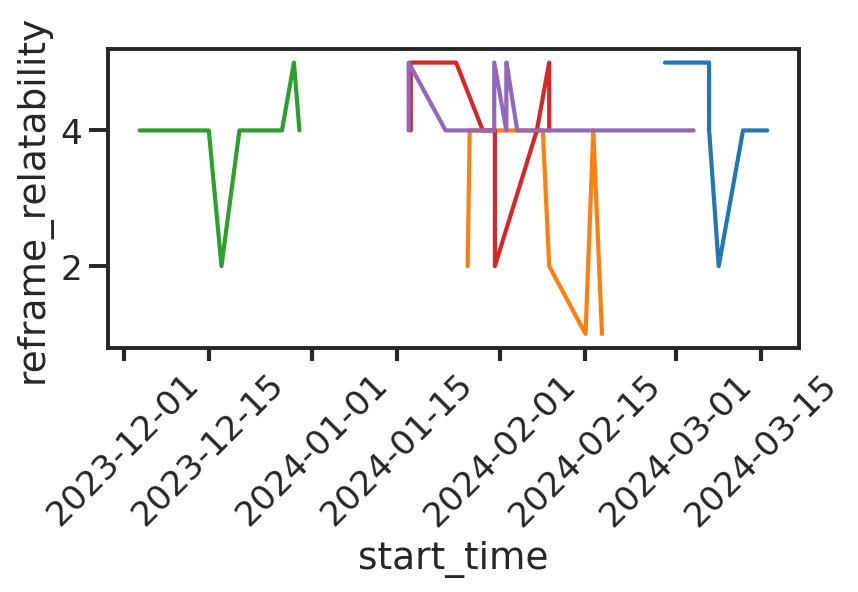

In [163]:
# spaghetti plots over time for five random users with counts >= 10

# sample users
sample_users = output_df.loc[(output_df['counts'] >= 10)]['email'].sample(5)

g = sb.lineplot(data=output_df.loc[output_df['email'].isin(sample_users)], x='start_time', y='reframe_relatability', hue='email')

# remove legend
g.get_legend().remove()

# rotate x-axis
plt.xticks(rotation=45)

(array([738855., 738869., 738886., 738900., 738917., 738931., 738946.,
        738960.]), <a list of 8 Text major ticklabel objects>)

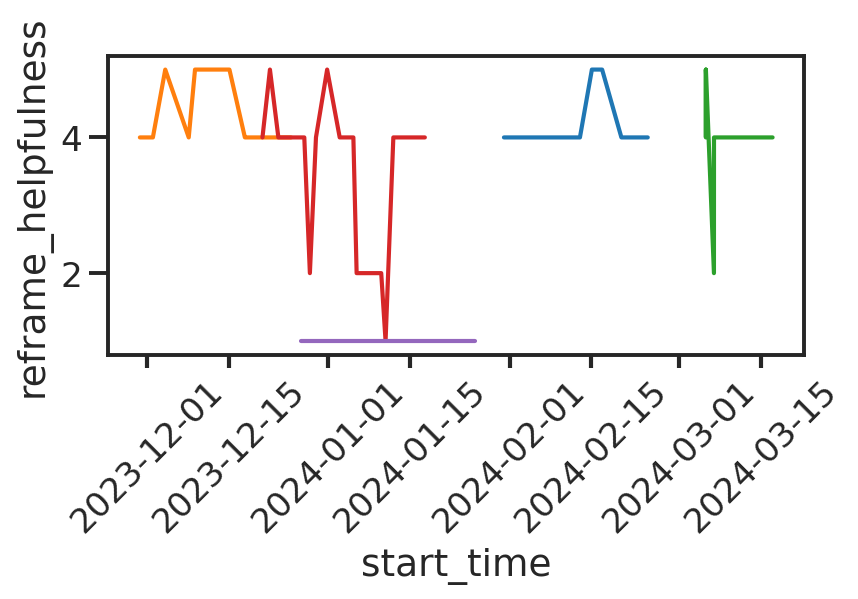

In [164]:
# spaghetti plots over time for five random users with counts >= 10

# sample users
sample_users = output_df.loc[(output_df['counts'] >= 10)]['email'].sample(5)

g = sb.lineplot(data=output_df.loc[output_df['email'].isin(sample_users)], x='start_time', y='reframe_helpfulness', hue='email')

# remove legend
g.get_legend().remove()

# rotate x-axis
plt.xticks(rotation=45)

(array([738855., 738869., 738886., 738900., 738917., 738931.]),
 <a list of 6 Text major ticklabel objects>)

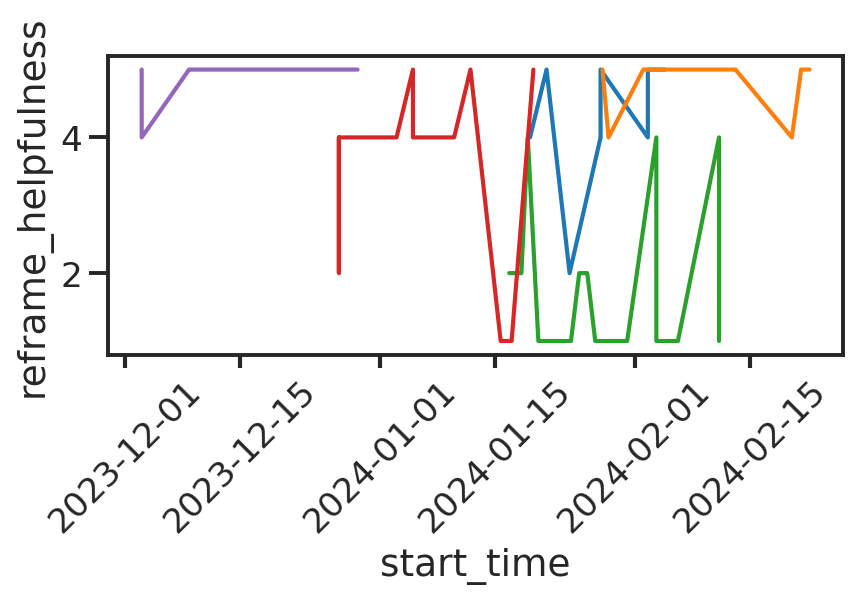

In [165]:
# spaghetti plots over time for five random users with counts >= 10

# sample users
sample_users = output_df.loc[(output_df['counts'] >= 10)]['email'].sample(5)

g = sb.lineplot(data=output_df.loc[output_df['email'].isin(sample_users)], x='start_time', y='reframe_helpfulness', hue='email')

# remove legend
g.get_legend().remove()

# rotate x-axis
plt.xticks(rotation=45)

In [166]:
len(output_df)#.columns

3489

In [167]:
output_df = output_df.merge(thought_records_with_outcomes_df[['thought_record_id', 'thought', 'situation']], on='thought_record_id', how='left')

In [168]:
output_df = output_df.merge(thought_records_with_outcomes_df[['thought_record_id', 'thinking_trap_selected']], on='thought_record_id', how='left')

In [169]:
len(output_df)

3489

In [170]:
output_df[['thought_record_id', 'thought', 'situation']].to_csv('/projects/bdata/talklife/dssg/ashish/Codes/Cognitive-Distortions/study_analysis.csv', index=False)

In [171]:
theme_df = pd.read_csv('/projects/bdata/talklife/dssg/ashish/Codes/Cognitive-Distortions/study_analysis_theme_output.csv')

In [172]:
output_df = pd.merge(output_df, theme_df[['thought_record_id', 'theme']], on='thought_record_id', how='left')

In [206]:


# number of themes each week

username_to_week_nos = {}

for index, row in output_df.iterrows():
	curr_theme = row['theme']
	curr_username = row['email']
	curr_week_no = row['curr_week_no']

	if curr_username not in username_to_week_nos:
		username_to_week_nos[curr_username] = {}

	if curr_week_no not in username_to_week_nos[curr_username]:
		username_to_week_nos[curr_username][curr_week_no] = set()

	username_to_week_nos[curr_username][curr_week_no].add(curr_theme)


In [207]:
# number of themes in each week

def get_num_themes(username, week_no):
	return len(username_to_week_nos[username][week_no])

output_df['num_theme_week'] = output_df.apply(lambda row: get_num_themes(row['email'], row['curr_week_no']), axis=1)

In [175]:


# number of themes each week

username_to_week_no_counts = {}

for index, row in output_df.iterrows():
	curr_username = row['email']
	curr_week_no = row['curr_week_no']

	if curr_username not in username_to_week_no_counts:
		username_to_week_no_counts[curr_username] = {}

	if curr_week_no not in username_to_week_no_counts[curr_username]:
		username_to_week_no_counts[curr_username][curr_week_no] = 0

	username_to_week_no_counts[curr_username][curr_week_no] += 1


In [176]:
# number of themes in each week

def get_num_records(username, week_no):
	return username_to_week_no_counts[username][week_no]

output_df['num_records_week'] = output_df.apply(lambda row: get_num_records(row['email'], row['curr_week_no']), axis=1)

In [177]:
output_df['avg_theme_week'] = output_df.apply(lambda row: row['num_theme_week'] / row['num_records_week'], axis=1)

In [178]:
output_df['num_theme_week'].value_counts()

5     810
6     644
4     595
7     392
3     366
8     269
2     222
1     136
10     90
9      73
12     38
Name: num_theme_week, dtype: int64

In [182]:
output_df['num_records_week'].value_counts()

12    576
13    260
6     258
10    250
15    225
11    209
9     207
14    196
7     168
16    128
3     126
8     112
18    108
5      90
2      80
4      68
1      67
21     63
20     60
19     57
25     50
38     38
37     37
34     34
17     34
31     31
30     30
27     27
24     24
22     22
Name: num_records_week, dtype: int64

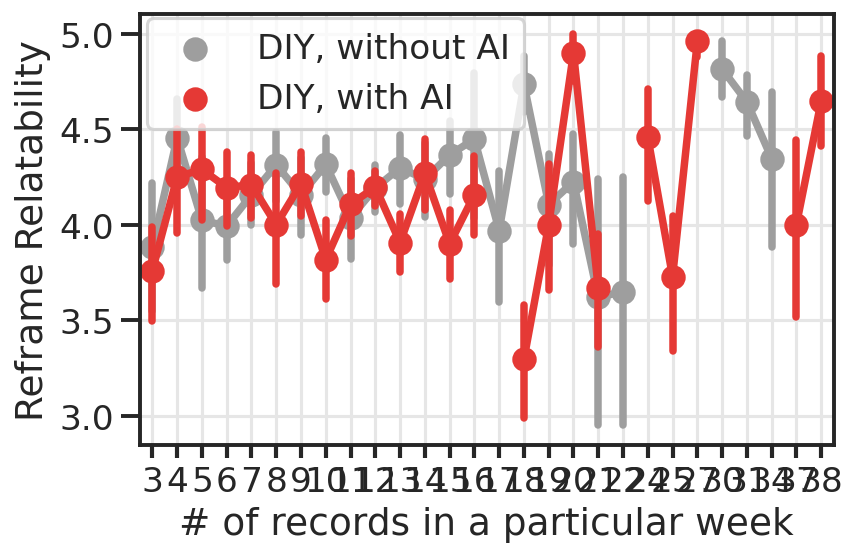

In [196]:
g = sb.pointplot(data=output_df.loc[(output_df['week_no'] <= 4) & (output_df['num_records_week'] >= 3)], x='num_records_week', y='reframe_relatability', hue='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes
axs.grid()
axs.set_xlabel('# of records in a particular week')
axs.set_ylabel('Reframe Relatability')

# legend outide on the top
plt.legend(bbox_to_anchor=(0.01, 0.99), loc=2, borderaxespad=0.)

# remove legend
# plt.legend([],[], frameon=False)

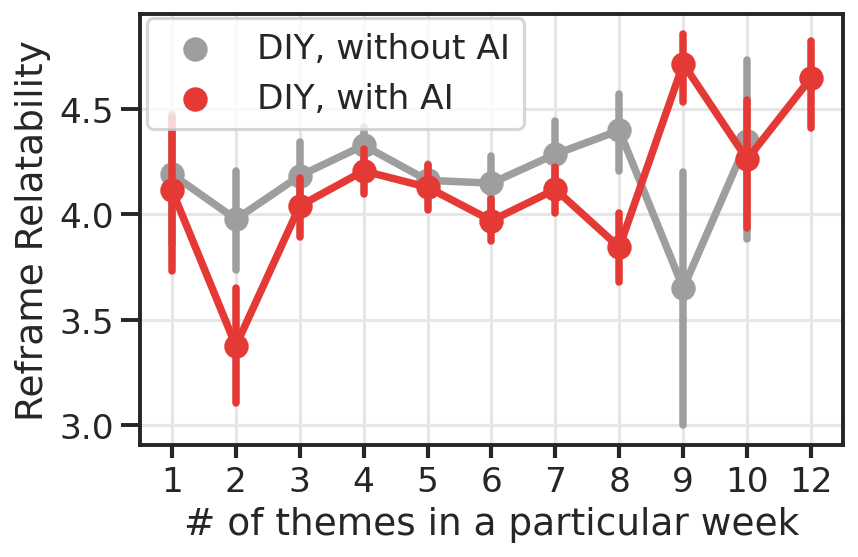

In [195]:
g = sb.pointplot(data=output_df.loc[(output_df['week_no'] <= 4) & (output_df['num_records_week'] >= 3)], x='num_theme_week', y='reframe_relatability', hue='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes
axs.grid()
axs.set_xlabel('# of themes in a particular week')
axs.set_ylabel('Reframe Relatability')

# legend outide on the top
plt.legend(bbox_to_anchor=(0.01, 0.99), loc=2, borderaxespad=0.)

# remove legend
# plt.legend([],[], frameon=False)

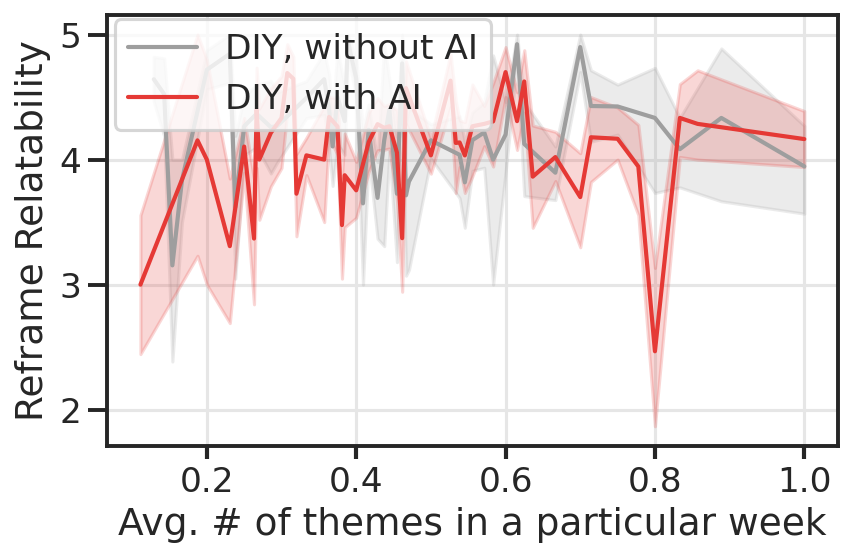

In [198]:
g = sb.lineplot(data=output_df.loc[(output_df['week_no'] <= 4) & (output_df['num_records_week'] >= 3)], x='avg_theme_week', y='reframe_relatability', hue='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes
axs.grid()
axs.set_xlabel('Avg. # of themes in a particular week')
axs.set_ylabel('Reframe Relatability')

# legend outide on the top
plt.legend(bbox_to_anchor=(0.01, 0.99), loc=2, borderaxespad=0.)

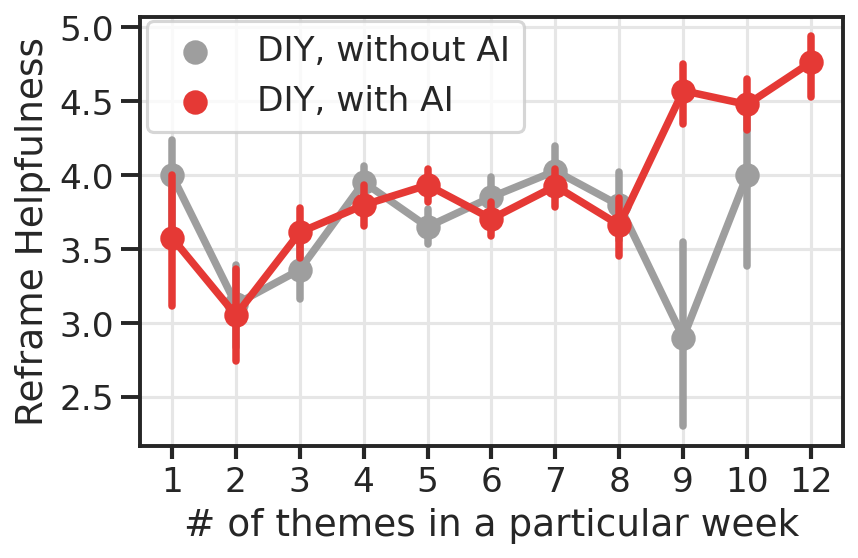

In [199]:
g = sb.pointplot(data=output_df.loc[(output_df['week_no'] <= 4) & (output_df['num_records_week'] >= 3)], x='num_theme_week', y='reframe_helpfulness', hue='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes
axs.grid()
axs.set_xlabel('# of themes in a particular week')
axs.set_ylabel('Reframe Helpfulness')

# legend outide on the right
plt.legend(bbox_to_anchor=(0.01, 0.99), loc=2, borderaxespad=0.)

# remove legend
# plt.legend([],[], frameon=False)

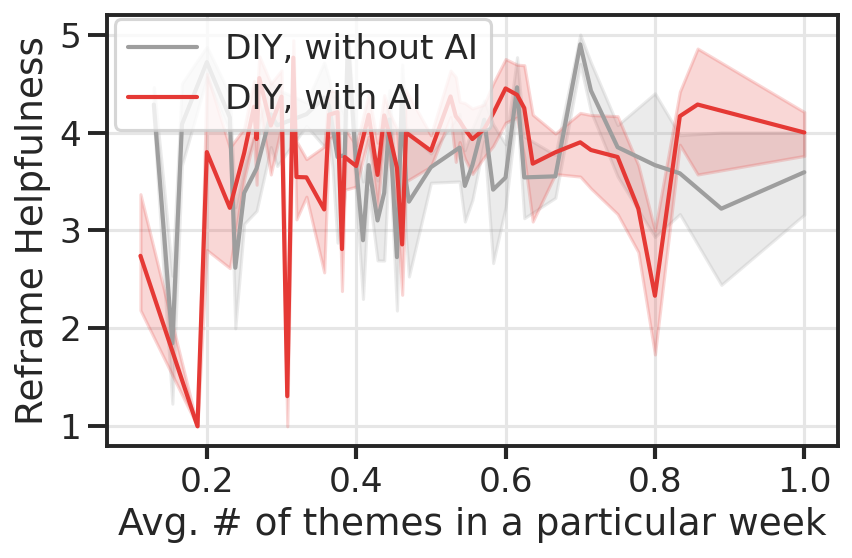

In [200]:
g = sb.lineplot(data=output_df.loc[(output_df['week_no'] <= 4) & (output_df['num_records_week'] >= 3)], x='avg_theme_week', y='reframe_helpfulness', hue='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes
axs.grid()
axs.set_xlabel('Avg. # of themes in a particular week')
axs.set_ylabel('Reframe Helpfulness')

plt.legend(bbox_to_anchor=(0.01, 0.99), loc=2, borderaxespad=0.)

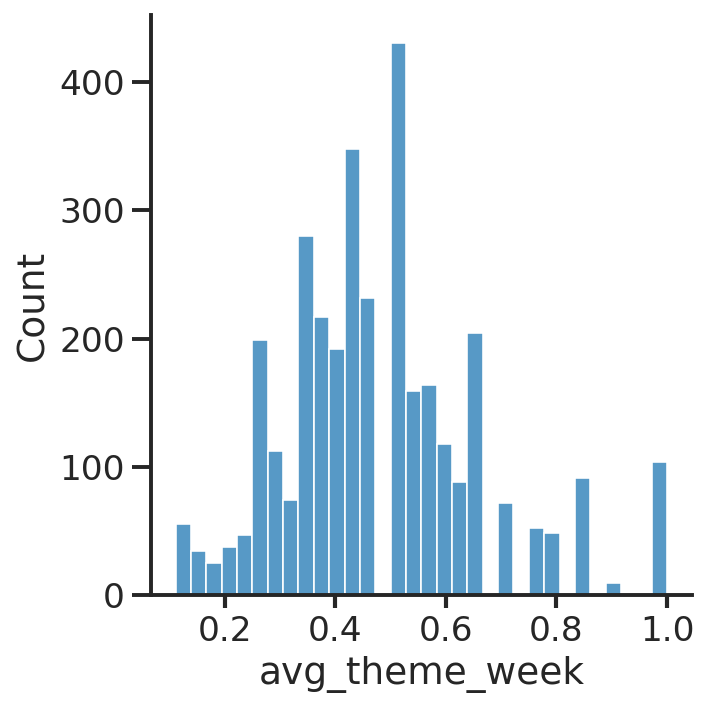

In [218]:
sb.displot(output_df.loc[(output_df['week_no'] <= 4) & (output_df['num_records_week'] >= 3)]['avg_theme_week'])

In [ ]:
g = sb.lineplot(data=output_df.loc[(output_df['week_no'] <= 4) & (output_df['num_records_week'] >= 3)], x='avg_theme_week', y='reframe_helpfulness', hue='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes
axs.grid()
axs.set_xlabel('Avg. # of themes in a particular week')
axs.set_ylabel('Reframe Helpfulness')

plt.legend(bbox_to_anchor=(0.01, 0.99), loc=2, borderaxespad=0.)

In [ ]:
g = sb.lineplot(data=output_df.loc[output_df['week_no'] <= 4], x='num_theme_week', y='reframe_relatability', hue='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes
axs.grid()
axs.set_xlabel('Avg. # of themes in a particular week')
axs.set_ylabel('Reframe Relatability')

# legend outide on the right
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# remove legend
# plt.legend([],[], frameon=False)

In [ ]:
g = sb.pointplot(data=output_df.loc[output_df['week_no'] <= 4], x='num_theme_week', y='reframe_relatability', hue='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes
axs.grid()
axs.set_xlabel('Number of themes in a particular week')
axs.set_ylabel('Reframe Relatability')

# legend outide on the right
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# remove legend
# plt.legend([],[], frameon=False)

In [151]:
output_df.to_csv('output_df.csv', index=False)

In [202]:
output_df['thinking_trap_selected']

0       Negative Feeling or Emotion;All-or-Nothing Thi...
1       Overgeneralizing;Negative Feeling or Emotion;O...
2       Negative Feeling or Emotion;Disqualifying the ...
3       Comparing and Despairing;Fortune Telling;Shoul...
4             Catastrophizing;Negative Feeling or Emotion
                              ...                        
3630                            Labeling;Overgeneralizing
3631            Personalizing;Negative Feeling or Emotion
3632             Mind Reading;Negative Feeling or Emotion
3633             Negative Feeling or Emotion;Mind Reading
3634                               Personalizing;Labeling
Name: thinking_trap_selected, Length: 3635, dtype: object

In [201]:
# number of thinking_trap_selected for each username

username_set = set(output_df['email'])

username_to_thinking_trap_selected = {}

for username in username_set:
	username_to_thinking_trap_selected[username] = set()

	curr_selected = output_df.loc[output_df['email'] == username]['thinking_trap_selected'].values.tolist()
	
	for elem in curr_selected:
		if pd.isna(elem):
			print('empty')
			continue
		elem_li = elem.strip().split(';')

		for inner_elem in elem_li:
			username_to_thinking_trap_selected[username].add(inner_elem.strip())

empty
empty
empty
empty
empty
empty


empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty


In [203]:


# number of themes each week

username_to_week_nos_traps = {}

for index, row in output_df.iterrows():
	curr_username = row['email']
	curr_week_no = row['curr_week_no']
	curr_selected = row['thinking_trap_selected']
	if pd.isna(curr_selected):
		print('empty')
		continue

	if curr_username not in username_to_week_nos_traps:
		username_to_week_nos_traps[curr_username] = {}

	if curr_week_no not in username_to_week_nos_traps[curr_username]:
		username_to_week_nos_traps[curr_username][curr_week_no] = set()
	
		
	curr_selected_li = curr_selected.strip().split(';')

	for inner_elem in curr_selected_li:
		username_to_week_nos_traps[curr_username][curr_week_no].add(inner_elem.strip())


empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty


In [205]:
# number of thinking traps for each user

def get_num_traps(username, week_no):
	return len(username_to_week_nos_traps[username][week_no])

output_df['num_traps_week'] = output_df.apply(lambda row: get_num_traps(row['email'], row['curr_week_no']), axis=1)	

In [209]:
output_df['avg_traps_week'] = output_df.apply(lambda row: row['num_traps_week'] / row['num_records_week'], axis=1)

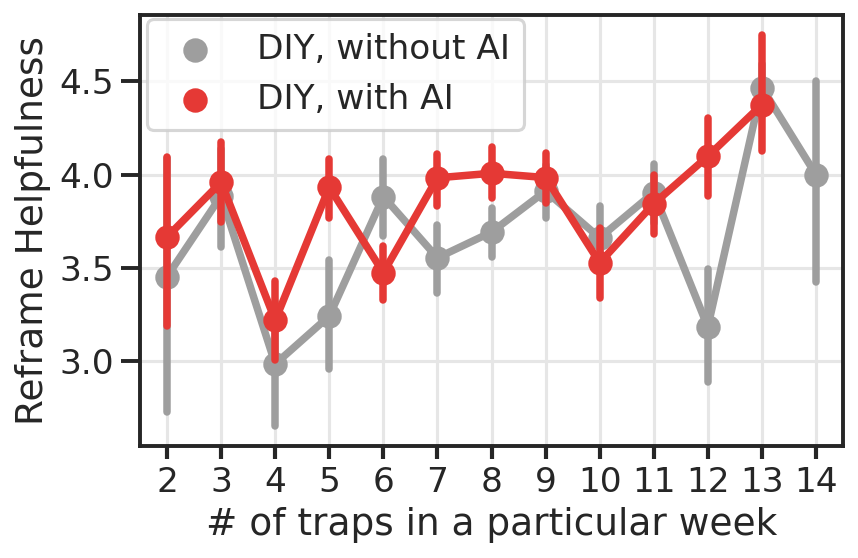

In [208]:
g = sb.pointplot(data=output_df.loc[(output_df['week_no'] <= 4) & (output_df['num_records_week'] >= 3)], x='num_traps_week', y='reframe_helpfulness', hue='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes
axs.grid()
axs.set_xlabel('# of traps in a particular week')
axs.set_ylabel('Reframe Helpfulness')

# legend outide on the right
plt.legend(bbox_to_anchor=(0.01, 0.99), loc=2, borderaxespad=0.)

# remove legend
# plt.legend([],[], frameon=False)

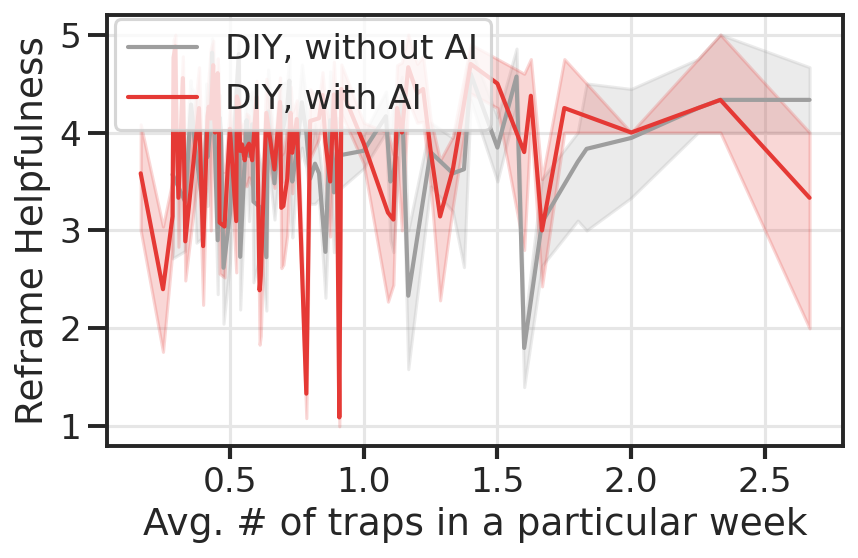

In [210]:
g = sb.lineplot(data=output_df.loc[(output_df['week_no'] <= 4) & (output_df['num_records_week'] >= 3)], x='avg_traps_week', y='reframe_helpfulness', hue='condition_map', palette=['#9e9e9e', '#e53935'])

axs = g.axes
axs.grid()
axs.set_xlabel('Avg. # of traps in a particular week')
axs.set_ylabel('Reframe Helpfulness')

# legend outide on the right
plt.legend(bbox_to_anchor=(0.01, 0.99), loc=2, borderaxespad=0.)

# remove legend
# plt.legend([],[], frameon=False)

In [212]:
output_df.groupby(['theme', 'condition_map']).agg({'reframe_relatability': ['mean', 'std'], 'reframe_helpfulness': ['mean', 'std'], 'reframe_memorability': ['mean', 'std'], 'skill_learnability': ['mean', 'std'], 'reduction_in_emotion_intensity': ['mean', 'std'], 'reduction_in_belief': ['mean', 'std']}).round(4)

# output_df.groupby([['theme', 'condition_map']])[['reframe_relatability']].mean()

reframe_relatability          \
                                                        mean     std   
theme                   condition_map                                  
body image              DIY, without AI               4.0270  1.0134   
                        DIY, with AI                  3.8987  1.1277   
dating & marriage       DIY, without AI               4.0787  1.0138   
                        DIY, with AI                  4.1294  0.9101   
family                  DIY, without AI               4.3431  0.8731   
                        DIY, with AI                  4.0661  1.0546   
fear                    DIY, without AI               4.2617  0.9043   
                        DIY, with AI                  4.2500  0.7958   
friendship              DIY, without AI               4.2318  0.9691   
                        DIY, with AI                  4.2000  0.9412   
habits                  DIY, without AI               4.1500  1.1821   
                        DIY, with AI                  4.5217  0.7305   
health                  DIY, without AI               4.2477  0.9245   
                        DIY, with AI                  4.2781  0.8259   
hopelessness/depression DIY, without AI               4.0383  1.1485   
                        DIY, with AI                  3.8722  1.1136   
identity                DIY, without AI               4.0556  1.1198   
                        DIY, with AI                  4.0000  1.0640   
loneliness              DIY, without AI               4.0351  1.0516   
                        DIY, with AI                  4.1899  0.8332   
money                   DIY, without AI               4.2576  0.6864   
                        DIY, with AI                  3.9018  1.0131   
parenting               DIY, without AI               4.2778  0.8107   
                        DIY, with AI                  4.3571  0.8827   
school                  DIY, without AI               4.6111  0.5016   
                        DIY, with AI                  4.0000  1.0000   
tasks & achievement     DIY, without AI               4.2220  0.9664   
                        DIY, with AI                  4.0366  1.0749   
trauma                  DIY, without AI               4.0000  1.2792   
                        DIY, with AI                  4.2857  0.4880   

                                        reframe_helpfulness          \
                                                       mean     std   
theme                   condition_map                                 
body image              DIY, without AI              3.9189  1.0376   
                        DIY, with AI                 3.8734  1.1477   
dating & marriage       DIY, without AI              3.4382  1.3564   
                        DIY, with AI                 3.8000  1.0889   
family                  DIY, without AI              3.5588  1.2233   
                        DIY, with AI                 3.9669  1.1470   
fear                    DIY, without AI              3.6262  1.2326   
                        DIY, with AI                 3.8750  1.1511   
friendship              DIY, without AI              3.7351  1.2258   
                        DIY, with AI                 4.0400  0.9615   
habits                  DIY, without AI              3.8500  1.1821   
                        DIY, with AI                 4.1304  0.9679   
health                  DIY, without AI              3.7523  1.0900   
                        DIY, with AI                 3.9205  1.1107   
hopelessness/depression DIY, without AI              3.5915  1.3152   
                        DIY, with AI                 3.4217  1.3257   
identity                DIY, without AI              3.5000  1.2071   
                        DIY, with AI                 3.7037  1.2382   
loneliness              DIY, without AI              3.3333  1.3671   
                        DIY, with AI                 3.9241  0.9577   
money                   DIY, w

In [213]:
output_df.groupby(['theme', 'condition_map']).agg({'reframe_helpfulness': ['mean', 'std'],}).round(4)


reframe_helpfulness        
                                                       mean     std
theme                   condition_map                              
body image              DIY, without AI              3.9189  1.0376
                        DIY, with AI                 3.8734  1.1477
dating & marriage       DIY, without AI              3.4382  1.3564
                        DIY, with AI                 3.8000  1.0889
family                  DIY, without AI              3.5588  1.2233
                        DIY, with AI                 3.9669  1.1470
fear                    DIY, without AI              3.6262  1.2326
                        DIY, with AI                 3.8750  1.1511
friendship              DIY, without AI              3.7351  1.2258
                        DIY, with AI                 4.0400  0.9615
habits                  DIY, without AI              3.8500  1.1821
                        DIY, with AI                 4.1304  0.9679
health                  DIY, without AI              3.7523  1.0900
                        DIY, with AI                 3.9205  1.1107
hopelessness/depression DIY, without AI              3.5915  1.3152
                        DIY, with AI                 3.4217  1.3257
identity                DIY, without AI              3.5000  1.2071
                        DIY, with AI                 3.7037  1.2382
loneliness              DIY, without AI              3.3333  1.3671
                        DIY, with AI                 3.9241  0.9577
money                   DIY, without AI              3.8485  0.9646
                        DIY, with AI                 3.7411  1.1130
parenting               DIY, without AI              3.7778  1.1438
                        DIY, with AI                 4.1071  1.1390
school                  DIY, without AI              3.7222  1.1785
                        DIY, with AI                 4.0000  1.0000
tasks & achievement     DIY, without AI              3.7925  1.1328
                        DIY, with AI                 3.8003  1.1662
trauma                  DIY, without AI              3.6667  1.3027
                        DIY, with AI                 4.1429  1.0690

In [216]:
output_df.groupby(['condition_map']).agg({'reframe_helpfulness': ['mean', 'std'],}).round(4)


reframe_helpfulness        
                               mean     std
condition_map                              
DIY, without AI              3.6968  1.1937
DIY, with AI                 3.8014  1.1643

In [217]:
output_df['theme'].value_counts(normalize=True)

tasks & achievement        0.303616
hopelessness/depression    0.153631
friendship                 0.084385
health                     0.072890
fear                       0.068124
family                     0.062518
money                      0.049902
dating & marriage          0.048780
loneliness                 0.038127
body image                 0.032520
parenting                  0.030838
identity                   0.025231
habits                     0.012055
school                     0.012055
trauma                     0.005327
Name: theme, dtype: float64

In [219]:
output_df.columns

Index(['start_time', 'end_time', 'thought_record_id', 'email', 'condition_x',
       'reframe_relatability', 'reframe_helpfulness', 'reframe_memorability',
       'skill_learnability', 'belief_1', 'emotion_strength_1', 'belief_2',
       'emotion_strength_2', 'all_belief', 'all_emotion_strength',
       'emotion_strength', 'belief', 'reduction_in_belief',
       'reduction_in_emotion_intensity', 'condition_map_x', 'study_id',
       'condition_y', 'date_consent', 'consent_yn', 'consent_complete', 'age',
       'phq_total', 'phq9_complete', 'gad7_total', 'gad7_complete', 'hope_q',
       'hope_complete', 'cr_use_q', 'therapy_post_diy', 'talk', 'seekmh',
       'miscq_complete', 'phq_week_1', 'gad7_week_1', 'phq_week_2',
       'gad7_week_2', 'phq_week_3', 'gad7_week_3', 'phq_week_4', 'gad7_week_4',
       'phq_total_range', 'gad7_total_range', 'condition_map_y', 'gender',
       'race', 'age_range', 'tool_went_well', 'tool_didnt_well',
       'tool_other_comments', 'condition_map', 'phq

In [220]:
output_df = pd.merge(output_df, thought_records_with_outcomes_df[['thought_record_id', 'default_thought']], on='thought_record_id', how='left')

In [221]:
output_df[['theme', 'default_thought']].value_counts(normalize=True)

theme                    default_thought
tasks & achievement      False              0.183908
                         True               0.119708
hopelessness/depression  False              0.080740
                         True               0.072890
fear                     False              0.062798
friendship               False              0.062518
health                   False              0.054107
family                   False              0.039529
dating & marriage        False              0.038408
money                    False              0.035324
body image               False              0.029997
loneliness               True               0.025231
parenting                False              0.024390
family                   True               0.022989
friendship               True               0.021867
health                   True               0.018783
identity                 False              0.015139
money                    True               0.014578
lonel

In [223]:
output_df.groupby(['default_thought', 'condition_map']).agg({'reframe_helpfulness': ['mean', 'std'],}).round(4)


reframe_helpfulness        
                                               mean     std
default_thought condition_map                              
False           DIY, without AI              3.7248  1.1803
                DIY, with AI                 3.8165  1.1749
True            DIY, without AI              3.6449  1.2176
                DIY, with AI                 3.7696  1.1418

In [244]:
THEMES = set(output_df['theme'].values.tolist())

li = []

for theme in THEMES:
	if pd.isna(theme):
		continue
	
	print(theme, cohen_d(output_df.loc[(output_df['theme'] == theme) & (output_df['condition_map'] == 'DIY, with AI')]['reframe_helpfulness'], output_df.loc[(output_df['theme'] == theme) & (output_df['condition_map'] == 'DIY, without AI')]['reframe_helpfulness']), ttest_ind(output_df.loc[(output_df['theme'] == theme) & (output_df['condition_map'] == 'DIY, with AI')]['reframe_helpfulness'], output_df.loc[(output_df['theme'] == theme) & (output_df['condition_map'] == 'DIY, without AI')]['reframe_helpfulness'])[1])

	li.append((theme, cohen_d(output_df.loc[(output_df['theme'] == theme) & (output_df['condition_map'] == 'DIY, with AI')]['reframe_helpfulness'], output_df.loc[(output_df['theme'] == theme) & (output_df['condition_map'] == 'DIY, without AI')]['reframe_helpfulness']), ttest_ind(output_df.loc[(output_df['theme'] == theme) & (output_df['condition_map'] == 'DIY, with AI')]['reframe_helpfulness'], output_df.loc[(output_df['theme'] == theme) & (output_df['condition_map'] == 'DIY, without AI')]['reframe_helpfulness'])[1], len(output_df.loc[(output_df['theme'] == theme)])))

tasks & achievement 0.006775358490387837 0.9117876146343509
identity 0.16616028115831438 0.44203943987410854
habits 0.2614826722839081 0.3973890554356202
loneliness 0.5151285462745446 0.003593687628870723
hopelessness/depression -0.12849005787150714 0.137163444835047
parenting 0.28857392038444796 0.1331893203881865
trauma 0.38862650640212776 0.4251539407944912
family 0.34513808597148254 0.010899191411003711
body image -0.04084237086809794 0.8379220714716901
health 0.1526542054783024 0.22563924741865204
dating & marriage 0.29341738676072265 0.05466672792584703
friendship 0.27665758540640706 0.017010970986019787
money -0.10127650212074495 0.5148341457337987
fear 0.20951971588995227 0.10624508191887513
school 0.25777171986426045 0.4091767134595966


In [245]:
li_df = pd.DataFrame(li, columns=['theme', 'cohen d', 'p_value', 'N'])
li_df.dropna()
li_df

theme   cohen d   p_value     N
0       tasks & achievement  0.006775  0.911788  1083
1                  identity  0.166160  0.442039    90
2                    habits  0.261483  0.397389    43
3                loneliness  0.515129  0.003594   136
4   hopelessness/depression -0.128490  0.137163   548
5                 parenting  0.288574  0.133189   110
6                    trauma  0.388627  0.425154    19
7                    family  0.345138  0.010899   223
8                body image -0.040842  0.837922   116
9                    health  0.152654  0.225639   260
10        dating & marriage  0.293417  0.054667   174
11               friendship  0.276658  0.017011   301
12                    money -0.101277  0.514834   178
13                     fear  0.209520  0.106245   243
14                   school  0.257772  0.409177    43

In [ ]:
output_df

In [238]:
output_df['thinking_trap_selected_li'] = output_df['thinking_trap_selected'].apply(lambda x: [] if pd.isna(x) else x.split(';'))

In [239]:
output_df_traps = output_df.explode('thinking_trap_selected_li')

In [246]:
TRAPS = set(output_df_traps['thinking_trap_selected_li'].values.tolist())

li = []

for trap in TRAPS:
	if pd.isna(trap):
		continue
	
	print(trap, cohen_d(output_df_traps.loc[(output_df_traps['thinking_trap_selected_li'] == trap) & (output_df_traps['condition_map'] == 'DIY, with AI')]['reframe_helpfulness'], output_df_traps.loc[(output_df_traps['thinking_trap_selected_li'] == trap) & (output_df_traps['condition_map'] == 'DIY, without AI')]['reframe_helpfulness']), ttest_ind(output_df_traps.loc[(output_df_traps['thinking_trap_selected_li'] == trap) & (output_df_traps['condition_map'] == 'DIY, with AI')]['reframe_helpfulness'], output_df_traps.loc[(output_df_traps['thinking_trap_selected_li'] == trap) & (output_df_traps['condition_map'] == 'DIY, without AI')]['reframe_helpfulness'])[1], )

	li.append((trap, cohen_d(output_df_traps.loc[(output_df_traps['thinking_trap_selected_li'] == trap) & (output_df_traps['condition_map'] == 'DIY, with AI')]['reframe_helpfulness'], output_df_traps.loc[(output_df_traps['thinking_trap_selected_li'] == trap) & (output_df_traps['condition_map'] == 'DIY, without AI')]['reframe_helpfulness']), ttest_ind(output_df_traps.loc[(output_df_traps['thinking_trap_selected_li'] == trap) & (output_df_traps['condition_map'] == 'DIY, with AI')]['reframe_helpfulness'], output_df_traps.loc[(output_df_traps['thinking_trap_selected_li'] == trap) & (output_df_traps['condition_map'] == 'DIY, without AI')]['reframe_helpfulness'])[1], len(output_df_traps.loc[(output_df_traps['thinking_trap_selected_li'] == trap)])))

Blaming 0.18007929662090144 0.20476379547581794
Overgeneralizing 0.001873401351621708 0.98531040499788
Disqualifying the Positive 0.05888690069357206 0.667677883183587
Should Statements 0.099721062106129 0.33422178187371354
Comparing and Despairing -0.043329294407482004 0.6765597204794469
Overwhelm nan nan
Procrastination nan nan
Personalizing 0.31563759770221517 0.0031521615312777827
Labeling 0.3710278375718916 0.00020659313861289517
Catastrophizing 0.13891570587114135 0.04535766927146975
None of These Thinking Traps Seem Right to Me -0.46694511375630576 0.02011793316014596
Negative Feeling or Emotion 0.1503820629203744 0.0014870878659407187
Fortune Telling -0.1270112723270695 0.16617237757825618
Emotional Reasoning -0.018366994858880877 0.8886274262428714
All-or-Nothing Thinking 0.06840352057829595 0.3910742611216321
Mind Reading 0.3790166603881276 0.00026783755535809707


In [247]:
li_df = pd.DataFrame(li, columns=['thinking_trap', 'cohen d', 'p_value', 'N'])
li_df.dropna()
li_df

thinking_trap   cohen d   p_value     N
0                                         Blaming  0.180079  0.204764   227
1                                Overgeneralizing  0.001873  0.985310   427
2                      Disqualifying the Positive  0.058887  0.667678   250
3                               Should Statements  0.099721  0.334222   400
4                        Comparing and Despairing -0.043329  0.676560   403
5                                       Overwhelm       NaN       NaN     1
6                                 Procrastination       NaN       NaN     1
7                                   Personalizing  0.315638  0.003152   368
8                                        Labeling  0.371028  0.000207   515
9                                 Catastrophizing  0.138916  0.045358   883
10  None of These Thinking Traps Seem Right to Me -0.466945  0.020118   153
11                    Negative Feeling or Emotion  0.150382  0.001487  1962
12                                Fortune Telling -0.127011  0.166172   477
13                            Emotional Reasoning -0.018367  0.888627   283
14                        All-or-Nothing Thinking  0.068404  0.391074   681
15                                   Mind Reading  0.379017  0.000268   377